In [1]:
from clawpack import pyclaw
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
from __future__ import absolute_import
from clawpack import riemann
#from clawpack.riemann.shallow_roe_with_efix_1D_constants import depth, momentum, num_eqn

In [2]:
claw = pyclaw.Controller()
claw.tfinal = 10.0
claw.keep_copy = True
claw.output_format = None
claw.num_output_times = 50

#riemann_solver = riemann.shallow_1D_py
#claw.solver = pyclaw.ClawSolver1D(riemann_solver)
#claw.solver.all_bcs = pyclaw.BC.periodic
#domain = pyclaw.Domain( (0.,), (5.,), (100,) )

In [3]:
def sigmoid(x):
    p = np.multiply(-1,x)
    vals = 1/(1+np.power(np.e,p))
    return vals
sigmoid([0,1,2])

array([ 0.5       ,  0.73105858,  0.88079708])

In [4]:
 def custom_bc(state,dim,t,qbc,num_ghost):
    #print(qbc[0,])
    cm =1.0
    g = state.problem_data['grav']
    delX = (np.abs(xupper)+np.abs(xlower))/mx

    #print(qbc[0,0])
    #print(qbc[0,13])
    hav = qbc[0,0]
    print(qbc)
    qbc[0,0] = 3
    qbc[0,1] = 3
    qbc[0,-1] = qbc[0,-3]
    qbc[0,-2] = qbc[0,-3]
    #qbc[0,0] = cm*np.sqrt(2*g*(hav))*delX
    #qbc[1,0] = cm*np.sqrt(2*g*(hav))*delX
    #for ii in range(1,num_ghost+2 ):
        #hav = (qbc[0,ii] + qbc[0,ii-1])/2
        #print(hav)
        #hav = (qbc[0,ii] + qbc[0,ii-1])/2
        #qbc[0,ii] = cm*np.sqrt(2*g*(hav))*delX
        #print(qbc[0,ii])
        #qbc[1,ii] = cm*np.sqrt(2*g*(hav))*delX
    qbc[1,0] = qbc[1,2]
    qbc[1,1] = qbc[1,2]
    qbc[1,-1] = qbc[1,-3]
    qbc[1,-2] = qbc[1,-3]
    #for i in xrange(num_ghost):
    #num_ghost = 0
    #print(qbc[0,:])
    #qbc[0,0] = qbc[0,0]
    #print(num_ghost)
    #print(qbc)
    #return
    #for i in range(len(qbc)):
    #    print(qbc[:,i])
        
    #print(qbc, " ok!")
    #for i in range(num_ghost):
        #print(qbc[:,0])
    #qbc[0,0] = 3
    #qbc[0,1] = 2.99
    #qbc[1,0] = 2
    #qbc[1,1]= 2
    
    #qbc[:,0,...] = (qbc[:,0,...]/qbc[:,0,...])*2
    #qbc[:,1,...] = (qbc[:,1,...]/qbc[:,1,...])*1

    #qbc[0,:] = qbc[0,:] + state.
    #qbc[1,0] =  qbc[1,0]
    #qbc[1,:] = qbc[1,:]
#solver.bc_lower[0] = pyclaw.BC.custom
#solver.user_bc_lower = custom_bc

In [5]:
#rs = riemann.shallow_roe_with_efix_1D
rs = riemann.shallow_1D_py.shallow_fwave_1d

num_eqn = 2
solver = pyclaw.ClawSolver1D(rs)
solver.limiters = pyclaw.limiters.tvd.vanleer
#solver.kernel_language = 'Fortran'
solver.kernel_language = 'Python'
solver.num_ghost = 2
#solver.all_bcs = pyclaw.BC.periodic
solver.bc_lower[0] = pyclaw.BC.custom
solver.bc_upper[0] = pyclaw.BC.extrap

#solver.bc_upper[0] = pyclaw.BC.custom
solver.user_bc_lower = custom_bc

solver.aux_bc_lower[0] = pyclaw.BC.extrap
solver.aux_bc_upper[0] = pyclaw.BC.extrap
solver.num_waves=2
solver.num_eqn=2
solver.limiters = pyclaw.limiters.tvd.minmod
#solver.all_bcs = pyclaw.BC.periodic

xlower = -5.0
xupper = 5.0
mx = 300
x = pyclaw.Dimension(xlower,xupper,mx,name='x')
domain = pyclaw.Domain(x)
state = pyclaw.State(domain,num_eqn,1)

# Gravitational constant
state.problem_data['grav'] = 1.0
state.problem_data['sea_level'] = 0.0
state.problem_data['dry_tolerance'] = 0.1

xc = state.grid.x.centers
x0=0.0
obj_size = 0.5

hl = 2.5
hc = 2.0
hr = 1.0

ul = 1.0
ur = -0.2
#state.q[0,:] = hl * (xc <= x0) + hr * (xc > x0) #+ hc*(x0-obj_size < xc)*(xc < x0+obj_size )
#state.q[0,:] = 3
state.q[0,:] = 2 + (1 * (xc<x0)+ (1 - xc/1) * (xc>= x0) * (xc < 1) )
state.q[1,:] = 2   #ul * (xc <= x0) + ur * (xc > x0)
#state.aux[0, :] = 1.0 * np.exp(-xc**2 / 0.2**2) - 1.0

#state.aux[0,:] = sigmoid(np.multiply(-1,xc))
#state.aux[0, :] = 1 * (xc<x0)+ (1 - xc/1) * (xc>= x0) * (xc < 1)
state.aux[0,:] = 0

#state.q[0,:] = hl * (xc <= x0 - obj_size) + hr * (xc > x0+obj_size) + hc*(x0-obj_size < xc)*(xc < x0+obj_size )
#state.q[1,:] = hl*ul * (xc <= x0) + hr*ur * (xc > x0)




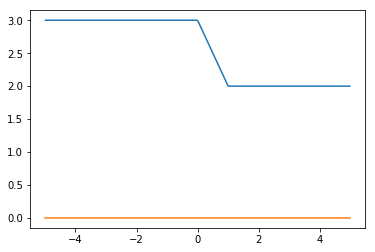

In [6]:
plt.plot(xc,state.q[0,:])
plt.plot(xc,state.aux[0,:])

In [7]:
claw.solution = pyclaw.Solution(state,domain)
claw.solver = solver
claw.run()

2019-01-29 11:59:20,616 WARNING CLAW: The custom boundary condition
                                        function signature has been changed.
                                        The previous signature will not be
                                        supported in Clawpack 6.0.  Please see 
                                        http://www.clawpack.org/pyclaw/solvers.html#change-to-custom-bc-function-signatures
                                        for more information.
[[ 0.          0.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.     

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999999  2

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999997  2.99999993  2.99999985  2

   2.          2.          2.          2.          2.          2.          2.        ]]
[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3. 

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          2.99999999  2.99999999
   2.99999997  2.99999992  2.99999983  2.99999965  2.99999927  2.999

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999998  2.99999995
   2.9999999   2.99999977  2.99999953  2.99999905  2.99999812  2.999

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999998  2.99999995  2.99999989  2.99999977
   2.99999952  2.99999904  2.99999813  2.99999646  2.99999343  2.999

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.
   2.99999999  2.99999998  2.99999995  2.99999988  2.99999976  2.99999952
   2.99999905  2.99999816  2.99999655  2.99999368  2.99998867  2.99998017
   2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999999  2.99999997
   2.99999994  2.99999988  2.99999976  2.99999951  2.99999905  2.9999982
   2.99999666  2.99999394  2.99998923  2.9999813   2.99996821  2.99994711

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999997  2.99999994
   2.99999988  2.99999976  2.99999951  2.99999906  2.99999822  2.99999672
   2.99999407  2.99998951  2.99998185  2.99996926  2.99994901  2.9999171

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999999  2.99999997  2.99999994  2.99999988
   2.99999975  2.99999952  2.99999907  2.99999825  2.99999678  2.9999942
   2.99998979  2.9999824   2.99997029  2.99995086  2.99992034  2.99987339

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999997  2.99999995  2.99999989  2.99999977
   2.99999956  2.99999915  2.9999984   2.99999707  2.99999473  2.99999074
   2.99998405  2.99997308  2.99995549  2.99992783  2.99988524  2.9998209

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999999  2.99999997  2.99999994  2.99999989  2.99999977  2.99999956
   2.99999917  2.99999845  2.99999719  2.99999499  2.99999125  2.99998503
   2.99997489  2.99995871  2.99993339  2.99989454  2.9998361   2.99974987
  

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999999  2.99999997
   2.99999994  2.99999989  2.99999978  2.99999957  2.99999919  2.99999851
   2.99999731  2.99999524  2.99999175  2.99998598  2.99997663  2.99996177
   2.9999386   2.99990318  2.99985005  2.99977182  2.99965877  2.99949833
  

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999997  2.99999994
   2.99999989  2.99999978  2.99999957  2.9999992   2.99999854  2.99999737
   2.99999537  2.999992    2.99998645  2.99997747  2.99996323  2.99994107
   2.99990726  2.9998566   2.9997821   2.99967451  2.9995219   2.99930926
  

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999999  2.99999997  2.99999994  2.99999989
   2.99999978  2.99999958  2.99999921  2.99999856  2.99999743  2.99999549
   2.99999224  2.99998689  2.99997827  2.99996463  2.99994344  2.99991115
   2.99986284  2.99979186  2.99968944  2.99954424  2.99934198  2.99906504
  

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.
   2.99999999  2.99999998  2.99999996  2.99999992  2.99999984  2.9999997
   2.99999944  2.99999898  2.99999818  2.99999681  2.9999945   2.99999069
   2.99998453  2.99997474  2.99995947  2.99993608  2.99990088  2.99984883
   2.99977321  2.99966523  2.99951363  2.99930435  2.99902017  2.99864052
   2.9981414   

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          2.99999999  2.99999998
   2.99999996  2.99999992  2.99999986  2.99999973  2.9999995   2.99999909
   2.99999838  2.99999717  2.99999513  2.99999179  2.9999864   2.99997785
   2.99996453  2.99994414  2.99991347  2.99986813  2.99980223  2.99970805
   2.99957565  2.99939258  2.99914348  2.99880992  2.99837018  2.99779934
   2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999998  2.99999996  2.99999993
   2.99999986  2.99999974  2.99999952  2.99999913  2.99999846  2.99999733
   2.99999544  2.99999235  2.99998738  2.99997953  2.99996734  2.99994875
   2.99992085  2.99987968  2.99981994  2.99973465  2.99961484  2.99944921
   2.99922382  2.99892184  2.99852341  2.99800557  2.99734241  2.99650534
   2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999998  2.99999996  2.99999993  2.99999986  2.99999974
   2.99999954  2.99999917  2.99999854  2.99999748  2.99999573  2.99999287
   2.99998829  2.99998109  2.99996995  2.999953    2.99992762  2.99989024
   2.99983607  2.99975882  2.99965037  2.99950047  2.99929647  2.99902301
   2.99866191  2.99819205  2.99758946  2.99682752  2.99587737  2.99470843
   2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.
   2.99999999  2.99999998  2.99999996  2.99999993  2.99999986  2.99999975
   2.99999955  2.99999919  2.99999858  2.99999756  2.99999587  2.99999312
   2.99998873  2.99998183  2.99997118  2.99995499  2.99993078  2.99989515
   2.99984356  2.99977002  2.99966681  2.99952418  2.99933005  2.99906977
   2.99872593  2.99827829  2.99770378  2.99697675  2.99606926  2.99495159
   2.99359292  2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          2.99999999  2.99999998
   2.99999996  2.99999993  2.99999987  2.99999976  2.99999957  2.99999923
   2.99999866  2.99999771  2.99999614  2.9999936   2.99998957  2.99998325
   2.99997351  2.99995876  2.99993674  2.9999044   2.99985762  2.999791
   2.99969757  2.99956847  2.99939273  2.999157    2.99884533  2.99843912
   2.99791706  2.99725531  2.99642774  2.99540636  2.99416186  2.99266432
   2.9908839

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999997  2.99999995
   2.99999991  2.99999984  2.9999997   2.99999947  2.99999907  2.99999841
   2.9999973   2.9999955   2.99999262  2.99998807  2.99998101  2.99997022
   2.999954    2.99992999  2.99989497  2.99984468  2.99977354  2.99967439
   2.99953822  2.9993539   2.99910799  2.99878453  2.99836495  2.99782814
   2.99715053  2.99630643  2.99526842  2.9940079   2.99249573  2.99070302
   2.98860

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999995  2.99999991  2.99999984
   2.99999972  2.9999995   2.99999913  2.9999985   2.99999748  2.99999582
   2.99999316  2.99998899  2.99998253  2.99997269  2.99995793  2.99993611
   2.99990433  2.99985875  2.99979432  2.99970454  2.99958125  2.99941432
   2.99919148  2.99889809  2.9985171   2.99802895  2.99741174  2.99664144
   2.99569219  2.99453684  2.9931475   2.9914962   2.9895556   2.98729973
   2.98470

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999995  2.99999991  2.99999985
   2.99999972  2.99999951  2.99999915  2.99999855  2.99999756  2.99999597
   2.99999342  2.99998942  2.99998325  2.99997385  2.99995977  2.99993897
   2.9999087   2.9998653   2.99980397  2.99971853  2.99960121  2.99944233
   2.99923018  2.99895075  2.99858767  2.99812215  2.99753309  2.99679722
   2.99588949  2.99478345  2.99345182  2.99186713  2.99000239  2.98783178
   2.98533135  2.98247

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999998  2.99999997  2.99999994  2.99999989  2.9999998   2.99999964
   2.99999938  2.99999894  2.9999982   2.99999701  2.99999511  2.9999921
   2.99998743  2.99998028  2.9999695   2.99995348  2.99993004  2.9998962
   2.99984808  2.99978059  2.99968726  2.99956     2.99938885  2.99916177
   2.99886451  2.99848053  2.99799097  2.99737473  2.99660877  2.99566836
   2.99452755  2.99315976  2.99153831  2.98963716  2.98743154  2.98489856
   2.98201786  2

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          2.99999999  2.99999998
   2.99999997  2.99999994  2.99999989  2.9999998   2.99999965  2.99999939
   2.99999897  2.99999826  2.99999711  2.99999527  2.99999238  2.99998789
   2.99998104  2.99997071  2.99995539  2.99993298  2.99990066  2.99985471
   2.9997903   2.99970125  2.99957982  2.9994165   2.99919975  2.99891593
   2.99854912  2.99808115  2.99749168  2.99675837  2.99585721  2.99476292
   2.99344947  2.99189067  2.99006078  2.98793519  2.98549104  2.98270776
   2.97956763 

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999998  2.99999997
   2.99999994  2.99999989  2.99999981  2.99999966  2.99999941  2.99999899
   2.99999831  2.9999972   2.99999543  2.99999265  2.99998834  2.99998177
   2.99997188  2.99995723  2.9999358   2.99990493  2.99986106  2.99979958
   2.9997146   2.99959873  2.99944287  2.99923598  2.99896496  2.99861453
   2.99816719  2.9976033   2.99690124  2.99603769  2.99498804  2.99372682
   2.9922283   2.99046709  2.98841878  2.98606052  2.98337162  2.98033406
   2.97693283 

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999999  2.99999998  2.99999996  2.99999993
   2.99999987  2.99999977  2.9999996   2.99999931  2.99999883  2.99999805
   2.99999679  2.99999481  2.99999172  2.99998696  2.99997975  2.99996899
   2.99995314  2.99993011  2.99989713  2.99985054  2.99978561  2.99969632
   2.9995752   2.99941303  2.99919874  2.99891922  2.99855924  2.99810145
   2.99752641  2.99681283  2.9959378   2.99487722  2.99360621  2.99209971
   2.99033302  2.98828246  2.9859259   2.98324334  2.98021737  2.97683353
   2.97308062 

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999998  2.99999997  2.99999995  2.9999999   2.99999983
   2.9999997   2.99999949  2.99999913  2.99999855  2.99999761  2.99999612
   2.99999378  2.99999017  2.99998466  2.99997639  2.99996414  2.99994625
   2.99992047  2.99988383  2.99983243  2.99976132  2.99966419  2.99953329
   2.99935913  2.99913036  2.99883367  2.99845366  2.9979729   2.99737199
   2.99662979  2.99572371  2.99463004  2.99332452  2.99178276  2.98998091
   2.98789618  2.98550739  2.98279552  2.97974411  2.97633962  2.97257165
   2.96843312 

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999998  2.99999997  2.99999995  2.99999991  2.99999984  2.99999972
   2.99999952  2.99999918  2.99999864  2.99999777  2.99999638  2.99999422
   2.99999089  2.99998583  2.99997824  2.99996703  2.99995067  2.99992714
   2.99989371  2.99984687  2.99978207  2.99969358  2.9995743   2.99941555
   2.99920689  2.99893603  2.99858872  2.99814876  2.99759803  2.99691665
   2.99608328  2.99507537  2.99386965  2.99244257  2.99077087  2.98883207
   2.98660505  2.98407055  2.98121157  2.97801379  2.97446579  2.97055927
   2.96628907  2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999998  2.99999997
   2.99999995  2.99999991  2.99999984  2.99999973  2.99999954  2.99999923
   2.99999872  2.99999791  2.99999663  2.99999463  2.99999156  2.99998691
   2.99997996  2.99996969  2.99995474  2.99993324  2.99990275  2.99986004
   2.99980098  2.99972035  2.99961164  2.99946689  2.99927653  2.99902921
   2.99871175  2.99830909  2.99780431  2.99717877  2.99641231  2.99548352
   2.99437013  2.99304947  2.99149889  2.98969634  2.98762085  2.98525301
   2.98257544  2.97957317  2.9762339   2.97254823  2.96850976  2.96411512
   2.95936389  2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999997  2.99999995
   2.99999991  2.99999985  2.99999974  2.99999955  2.99999925  2.99999876
   2.99999798  2.99999675  2.99999483  2.99999188  2.99998742  2.99998076
   2.99997094  2.99995664  2.9999361   2.99990697  2.99986619  2.9998098
   2.99973283  2.99962903  2.99949081  2.99930897  2.99907263  2.9987691
   2.99838388  2.99790061  2.99730124  2.9965662   2.99567464  2.9946048
   2.99333442  2.99184121  2.99010334  2.98809995  2.98581161  2.98322078
   2.98031222  2.97707323  2.97349392  2.96956731  2.96528939  2.96065905
   2.95567798  2.9503

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999999  2.99999997  2.99999995  2.99999991
   2.99999985  2.99999974  2.99999957  2.99999927  2.9999988   2.99999805
   2.99999686  2.99999502  2.99999219  2.99998792  2.99998154  2.99997214
   2.99995847  2.99993884  2.99991101  2.99987207  2.99981823  2.99974473
   2.99964563  2.99951363  2.99933993  2.99911407  2.99882385  2.99845529
   2.99799261  2.99741832  2.99671343  2.99585762  2.99482966  2.99360771
   2.99216983  2.99049445  2.98856081  2.9863495   2.98384286  2.98102539
   2.97788404  2.97440845  2.97059109  2.96642734  2.96191542  2.95705632
   2.95185365  2.9

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999997  2.99999995  2.99999992  2.99999985
   2.99999975  2.99999958  2.9999993   2.99999884  2.99999811  2.99999697
   2.9999952   2.99999249  2.99998839  2.99998228  2.99997329  2.99996021
   2.99994145  2.99991487  2.99987768  2.99982628  2.9997561   2.99966148
   2.99953541  2.99936947  2.99915361  2.99887612  2.9985235   2.99808052
   2.99753026  2.99685428  2.99603282  2.99504513  2.99386982  2.99248531
   2.99087027  2.98900411  2.98686743  2.98444249  2.98171356  2.97866726
   2.97529279  2.97158211  2.96753001  2.96313406  2.9583946   2.95331453
   2.94789916  2.9

   2.5533677   2.5532801   2.55322682  2.5532038   2.55319866  2.55319866]]
[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999999  2.99999998  2.99999996  2.99999993  2.99999987  2.99999978
   2.99999963  2.99999939  2.999999    2.99999837  2.99999739  2.99999587
   2.99999353  2.99999001  2.99998475  2.99997701  2.99996574  2.99994956
   2.99992659  2.99989441  2.99984985  2.9997889   2.99970652  2.99959651
   2.99945133  2.99926195  2.99901777  2.99870652  2.99831424  2.99782531
   2.99722256  2.99648744  2.9956003   2.99454068  2.9932877   2.99182051
   2.99011869  2.98816273  2.98593447  2.98341748  2.98059742  2.9774623
   2.97400269  2.9702

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999999  2.99999998
   2.99999997  2.99999995  2.99999991  2.99999984  2.99999973  2.99999955
   2.99999925  2.99999878  2.99999804  2.99999689  2.99999511  2.99999241
   2.99998837  2.99998238  2.99997363  2.99996099  2.99994295  2.99991752
   2.99988212  2.99983341  2.99976719  2.99967821  2.99956004  2.99940493
   2.99920365  2.99894542  2.99861783  2.99820682  2.99769677  2.99707059
   2.99630989  2.99539529  2.99430672  2.99302377  2.99152615  2.98979409
   2.98780879  2.98555282  2.9830105   2.98016823  2.97701471  2.97354116
   2.96974139  2.96561183  2.9611515   2.9563619   2.95124685  2.94581227
   2.94006601  2.93401

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999998  2.99999997
   2.99999995  2.99999991  2.99999984  2.99999974  2.99999956  2.99999928
   2.99999882  2.99999811  2.999997    2.99999529  2.99999271  2.99998883
   2.9999831   2.99997473  2.99996264  2.9999454   2.99992111  2.9998873
   2.99984078  2.99977753  2.99969254  2.99957966  2.99943144  2.99923902
   2.99899203  2.99867851  2.9982849   2.99779606  2.99719542  2.9964651
   2.99558619  2.99453903  2.99330358  2.99185983  2.99018819  2.98826993
   2.98608762  2.98362541  2.98086948  2.97780819  2.97443232  2.97073519
   2.96671268  2.96236324  2.95768773  2.95268935  2.94737342  2.94174719
   2.93581954  2.9296008

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999998  2.99999997  2.99999995
   2.99999991  2.99999985  2.99999974  2.99999958  2.9999993   2.99999886
   2.99999818  2.99999711  2.99999547  2.99999299  2.99998928  2.99998379
   2.99997578  2.99996422  2.99994774  2.99992454  2.99989224  2.99984781
   2.99978741  2.99970623  2.99959839  2.99945674  2.99927278  2.99903654
   2.99873649  2.99835953  2.99789103  2.9973149   2.99661377  2.99576917
   2.9947619   2.99357226  2.99218053  2.99056733  2.98871403  2.98660317
   2.98421881  2.98154689  2.97857548  2.97529495  2.97169815  2.96778044
   2.96353967  2.95897614  2.95409243  2.94889327  2.94338528  2.93757683
   2.93147771  2.92509

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          2.99999999  2.99999998  2.99999997  2.99999995  2.99999991
   2.99999985  2.99999975  2.99999959  2.99999932  2.9999989   2.99999824
   2.99999721  2.99999564  2.99999326  2.99998971  2.99998445  2.99997679
   2.99996573  2.99994999  2.99992782  2.99989696  2.99985453  2.99979684
   2.9997193   2.99961626  2.9994809   2.99930502  2.99907905  2.99879188
   2.99843087  2.99798186  2.99742925  2.99675615  2.99594457  2.9949757
   2.99383025  2.99248877  2.99093208  2.98914169  2.98710014  2.98479141
   2.98220124  2.97931741  2.97612992  2.97263117  2.96881601  2.96468176
   2.96022812  2.95545709  2.9503728   2.9449813   2.93929039  2.93330934
   2.9270487   2.920520

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999999  2.99999998  2.99999996  2.99999994  2.99999989  2.99999982
   2.9999997   2.99999951  2.99999921  2.99999873  2.99999798  2.99999683
   2.99999508  2.99999246  2.99998857  2.99998288  2.99997463  2.99996282
   2.99994612  2.99992275  2.99989044  2.99984625  2.99978652  2.99970667
   2.9996011   2.99946306  2.99928452  2.99905609  2.99876693  2.99840475
   2.99795581  2.99740502  2.99673607  2.99593163  2.99497359  2.99384338
   2.99252233  2.99099202  2.98923465  2.98723344  2.98497294  2.98243939
   2.97962094  2.97650785  2.97309264  2.96937017  2.96533763  2.96099448
   2.95634239  2.95138506  2.94612804  2.94057857  2.93474531  2.92863818
   2.92226809  2.91564675 

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          2.99999999  2.99999999
   2.99999998  2.99999997  2.99999994  2.99999991  2.99999984  2.99999974
   2.99999956  2.99999929  2.99999886  2.99999819  2.99999716  2.99999559
   2.99999324  2.99998975  2.99998462  2.99997718  2.99996652  2.9999514
   2.99993022  2.99990088  2.99986069  2.99980624  2.99973331  2.99963668
   2.99951004  2.99934589  2.99913537  2.99886826  2.99853287  2.99811613
   2.99760355  2.99697943  2.99622698  2.99532855  2.99426596  2.99302077
   2.99157467  2.98990983  2.98800929  2.9858573   2.98343961  2.98074381
   2.97775947  2.97447836  2.9708945   2.96700422  2.96280612  2.95830099
   2.95349168  2.94838296  2.94298131  2.93729471  2.93133246  2.92510493
   2.91862335  2.91189963  

   2.55333277]]
[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999998  2.99999997
   2.99999995  2.99999991  2.99999985  2.99999975  2.99999959  2.99999934
   2.99999894  2.99999832  2.99999737  2.99999593  2.99999376  2.99999056
   2.99998586  2.99997905  2.9999693   2.99995549  2.99993616  2.99990938
   2.99987269  2.999823    2.99975642  2.99966817  2.99955245  2.99940232
   2.9992096   2.9989648   2.99865704  2.99827407  2.99780231  2.99722691
   2.99653195  2.99570059  2.99471536  2.99355844  2.99221197  2.99065846
   2.98888107  2.986864    2.98459279  2.98205461  2.97923847  2.97613542
   2.97273865  2.96904356  2.96504774  2.96075092  2.9561549   2.95126338
   2.94608179  2.94061713  2.93487774  2.92887313  2.92261372  2.9161107
   2.909375

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999996  2.99999994  2.99999989
   2.99999982  2.99999971  2.99999952  2.99999923  2.99999878  2.99999808
   2.99999703  2.99999543  2.99999306  2.99998958  2.9999845   2.99997721
   2.99996682  2.99995221  2.99993187  2.99990387  2.99986572  2.99981432
   2.9997458   2.9996554   2.9995374   2.99938497  2.99919007  2.99894342
   2.99863442  2.99825117  2.99778047  2.99720798  2.9965183   2.99569519
   2.99472181  2.99358099  2.99225557  2.99072868  2.98898412  2.98700665
   2.98478231  2.98229868  2.97954508  2.97651276  2.97319502  2.96958725
   2.96568691  2.96149354  2.95700862  2.95223548  2.94717912  2.94184604
   2.93624407  2.93038213  2.92427011  2.91791861  2.91133882  2.9045423
   2.89754085  2.89034641  

   2.55337728  2.55337728]]
[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999996  2.99999994  2.9999999
   2.99999983  2.99999971  2.99999954  2.99999926  2.99999882  2.99999816
   2.99999714  2.99999561  2.99999334  2.99999     2.99998515  2.99997817
   2.99996824  2.99995427  2.99993484  2.99990808  2.99987164  2.99982252
   2.99975703  2.99967062  2.99955779  2.99941196  2.99922542  2.99898922
   2.99869312  2.9983256   2.99787388  2.99732401  2.996661    2.99586898
   2.99493145  2.99383155  2.99255232  2.99107707  2.98938969  2.98747494
   2.98531878  2.98290861  2.98023354  2.97728451  2.97405444  2.9705383
   2.96673312  2.96263795  2.9582538   2.95358348  2.94863152  2.94340395
   2.93790815  2.93215263  2.92614689  2.91990118  2.91342636  2.90673373
   2.8998348

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999999  2.99999998  2.99999996  2.99999994  2.9999999   2.99999983
   2.99999972  2.99999955  2.99999928  2.99999887  2.99999822  2.99999725
   2.99999578  2.99999361  2.99999041  2.99998577  2.99997909  2.9999696
   2.99995625  2.99993768  2.99991211  2.99987729  2.99983035  2.99976777
   2.99968516  2.99957726  2.99943775  2.99925921  2.99903301  2.99874927
   2.99839684  2.99796334  2.99743522  2.99679787  2.99603581  2.99513287
   2.99407247  2.99283793  2.99141271  2.98978078  2.98792695  2.9858371
   2.9834985   2.98090003  2.97803235  2.97488803  2.97146164  2.96774978
   2.96375103  2.95946593  2.95489682  2.95004772  2.94492423  2.93953326
   2.93388293  2.92798233  2.92184136  2.91547058  2.90888098  2.9020839
   2.89509082  2.8879133   2.8805

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          2.99999999  2.99999999
   2.99999998  2.99999997  2.99999994  2.9999999   2.99999984  2.99999973
   2.99999957  2.99999931  2.99999891  2.99999829  2.99999736  2.99999595
   2.99999387  2.9999908   2.99998636  2.99997997  2.9999709   2.99995814
   2.99994039  2.99991596  2.99988268  2.99983783  2.99977801  2.99969904
   2.99959586  2.9994624   2.99929151  2.99907488  2.99880298  2.99846503
   2.99804903  2.99754181  2.99692916  2.99619595  2.99532637  2.99430414
   2.99311281  2.99173603  2.9901579   2.98836323  2.98633787  2.98406897
   2.98154521  2.97875697  2.9756965   2.972358    2.96873764  2.96483356
   2.96064581  2.95617628  2.95142853  2.94640768  2.94112021  2.93557382
   2.92977721  2.92373995  2.91747225  2.91098483  2.90428876  2.89739532
   2.89031589  2.88306179  2.8

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999999  2.99999998
   2.99999997  2.99999995  2.99999991  2.99999985  2.99999976  2.99999961
   2.99999938  2.99999902  2.99999847  2.99999763  2.99999637  2.99999449
   2.99999174  2.99998773  2.99998196  2.99997375  2.99996219  2.99994609
   2.99992388  2.99989358  2.99985267  2.99979799  2.99972567  2.99963097
   2.99950823  2.99935073  2.99915063  2.99889889  2.99858529  2.99819835
   2.99772544  2.99715286  2.99646595  2.99564931  2.99468699  2.99356276
   2.99226041  2.99076404  2.98905837  2.987129    2.98496276  2.98254785
   2.97987414  2.97693327  2.97371873  2.97022601  2.9664525   2.96239752
   2.95806222  2.95344946  2.94856369  2.94341079  2.93799786  2.93233312
   2.92642567  2.92028534  2.91392252  2.907348    2.90057285  2.89360827
   2.88646547  2.87915559  2.8

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999997  2.99999995  2.99999992
   2.99999987  2.99999978  2.99999965  2.99999945  2.99999913  2.99999864
   2.99999789  2.99999678  2.99999513  2.99999271  2.9999892   2.99998415
   2.99997697  2.99996687  2.99995281  2.99993343  2.99990698  2.99987127
   2.99982353  2.99976033  2.99967751  2.99957004  2.99943195  2.99925625
   2.99903481  2.99875841  2.99841664  2.99799797  2.9974898   2.99687855
   2.99614986  2.9952887   2.99427965  2.99310716  2.99175577  2.99021047
   2.9884569   2.9864817   2.98427267  2.98181907  2.97911173  2.9761432
   2.97290785  2.96940187  2.96562329  2.96157195  2.95724937  2.95265866
   2.9478044   2.94269248  2.93732992  2.93172475  2.92588579  2.91982253
   2.91354497  2.90706346  2.90038859  2.89353105  2.88650155  2.87931072
   2.871969    2.86448663  2.85

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          3.          3.          2.99999999
   2.99999999  2.99999998  2.99999997  2.99999995  2.99999992  2.99999988
   2.9999998   2.99999968  2.99999948  2.99999919  2.99999874  2.99999805
   2.99999703  2.99999551  2.99999329  2.99999008  2.99998546  2.99997889
   2.99996966  2.99995681  2.99993911  2.99991495  2.99988233  2.9998387
   2.99978093  2.99970518  2.99960681  2.99948031  2.99931918  2.99911589
   2.99886182  2.99854722  2.99816125  2.99769202  2.99712666  2.99645145
   2.995652    2.99471345  2.99362069  2.99235863  2.99091247  2.98926796
   2.98741167  2.98533124  2.98301558  2.9804551   2.97764178  2.97456933
   2.97123322  2.9676307   2.96376075  2.95962405  2.95522288  2.95056097
   2.9456434   2.94047642  2.93506733  2.92942429  2.92355618  2.91747244
   2.91118293  2.90469781  2.89802742  2.89118214  2.88417233  2.87700826
   2.86969997  2.86225731  2.854689

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          3.          2.99999999  2.99999999  2.99999998
   2.99999997  2.99999996  2.99999993  2.99999988  2.99999981  2.9999997
   2.99999952  2.99999925  2.99999883  2.9999982   2.99999726  2.99999587
   2.99999383  2.99999088  2.99998666  2.99998065  2.99997221  2.99996047
   2.9999443   2.99992223  2.99989243  2.99985256  2.99979974  2.99973045
   2.9996404   2.99952451  2.99937675  2.99919011  2.99895657  2.998667
   2.99831122  2.99787801  2.99735517  2.99672965  2.99598768  2.99511494
   2.99409681  2.99291859  2.99156572  2.9900241   2.98828031  2.98632187
   2.98413743  2.98171701  2.97905211  2.97613583  2.97296297  2.96953005
   2.96583526  2.96187849  2.95766116  2.95318622  2.94845794  2.94348183
   2.93826445  2.93281329  2.92713661  2.9212433   2.91514271  2.90884457
   2.90235881  2.89569549  2.88886472  2.8818765   2.87474072  2.86746707
   2.86006499  2.8525436   2.84491174

[[ 3.          3.          3.          3.          3.          3.          3.
   3.          3.          2.99999999  2.99999999  2.99999998  2.99999996
   2.99999994  2.9999999   2.99999984  2.99999974  2.99999959  2.99999935
   2.99999899  2.99999845  2.99999764  2.99999644  2.99999468  2.99999213
   2.99998848  2.99998328  2.99997597  2.99996579  2.99995173  2.99993253
   2.99990654  2.99987171  2.99982548  2.9997647   2.99968553  2.99958338
   2.99945282  2.99928748  2.99908001  2.99882204  2.99850415  2.99811591
   2.99764591  2.99708183  2.9964106   2.99561851  2.99469146  2.99361511
   2.99237518  2.99095762  2.98934896  2.98753647  2.98550842  2.98325426
   2.98076484  2.97803246  2.97505105  2.97181615  2.96832499  2.96457642
   2.96057085  2.95631022  2.95179785  2.9470383   2.9420373   2.93680155
   2.93133859  2.92565667  2.91976458  2.91367155  2.90738711  2.900921
   2.89428302  2.88748298  2.88053061  2.87343549  2.866207    2.85885427
   2.85138611  2.84381105  2.8361372

[[ 3.          3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999996  2.99999994  2.99999991
   2.99999985  2.99999976  2.99999961  2.9999994   2.99999907  2.99999857
   2.99999782  2.99999672  2.99999511  2.99999277  2.99998943  2.99998467
   2.99997799  2.99996868  2.99995584  2.99993829  2.99991454  2.99988271
   2.99984043  2.99978483  2.99971235  2.99961878  2.99949906  2.99934729
   2.99915664  2.99891927  2.99862638  2.99826813  2.99783374  2.99731154
   2.99668905  2.99595314  2.99509021  2.99408637  2.99292767  2.99160031
   2.99009094  2.98838682  2.9864761   2.98434801  2.98199301  2.97940296
   2.97657124  2.97349277  2.97016408  2.96658328  2.96275006  2.95866558
   2.95433239  2.94975434  2.94493641  2.93988465  2.93460595  2.92910799
   2.92339902  2.9174878   2.91138343  2.90509528  2.89863284  2.89200564
   2.88522319  2.8782949   2.87123     2.8640375   2.85672618  2.8493045
   2.84178061  2.8341623   2.826456

[[ 3.          3.          3.          3.          3.          3.
   2.99999999  2.99999999  2.99999998  2.99999997  2.99999994  2.99999991
   2.99999985  2.99999976  2.99999963  2.99999942  2.9999991   2.99999862
   2.99999791  2.99999685  2.99999531  2.99999307  2.99998987  2.99998533
   2.99997893  2.99997003  2.99995775  2.99994098  2.99991828  2.99988784
   2.99984742  2.99979423  2.99972489  2.99963532  2.99952068  2.99937528
   2.99919251  2.99896483  2.99868369  2.99833957  2.99792199  2.99741958
   2.99682017  2.99611091  2.99527845  2.99430913  2.99318917  2.99190492
   2.99044308  2.98879096  2.98693665  2.98486928  2.98257916  2.98005794
   2.97729874  2.97429619  2.97104649  2.96754742  2.96379828  2.95979987
   2.95555438  2.95106528  2.94633722  2.94137589  2.93618787  2.93078054
   2.92516191  2.91934047  2.91332512  2.90712502  2.90074951  2.89420798
   2.88750982  2.88066434  2.87368069  2.86656785  2.85933452  2.85198915
   2.84453987  2.83699453  2.82936051  2.82164

[[ 3.          3.          3.          3.          3.          2.99999999
   2.99999999  2.99999998  2.99999997  2.99999995  2.99999991  2.99999986
   2.99999977  2.99999964  2.99999944  2.99999914  2.99999868  2.99999799
   2.99999698  2.9999955   2.99999336  2.9999903   2.99998595  2.99997984
   2.99997132  2.99995959  2.99994355  2.99992185  2.99989274  2.99985409
   2.99980321  2.99973687  2.99965113  2.99954136  2.99940205  2.99922685
   2.99900846  2.99873861  2.99840807  2.99800667  2.99752332  2.99694616
   2.99626262  2.99545961  2.9945237   2.99344128  2.99219885  2.99078321
   2.98918166  2.9873823   2.98537415  2.98314738  2.98069347  2.97800526
   2.97507712  2.97190494  2.96848616  2.96481973  2.96090607  2.95674702
   2.95234569  2.94770637  2.94283442  2.93773611  2.93241853  2.9268894
   2.92115698  2.91522996  2.9091173   2.90282815  2.89637178  2.88975745
   2.88299436  2.87609161  2.86905808  2.86190246  2.85463314  2.84725827
   2.83978563  2.83222276  2.82457571  

[[ 3.          3.          3.          2.99999999  2.99999999  2.99999998
   2.99999996  2.99999994  2.9999999   2.99999984  2.99999974  2.99999959
   2.99999937  2.99999903  2.99999852  2.99999777  2.99999667  2.99999508
   2.99999278  2.99998951  2.99998489  2.99997843  2.99996949  2.99995721
   2.99994052  2.99991803  2.999888    2.99984828  2.99979621  2.99972856
   2.99964145  2.99953029  2.99938968  2.99921337  2.99899421  2.99872414
   2.99839416  2.99799435  2.99751397  2.99694148  2.99626472  2.995471
   2.99454731  2.99348052  2.99225753  2.99086558  2.98929237  2.98752636
   2.98555688  2.98337439  2.98097053  2.97833832  2.97547219  2.97236803
   2.96902322  2.9654366   2.96160843  2.9575403   2.95323506  2.94869672
   2.94393029  2.93894172  2.9337377   2.92832562  2.92271334  2.9169092
   2.91092178  2.90475992  2.89843252  2.89194855  2.8853169   2.87854639
   2.87164565  2.86462312  2.85748701  2.85024522  2.84290541  2.8354749
   2.82796048  2.82036613  2.81269697  2.8

[[ 3.          3.          2.99999999  2.99999999  2.99999997  2.99999995
   2.99999992  2.99999988  2.9999998   2.99999969  2.99999952  2.99999926
   2.99999887  2.99999829  2.99999744  2.99999619  2.9999944   2.99999183
   2.99998819  2.99998307  2.99997596  2.99996615  2.99995275  2.99993462
   2.99991029  2.99987795  2.99983536  2.99977974  2.99970777  2.99961545
   2.99949808  2.99935014  2.99916529  2.9989363   2.99865501  2.9983124
   2.99789853  2.99740269  2.99681341  2.99611864  2.99530585  2.99436225
   2.99327493  2.99203112  2.99061836  2.98902471  2.987239    2.98525096
   2.9830514   2.98063236  2.97798719  2.97511066  2.97199896  2.96864971
   2.96506197  2.96123618  2.95717405  2.95287853  2.94835364  2.94360441
   2.93863675  2.9334573   2.92807331  2.92249257  2.91672324  2.91077377
   2.9046528   2.89836907  2.89193136  2.88534838  2.87862875  2.87178093
   2.86481316  2.85773348  2.85054964  2.8432691   2.83589905  2.82844618
   2.82091447  2.81330884  2.80563525  

[[ 3.          3.          2.99999999  2.99999998  2.99999996  2.99999993
   2.99999989  2.99999983  2.99999972  2.99999957  2.99999934  2.99999899
   2.99999846  2.9999977   2.99999658  2.99999495  2.99999263  2.99998934
   2.9999847   2.99997824  2.99996932  2.99995713  2.99994059  2.99991836
   2.99988878  2.99984973  2.99979865  2.99973244  2.99964735  2.99953895
   2.99940205  2.99923065  2.99901788  2.99875597  2.99843629  2.9980493
   2.99758466  2.99703126  2.99637737  2.99561075  2.99471881  2.9936888
   2.99250802  2.99116401  2.98964475  2.9879389   2.98603593  2.98392634
   2.98160179  2.9790552   2.97628085  2.97327442  2.97003301  2.96655514
   2.96284069  2.95889088  2.95470813  2.950296    2.94565908  2.94080286
   2.93573362  2.9304583   2.92498439  2.9193198   2.91347278  2.90745182
   2.90126552  2.89492255  2.88843156  2.88180112  2.87503967  2.86815546
   2.86115654  2.85405069  2.84684545  2.83954803  2.8321654   2.82470296
   2.81716445  2.80955566  2.80188232  2

[[ 3.          3.          2.99999999  2.99999996  2.99999993  2.99999987
   2.9999998   2.99999968  2.9999995   2.99999923  2.99999883  2.99999823
   2.99999736  2.99999609  2.99999427  2.99999168  2.99998802  2.9999829
   2.99997579  2.99996603  2.99995273  2.99993479  2.99991078  2.99987895
   2.99983711  2.9997826   2.99971221  2.99962209  2.9995077   2.99936374
   2.99918412  2.99896187  2.99868916  2.99835732  2.99795678  2.99747723
   2.99690763  2.99623634  2.99545126  2.99454001  2.99349007  2.99228901
   2.99092466  2.98938536  2.98766011  2.98573874  2.98361213  2.98127229
   2.97871248  2.9759273   2.97291272  2.9696661   2.96618617  2.962473
   2.95852793  2.95435347  2.94995325  2.94533186  2.94049476  2.93544819
   2.93019899  2.92475456  2.91912267  2.91331144  2.90732918  2.90118433
   2.8948854   2.88844084  2.88185905  2.8751483   2.86831666  2.86137199
   2.85432194  2.84717386  2.83993483  2.83261165  2.82520979  2.81773278
   2.81018627  2.80257589  2.79490697  2.

[[ 3.          2.99999999  2.99999995  2.99999986  2.99999975  2.99999958
   2.99999933  2.99999897  2.99999845  2.99999768  2.99999656  2.99999497
   2.99999269  2.99998949  2.999985    2.99997879  2.99997025  2.99995863
   2.99994294  2.99992193  2.99989407  2.99985743  2.99980965  2.99974788
   2.99966869  2.99956804  2.99944118  2.99928261  2.99908605  2.99884438
   2.99854967  2.99819314  2.99776526  2.99725576  2.99665375  2.9959478
   2.99512614  2.99417675  2.99308761  2.99184682  2.99044282  2.9888646
   2.98710184  2.98514508  2.98298589  2.98061697  2.97803222  2.97522685
   2.97219738  2.96894163  2.96545874  2.9617491   2.9578143   2.95365701
   2.94928094  2.9446907   2.9398917   2.93489007  2.92969248  2.92430611
   2.91873851  2.91299749  2.90709106  2.90102736  2.89481453  2.88846072
   2.88197396  2.87536218  2.86863312  2.86179433  2.85485311  2.84781654
   2.84069139  2.83348421  2.82620042  2.81884338  2.81141837  2.8039308
   2.79638581  2.78878825  2.78114269  2.

[[ 3.          2.99999998  2.99999992  2.9999998   2.99999963  2.99999938
   2.99999903  2.99999852  2.99999778  2.99999671  2.99999518  2.99999301
   2.99998994  2.99998565  2.99997971  2.99997154  2.99996042  2.99994542
   2.99992533  2.99989868  2.99986362  2.99981789  2.99975874  2.9996829
   2.99958645  2.99946483  2.99931272  2.99912405  2.99889193  2.99860867
   2.99826574  2.99785386  2.99736301  2.99678253  2.99610125  2.99530757
   2.99438968  2.99333568  2.99213377  2.99077247  2.98924076  2.98752829
   2.98562552  2.9835239   2.98121595  2.97869538  2.97595716  2.97299752
   2.96981403  2.96640553  2.9627721   2.95891501  2.95483664  2.95054042
   2.94603065  2.9413125   2.93639183  2.93127509  2.92596923  2.92048163
   2.91481991  2.90899196  2.90300576  2.89686935  2.89059078  2.88417802
   2.87763892  2.8709812   2.86421234  2.85733966  2.85037018  2.84331071
   2.83616775  2.82894737  2.82165316  2.81428964  2.80686225  2.79937615
   2.79183623  2.78424707  2.77661303  

[[ 3.          2.99999996  2.99999986  2.99999964  2.99999935  2.99999893
   2.99999834  2.9999975   2.99999629  2.99999457  2.99999215  2.99998874
   2.99998401  2.99997749  2.99996857  2.99995647  2.99994022  2.99991855
   2.99988991  2.99985239  2.99980363  2.9997408   2.99966052  2.99955878
   2.99943091  2.99927152  2.99907445  2.99883272  2.9985386   2.99818355
   2.99775826  2.99725277  2.99665648  2.99595833  2.99514688  2.99421049
   2.9931375   2.99191636  2.99053588  2.98898535  2.98725474  2.98533486
   2.98321745  2.98089539  2.97836267  2.97561455  2.97264753  2.96945939
   2.96604917  2.96241711  2.95856458  2.95449407  2.95020902  2.94571377
   2.94101345  2.93611388  2.93102143  2.92574298  2.92028575  2.91465728
   2.90886528  2.9029176   2.89682212  2.89058673  2.88421925  2.87772736
   2.8711186   2.86440035  2.85757972  2.85066364  2.84365874  2.83657141
   2.82940763  2.82217101  2.81486587  2.80749753  2.80007107  2.79259127
   2.78506265  2.77748948  2.76987574 

[[ 3.          2.99999994  2.9999998   2.99999949  2.99999906  2.99999848
   2.99999765  2.99999649  2.99999483  2.9999925   2.99998924  2.99998471
   2.99997847  2.99996994  2.99995837  2.99994282  2.99992209  2.99989469
   2.99985878  2.9998121   2.99975194  2.99967502  2.99957751  2.99945489
   2.99930196  2.99911274  2.99888051  2.99859774  2.99825613  2.99784663
   2.99735951  2.99678441  2.99611047  2.99532647  2.99442092  2.99338229
   2.99219916  2.99086036  2.98935521  2.98767365  2.98580639  2.98374508
   2.98148241  2.9790122   2.97632947  2.97343047  2.97031272  2.96697495
   2.96341713  2.95964034  2.95564676  2.95143957  2.94702282  2.94240139
   2.93758085  2.93256736  2.92736757  2.92198854  2.91643762  2.91072239
   2.90485057  2.89882993  2.89266826  2.8863733   2.87995269  2.87341391
   2.86676429  2.86001094  2.85316076  2.84622039  2.83919622  2.83209437
   2.82491937  2.81767468  2.81036553  2.802997    2.79557391  2.78810081
   2.78058201  2.77302154  2.76542318 

[[ 3.          2.99999995  2.99999974  2.99999931  2.99999875  2.99999798
   2.9999969   2.99999539  2.99999327  2.99999031  2.99998619  2.9999805
   2.99997273  2.99996218  2.99994797  2.99992901  2.99990391  2.99987095
   2.99982803  2.99977262  2.99970166  2.99961153  2.99949798  2.99935608
   2.99918018  2.99896386  2.99869994  2.99838046  2.9979967   2.99753926
   2.99699808  2.99636258  2.99562175  2.99476432  2.99377886  2.992654
   2.99137859  2.98994186  2.9883336   2.98654432  2.98456539  2.98238918
   2.98000914  2.97741987  2.97461719  2.97159816  2.96836106  2.96490536
   2.96123171  2.95734185  2.95323851  2.94892538  2.94440696  2.93968849
   2.93477582  2.92967536  2.92439393  2.91893869  2.91331705  2.90753659
   2.90160499  2.89552997  2.8893192   2.88298029  2.87652072  2.86994782
   2.86326871  2.85649033  2.84961935  2.84266222  2.83562512  2.82851367
   2.82133111  2.81408202  2.80677156  2.7994046   2.79198579  2.78451951
   2.77700987  2.76946074  2.76187575  2.

[[ 3.          2.99999985  2.99999946  2.99999864  2.99999756  2.99999609
   2.99999408  2.99999131  2.99998749  2.99998226  2.99997513  2.99996545
   2.99995244  2.99993508  2.99991209  2.9998819   2.99984257  2.99979176
   2.99972663  2.99964385  2.99953944  2.99940884  2.99924674  2.99904715
   2.99880331  2.99850771  2.9981521   2.99772754  2.99722443  2.99663264
   2.99594156  2.99514027  2.99421765  2.99316256  2.99196401  2.99061131
   2.98909424  2.98740323  2.98552946  2.98346504  2.9812031   2.97873784
   2.97606462  2.97318002  2.97008177  2.96676882  2.96324123  2.95950018
   2.95554786  2.9513874   2.94702279  2.94245876  2.93770074  2.93275467
   2.92762701  2.92232456  2.91685442  2.9112239   2.90544043  2.89951153
   2.8934447   2.8872474   2.88092701  2.87449075  2.86794569  2.86129872
   2.8545565   2.84772545  2.84081176  2.83382139  2.82675923  2.81962835
   2.81243362  2.80517999  2.79787214  2.79051452  2.78311131  2.77566646
   2.76818368  2.76066643  2.75311797 

[[ 3.          2.99999978  2.99999924  2.99999811  2.99999662  2.99999463
   2.99999193  2.99998822  2.99998318  2.99997632  2.99996704  2.99995458
   2.99993795  2.99991594  2.99988704  2.99984938  2.99980072  2.99973833
   2.99965898  2.99955887  2.99943357  2.99927797  2.99908626  2.99885189
   2.99856756  2.99822527  2.99781629  2.99733125  2.99676024  2.99609284
   2.99531832  2.99442572  2.99340402  2.99224233  2.99092999  2.98945681
   2.98781316  2.98599018  2.98397985  2.98177514  2.97937007  2.97675982
   2.97394069  2.97091018  2.96766696  2.96421084  2.96054271  2.95666447
   2.95257901  2.94829005  2.94380208  2.93912028  2.93425041  2.9291987
   2.92397179  2.91857662  2.91302035  2.9073103   2.90145387  2.89545847
   2.8893315   2.88308025  2.87671192  2.87023354  2.86365196  2.85697383
   2.85020556  2.84335336  2.83642314  2.82942043  2.82234844  2.81521138
   2.80801422  2.80076167  2.79345821  2.78610804  2.77871517  2.77128331
   2.76381601  2.75631653  2.74878795  

[[ 3.          2.99999959  2.99999856  2.99999646  2.99999372  2.99999012
   2.99998533  2.99997892  2.99997032  2.99995882  2.99994351  2.9999233
   2.99989677  2.99986223  2.99981757  2.99976029  2.99968739  2.99959534
   2.99948     2.99933663  2.99915976  2.99894326  2.99868025  2.99836315
   2.99798369  2.99753295  2.99700143  2.99637913  2.99565568  2.99482044
   2.99386267  2.99277164  2.99153684  2.99014811  2.98859579  2.98687089
   2.98496519  2.9828714   2.9805832   2.97809536  2.97540374  2.97250537
   2.9693984   2.96608209  2.9625568   2.95882392  2.95488578  2.9507456
   2.94640739  2.94187586  2.93715634  2.93225466  2.92717711  2.92193029
   2.91652108  2.91095654  2.90524384  2.89939022  2.8934029   2.88728907
   2.88105579  2.87471003  2.86825857  2.86170803  2.8550648   2.84833507
   2.84152477  2.83463964  2.82768455  2.8206624   2.8135778   2.80643548
   2.79923998  2.79199557  2.78470632  2.77737601  2.77000826  2.76260641
   2.75517363  2.74771286  2.74022683  2

[[ 3.          2.99999914  2.99999584  2.99998932  2.9999814   2.99997132
   2.99995833  2.99994149  2.99991965  2.99989138  2.99985493  2.99980822
   2.99974874  2.9996735   2.99957899  2.99946116  2.99931532  2.99913617
   2.99891772  2.9986533   2.99833557  2.99795655  2.99750763  2.9969797
   2.99636316  2.99564807  2.99482425  2.99388141  2.99280932  2.99159792
   2.9902375   2.98871882  2.98703326  2.98517295  2.98313086  2.98090091
   2.978478    2.9758581   2.97303824  2.97001655  2.9667922   2.96336539
   2.95973729  2.95591     2.95188644  2.94767032  2.943266    2.93867845
   2.93391315  2.92897599  2.92387321  2.91861132  2.913197    2.90763707
   2.90193843  2.89610798  2.89015257  2.884079    2.87789396  2.87160396
   2.86521539  2.85873442  2.85216704  2.84551901  2.83879589  2.83200295
   2.82514377  2.81822167  2.81124125  2.80420693  2.79712291  2.78999316
   2.78282146  2.77561133  2.76836611  2.76108893  2.75378271  2.74645021
   2.73909396  2.73171635  2.72431958  

[[ 3.          2.99999836  2.99999435  2.9999863   2.99997595  2.99996282
   2.99994625  2.99992497  2.99989758  2.99986241  2.99981744  2.99976024
   2.99968793  2.99959716  2.99948398  2.99934387  2.99917166  2.99896157
   2.99870711  2.99840115  2.9980359   2.99760299  2.99709346  2.99649792
   2.99580661  2.99500948  2.99409639  2.9930572   2.9918819   2.99056081
   2.9890847   2.9874449   2.98563344  2.9836432   2.98146794  2.97910239
   2.97654232  2.97378455  2.97082697  2.96766851  2.96430912  2.96074973
   2.95699219  2.95303918  2.94889418  2.94456134  2.94004541  2.93535169
   2.93048589  2.92545409  2.92026265  2.91491813  2.90942725  2.9037968
   2.8980336   2.89214443  2.88613604  2.88001506  2.873788    2.86746118
   2.86104079  2.8545328   2.84794297  2.84127684  2.83453976  2.82773612
   2.82086869  2.81394183  2.80696     2.79992742  2.7928481   2.78572581
   2.77856413  2.77136643  2.76413587  2.75687542  2.74958786  2.74227577
   2.73494156  2.72758749  2.72021563  

[[ 3.          2.99999676  2.99998909  2.99997378  2.99995483  2.99993138
   2.99990202  2.9998649   2.999818    2.99975904  2.99968517  2.999593
   2.99947862  2.99933756  2.99916475  2.99895449  2.99870046  2.99839567
   2.99803252  2.99760281  2.99709784  2.99650847  2.99582519  2.99503826
   2.99413779  2.99311393  2.99195696  2.99065745  2.9892064   2.98759536
   2.98581656  2.98386302  2.98172861  2.97940815  2.97689745  2.97419332
   2.97129361  2.96819717  2.96490385  2.96141445  2.95773063  2.95385491
   2.94979055  2.94554149  2.94111226  2.9365079   2.93173391  2.92679613
   2.92170068  2.9164539   2.91106227  2.90553239  2.89987085  2.89408427
   2.8881792   2.8821621   2.87603931  2.86981703  2.8635013   2.85709796
   2.85061266  2.84405086  2.83741778  2.8307183   2.82395533  2.8171325
   2.81025419  2.80332459  2.79634764  2.78932711  2.78226652  2.77516925
   2.76803841  2.76087699  2.75368773  2.74647326  2.73923596  2.73197812
   2.72470181  2.71740898  2.71010143  2.

[[ 3.          2.99999252  2.99997514  2.99994093  2.99989944  2.99984922
   2.99978795  2.99971279  2.99962051  2.99950746  2.99936937  2.99920123
   2.99899749  2.99875215  2.99845863  2.99810972  2.99769758  2.99721387
   2.99664981  2.9959963   2.99524399  2.99438341  2.99340503  2.99229945
   2.99105751  2.98967044  2.98812996  2.98642842  2.98455888  2.98251519
   2.98029211  2.97788528  2.97529134  2.97250788  2.96953347  2.96636763
   2.96301079  2.95946426  2.95573014  2.95181127  2.9477112   2.94343403
   2.93898442  2.93436746  2.92958861  2.92465362  2.9195685   2.91433941
   2.90897263  2.90347449  2.89785134  2.8921095   2.88625521  2.88029463
   2.87423378  2.86807855  2.86183465  2.85550761  2.84910279  2.84262533
   2.83608017  2.82947167  2.82280235  2.81607608  2.80929701  2.80246907
   2.795596    2.78868135  2.78172846  2.77474049  2.76772043  2.76067105
   2.753595    2.74649473  2.73937253  2.73223054  2.72507076  2.71789503
   2.71070508  2.70350247  2.69628867 

[[ 3.          2.99999065  2.99996906  2.9999267   2.99987561  2.99981414
   2.9997397   2.99964913  2.99953871  2.99940426  2.99924115  2.99904414
   2.99880722  2.99852372  2.99818658  2.99778825  2.99732064  2.99677516
   2.99614284  2.99541442  2.99458052  2.99363171  2.99255869  2.99135234
   2.99000387  2.98850497  2.98684791  2.98502567  2.98303198  2.98086145
   2.97850957  2.97597278  2.97324847  2.97033498  2.96723163  2.96393861
   2.960457    2.9567887   2.95293633  2.94890323  2.94469332  2.94031105
   2.93576135  2.93104954  2.92618122  2.92116227  2.91599875  2.91069682
   2.90526275  2.8997028   2.89402323  2.88823025  2.88232996  2.87632835
   2.8702313   2.8640445   2.85777347  2.85142356  2.84499993  2.83850752
   2.831951    2.82533334  2.81865773  2.81192833  2.80514909  2.79832378
   2.79145596  2.78454902  2.77760613  2.7706303   2.76362437  2.75659099
   2.74953265  2.74245168  2.73535024  2.72823037  2.72109396  2.71394274
   2.70677833  2.69960223  2.69241583 

[[ 3.          2.99999259  2.99996509  2.99991292  2.99985256  2.99978055
   2.99969381  2.99958889  2.9994618   2.99930793  2.99912218  2.99889901
   2.99863225  2.99831492  2.99793947  2.99749796  2.99698213  2.99638328
   2.99569236  2.99490009  2.99399708  2.99297403  2.99182181  2.99053161
   2.98909501  2.98750411  2.98575167  2.98383118  2.98173695  2.97946417
   2.97700896  2.97436836  2.97154037  2.96852392  2.96531885  2.96192591
   2.95834664  2.95458336  2.9506391   2.94651751  2.94222279  2.93775965
   2.93313318  2.92834884  2.92341234  2.91832961  2.91310672  2.90774984
   2.90226517  2.89665893  2.89093729  2.88510634  2.87917207  2.87314036
   2.86701692  2.8608073   2.85451689  2.84815086  2.84171423  2.83521179
   2.82864749  2.82202384  2.81534479  2.80861436  2.80183635  2.7950144
   2.78815194  2.78125222  2.7743183   2.76735307  2.76035925  2.75333938
   2.74629585  2.73923089  2.73214659  2.72504487  2.71792753  2.71079626
   2.7036526   2.69649795  2.68933365  

[[ 3.          2.99998505  2.99995058  2.99988358  2.99980346  2.9997068
   2.99959192  2.99945549  2.99929202  2.99909633  2.9988626   2.99858439
   2.99825483  2.99786664  2.99741199  2.99688238  2.99626893  2.99556264
   2.99475444  2.9938352   2.99279582  2.9916273   2.99032097  2.98886861
   2.98726256  2.98549581  2.98356211  2.98145596  2.97917276  2.9767088
   2.9740613   2.97122843  2.96820927  2.9650038   2.96161282  2.95803795
   2.95428155  2.95034668  2.94623698  2.94195666  2.93751036  2.93290313
   2.92814038  2.92322772  2.91817101  2.91297621  2.90764939  2.90219666
   2.89662412  2.89093783  2.88514377  2.87924784  2.87325579  2.86717323
   2.86100561  2.85475823  2.84843616  2.84204432  2.83558743  2.82906943
   2.82249276  2.81586126  2.80917888  2.80244938  2.79567631  2.78886306
   2.78201282  2.77512861  2.76821329  2.76126951  2.75429979  2.7473065
   2.74029184  2.73325784  2.72620645  2.71913943  2.71205845  2.70496503
   2.69786058  2.69074642  2.68362375  2.

   2.55376067  2.55375805  2.55375613  2.55375613]]
[[ 3.          2.99998156  2.99993947  2.99985766  2.99976112  2.99964731
   2.99951107  2.99934874  2.99915639  2.99892813  2.9986574   2.99833743
   2.99796082  2.99751974  2.99700611  2.99641149  2.99572698  2.99494333
   2.99405132  2.99304192  2.99190632  2.99063592  2.9892225   2.98765831
   2.98593621  2.9840498   2.9819935   2.97976256  2.97735312  2.97476218
   2.97198769  2.96902852  2.96588441  2.96255598  2.95904464  2.95535256
   2.95148254  2.94743807  2.94322314  2.93884228  2.93430035  2.9296026
   2.92475455  2.91976192  2.91463058  2.90936652  2.90397575  2.89846431
   2.89283823  2.88710342  2.88126576  2.87533096  2.86930463  2.86319221
   2.85699896  2.85072998  2.8443902   2.83798431  2.83151672  2.82499003
   2.81840756  2.81177326  2.80509091  2.79836409  2.79159622  2.7847905
   2.77794999  2.77107756  2.76417592  2.75724761  2.75029501  2.74332036
   2.73632574  2.72931311  2.72228428  2.71524092  2.7081846  

[[ 3.          2.99997287  2.99991167  2.99979378  2.99965513  2.99949354
   2.99930516  2.99908464  2.99882478  2.99851866  2.99816019  2.99774253
   2.99725762  2.9966969   2.99605156  2.99531262  2.99447111  2.99351828
   2.99244539  2.9912437   2.98990476  2.98842067  2.98678425  2.98498899
   2.98302909  2.98089947  2.9785959   2.97611498  2.97345429  2.97061228
   2.9675883   2.96438252  2.96099591  2.9574302   2.95368781  2.94977184
   2.94568594  2.94143427  2.93702139  2.93245225  2.9277321   2.92286644
   2.91786091  2.91272135  2.90745359  2.90206355  2.89655711  2.89094013
   2.88521838  2.87939753  2.87348314  2.86748062  2.86139523  2.85523205
   2.84899601  2.84269183  2.83632407  2.82989665  2.8234119   2.81687345
   2.81028511  2.80365051  2.79697311  2.79025617  2.7835028   2.77671591
   2.76989827  2.76305248  2.75618098  2.74928608  2.74236991  2.73543448
   2.72848168  2.72151323  2.71453078  2.70753581  2.70052974  2.69351384
   2.68648931  2.67945722  2.67241861 

[[ 3.          2.99995017  2.99983949  2.99962851  2.99938443  2.99910553
   2.99878618  2.99841963  2.99799811  2.99751375  2.99695927  2.99632687
   2.99560716  2.99479018  2.99386701  2.99282973  2.99167047  2.99038118
   2.98895391  2.98738111  2.98565596  2.98377262  2.98172613  2.97951224
   2.97712727  2.97456833  2.97183348  2.9689218   2.96583322  2.96256847
   2.9591289   2.95551655  2.95173406  2.94778471  2.94367229  2.93940106
   2.9349756   2.93040083  2.92568188  2.92082411  2.91583306  2.91071435
   2.90547365  2.9001166   2.89464884  2.88907596  2.88340352  2.87763688
   2.87178133  2.86584201  2.85982392  2.85373187  2.84757053  2.84134437
   2.8350577   2.82871382  2.8223151   2.81586521  2.80936775  2.80282615
   2.79624368  2.78962343  2.78296834  2.77628117  2.76956454  2.76282093
   2.75605264  2.74926185  2.74245062  2.73562084  2.7287743   2.72191267
   2.71503749  2.70815021  2.70125215  2.69434455  2.68742857  2.68050522
   2.67357551  2.66664031  2.65970044 

[[ 3.          2.9999626   2.99982712  2.99957845  2.99930182  2.99898848
   2.9986311   2.99822295  2.99775639  2.99722278  2.9966137   2.99592173
   2.99513894  2.99425568  2.99326192  2.99214892  2.99090919  2.98953555
   2.98802081  2.98635793  2.98454038  2.98256245  2.98041955  2.97810812
   2.97562527  2.97296872  2.97013692  2.96712924  2.96394603  2.96058847
   2.95705842  2.9533583   2.94949107  2.94546022  2.94126975  2.93692408
   2.93242798  2.92778647  2.92300478  2.91808828  2.91304248  2.90787299
   2.90258545  2.89718547  2.89167859  2.8860703   2.880366    2.87457101
   2.86869049  2.86272941  2.85669265  2.85058492  2.84441071  2.83817438
   2.83187994  2.82552971  2.81912686  2.81267504  2.80617772  2.79963822
   2.79305969  2.78644512  2.77979732  2.77311896  2.76641256  2.75968048
   2.75292497  2.7461481   2.73935183  2.732538    2.72570832  2.71886437
   2.71200765  2.70513952  2.69826127  2.69137407  2.684479    2.67757709
   2.67066926  2.66375633  2.65683912 

[[ 3.          2.99991151  2.99971733  2.99935041  2.99893276  2.99846744
   2.9979426   2.9973462   2.99667547  2.99592578  2.99508698  2.99414947
   2.9931042   2.99194182  2.99065432  2.98923546  2.98767907  2.98597784
   2.98412438  2.98211292  2.97993954  2.97760151  2.97509655  2.97242266
   2.96957822  2.96656252  2.96337597  2.96002002  2.9564967   2.95280838
   2.94895781  2.94494825  2.94078359  2.93646826  2.93200698  2.92740466
   2.92266635  2.91779721  2.91280256  2.9076878   2.90245838  2.89711974
   2.89167722  2.8861361   2.88050155  2.87477869  2.86897252  2.86308788
   2.85712942  2.85110167  2.84500898  2.83885557  2.83264536  2.82638068
   2.82006445  2.8137002   2.80729132  2.80084101  2.7943523   2.7878281
   2.78127113  2.77468399  2.76806914  2.76142886  2.75476534  2.74808061
   2.74137657  2.73465503  2.72791766  2.721166    2.71440153  2.70762559
   2.70083946  2.69404426  2.6872411   2.68043097  2.6736148   2.66679339
   2.65996756  2.653138    2.64630538  

[[ 3.          2.99987523  2.99960436  2.9990968   2.99852408  2.99788819
   2.9971817   2.99639967  2.9955359   2.99457722  2.99351023  2.99232854
   2.99102857  2.98960422  2.98804786  2.98635181  2.98450867  2.98251256
   2.98036019  2.9780495   2.97557771  2.9729413   2.97013761  2.96716591
   2.96402719  2.96072328  2.95725612  2.95362763  2.94983999  2.9458962
   2.94180013  2.93755623  2.93316901  2.92864299  2.92398273  2.91919308
   2.91427923  2.90924652  2.90410031  2.89884586  2.89348833  2.8880328
   2.88248435  2.87684797  2.87112856  2.86533086  2.85945941  2.85351862
   2.84751277  2.84144601  2.83532233  2.82914466  2.82291523  2.81663744
   2.81031463  2.80394998  2.79754651  2.79110707  2.78463439  2.77813105
   2.77159948  2.76504197  2.7584607   2.75185769  2.74523487  2.738594
   2.73193679  2.72526481  2.71857951  2.71188228  2.70517437  2.69845696
   2.69173116  2.68499798  2.67825832  2.67151309  2.66476307  2.65800899
   2.6512515   2.64449124  2.63772876  2.6

[[ 3.          2.9998583   2.99955174  2.99897878  2.99833414  2.99762265
   2.9968366   2.99596659  2.99500696  2.99395284  2.99279316  2.99151389
   2.99010661  2.98856808  2.9868946   2.98508053  2.9831196   2.98100544
   2.97873285  2.9762993   2.97370431  2.97094726  2.96802646  2.96494027
   2.96168855  2.9582731   2.9546969   2.95096319  2.94707501  2.94303532
   2.93884755  2.93451594  2.93004536  2.92544084  2.92070725  2.91584935
   2.91087202  2.90578035  2.90057963  2.89527516  2.8898721   2.88437547
   2.87879013  2.87312087  2.86737242  2.86154939  2.85565625  2.84969726
   2.84367648  2.83759788  2.83146496  2.82527978  2.81904549  2.81276539
   2.80644267  2.80008035  2.79368135  2.7872484   2.78078409  2.77429087
   2.76777107  2.76122688  2.75466035  2.74807344  2.74146794  2.73484557
   2.72820793  2.72155647  2.71489263  2.70821769  2.70153284  2.69483921
   2.68813783  2.68142966  2.67471559  2.66799641  2.66127288  2.65454572
   2.64781553  2.6410829   2.63434834 

[[ 3.          2.99987815  2.99944444  2.99867025  2.99783455  2.99692507
   2.99593061  2.99484467  2.99365922  2.99236313  2.99094757  2.98941034
   2.98774913  2.98595428  2.98401344  2.9819199   2.97967281  2.97727265
   2.97471866  2.97200844  2.96913854  2.96610657  2.96291331  2.95956208
   2.95605607  2.95239686  2.94858523  2.94462301  2.94051389  2.93626292
   2.93187537  2.92735591  2.92270864  2.91793772  2.9130479   2.90804454
   2.90293304  2.89771848  2.89240556  2.88699883  2.88150297  2.87592277
   2.87026302  2.86452831  2.858723    2.85285123  2.846917    2.84092422
   2.83487673  2.82877711  2.8226277   2.81643172  2.8101923   2.80391247
   2.79759517  2.79124312  2.78485892  2.77844499  2.77200368  2.76553718
   2.75904758  2.75253684  2.74600678  2.73945912  2.73289549  2.7263174
   2.71972628  2.71312343  2.70651009  2.69988739  2.69325641  2.68661811
   2.6799734   2.67332315  2.66666811  2.66000902  2.65334652  2.6466812
   2.64001365  2.63334436  2.62667376  2

[[ 3.          2.99978455  2.99931925  2.99845727  2.99749874  2.99643437
   2.99527028  2.99402498  2.9926745   2.99121188  2.98962938  2.98791631
   2.98606574  2.98407805  2.98195335  2.9796845   2.97726123  2.97467807
   2.97193575  2.96903748  2.96598567  2.96278049  2.95942035  2.95590436
   2.95223479  2.94841665  2.944455    2.94035304  2.93611262  2.93173617
   2.92722781  2.92259315  2.9178381   2.91296782  2.90798666  2.90289873
   2.89770865  2.89242157  2.88704275  2.88157707  2.87602893  2.87040246
   2.86470182  2.85893132  2.85309523  2.84719768  2.84124255  2.83523343
   2.82917281  2.82306288  2.81690694  2.81070813  2.80446943  2.7981936
   2.79188329  2.78554105  2.77916934  2.77277047  2.7663466   2.75989974
   2.75343181  2.74694463  2.74043992  2.73391928  2.72738419  2.72083605
   2.71427617  2.70770578  2.701126    2.6945379   2.68794244  2.68134054
   2.67473302  2.66812068  2.66150418  2.65488422  2.64826141  2.64163627
   2.63500934  2.62838107  2.62175188  

[[ 3.          2.99975819  2.99924032  2.99828128  2.9972225   2.99607732
   2.99482422  2.99345038  2.99197687  2.99039417  2.98869002  2.98685817
   2.984889    2.98277468  2.9805153   2.97811417  2.97556863  2.97287011
   2.97001188  2.96699362  2.96381952  2.96049439  2.95702096  2.95339922
   2.94962846  2.94571039  2.94165006  2.93745373  2.93312617  2.92867009
   2.92408773  2.91938261  2.91456001  2.90962602  2.90458628  2.89944544
   2.89420748  2.88887656  2.8834574   2.87795508  2.87237442  2.86671974
   2.86099492  2.85520373  2.84935004  2.84343781  2.8374709   2.83145252
   2.82538453  2.81926982  2.81311146  2.80691244  2.80067569  2.79440392
   2.78809966  2.78176529  2.77540308  2.76901526  2.76260392  2.756171
   2.74971832  2.74324757  2.73676038  2.73025828  2.72374269  2.71721493
   2.71067625  2.70412779  2.69757063  2.69100578  2.68443416  2.67785663
   2.67127397  2.66468692  2.65809614  2.65150227  2.64490583  2.63830741
   2.63170747  2.62510642  2.61850471  2

[[ 3.          2.99970369  2.99907414  2.9979165   2.99663948  2.99526081
   2.99378382  2.99220736  2.99051305  2.98867949  2.98670712  2.9846087
   2.9823805   2.98001631  2.97750938  2.9748514   2.9720397   2.96908011
   2.96597883  2.96273459  2.95934105  2.95579436  2.95209708  2.94825631
   2.94427953  2.94017115  2.9359321   2.93156276  2.92706637  2.92244946
   2.91771922  2.91288079  2.90793697  2.90289     2.89774347  2.89250266
   2.88717359  2.88176159  2.87627077  2.87070456  2.86506653  2.85936088
   2.85359207  2.84776427  2.84188107  2.83594562  2.8299601   2.82392644
   2.8178478   2.81172737  2.80556808  2.79937259  2.79314337  2.78688283
   2.78059332  2.77427714  2.76793641  2.76157305  2.75518886  2.74878559
   2.74236492  2.73592844  2.7294776   2.72301375  2.71653814  2.71005198
   2.70355639  2.6970524   2.69054098  2.68402302  2.67749934  2.67097072
   2.66443786  2.65790142  2.651362    2.64482015  2.63827638  2.63173116
   2.62518491  2.61863803  2.61209085  

[[ 3.          2.99967475  2.99898555  2.99772081  2.9963312   2.99483735
   2.99323362  2.99152043  2.98970016  2.98775962  2.98567738  2.98344366
   2.98107273  2.97856882  2.97592891  2.97314772  2.97021739  2.96713339
   2.96390056  2.96052802  2.95701932  2.95337036  2.94957607  2.94563675
   2.94155881  2.93735114  2.93302061  2.92856984  2.92399909  2.9193102
   2.91450866  2.90960206  2.90459679  2.89949652  2.89430325  2.88901953
   2.8836497   2.87819944  2.8726743   2.8670787   2.86141591  2.855689
   2.84990151  2.84405751  2.83816106  2.83221537  2.82622192  2.82018309
   2.8141016   2.80798032  2.80182215  2.79562985  2.78940588  2.78315249
   2.77687179  2.77056588  2.76423682  2.75788656  2.75151684  2.74512927
   2.73872537  2.73230663  2.72587447  2.71943021  2.71297502  2.70651003
   2.70003629  2.69355477  2.68706641  2.68057204  2.67407244  2.66756833
   2.6610604   2.65454924  2.64803545  2.64151953  2.63500198  2.62848322
   2.62196368  2.6154437   2.60892364  2.

[[ 3.          2.99962901  2.99884557  2.99741287  2.99584334  2.99416549
   2.99237816  2.99047212  2.98843994  2.98628575  2.98401428  2.98161355
   2.97906392  2.97635562  2.97350239  2.97051373  2.96739155  2.96413229
   2.96072843  2.95717613  2.95348166  2.94965653  2.94570713  2.94163124
   2.93742393  2.93308477  2.9286201   2.9240399   2.9193525   2.91456145
   2.90966698  2.90467024  2.89957617  2.89439235  2.88912559  2.88377982
   2.87835673  2.87285805  2.86728726  2.8616495   2.85595009  2.85019325
   2.84438189  2.83851847  2.83260558  2.82664527  2.82064082  2.81459545
   2.80851171  2.8023918   2.79623791  2.79005239  2.7838377   2.7775962
   2.77133002  2.76504098  2.75873083  2.75240126  2.74605399  2.73969063
   2.73331263  2.72692129  2.72051781  2.7141034   2.70767921  2.7012463
   2.69480563  2.68835808  2.68190447  2.6754456   2.66898218  2.66251489
   2.65604433  2.64957107  2.64309563  2.63661849  2.6301401   2.62366086
   2.61718114  2.6107013   2.60422164  2

[[ 3.          2.99958061  2.99869748  2.99708777  2.99533116  2.9934596
   2.99147295  2.98936955  2.98714432  2.98478676  2.98229182  2.97966805
   2.97692332  2.97404801  2.97102429  2.96784135  2.96451181  2.96105032
   2.95746332  2.95374922  2.94990053  2.9459132   2.94179399  2.93755626
   2.93320899  2.92875167  2.92417922  2.91948985  2.91468905  2.90978729
   2.9047941   2.89971387  2.89454662  2.88929256  2.88395565  2.87854313
   2.87306209  2.86751673  2.86190842  2.85623804  2.85050808  2.84472299
   2.83888776  2.83300621  2.82707952  2.82110924  2.81509758  2.80904745
   2.80296204  2.79684424  2.79069631  2.78452003  2.77831708  2.77208933
   2.76583884  2.7595676   2.75327743  2.74696985  2.74064624  2.73430795
   2.72795639  2.72159289  2.71521865  2.70883471  2.702442    2.69604149
   2.68963409  2.68322067  2.67680198  2.67037871  2.66395152  2.65752102
   2.65108777  2.6446523   2.63821509  2.63177656  2.62533713  2.61889717
   2.61245703  2.60601703  2.59957746  

[[ 3.          2.99952964  2.99853204  2.99671722  2.99474678  2.99261918
   2.99033947  2.98798289  2.98550381  2.98290037  2.98017112  2.97730469
   2.97429282  2.97114593  2.96788128  2.96449893  2.96098298  2.95732074
   2.95350349  2.94955885  2.9455017   2.94133677  2.9370574   2.93265455
   2.92812989  2.9234974   2.91877221  2.91395943  2.90905413  2.90405154
   2.89895051  2.89376035  2.88849354  2.88315772  2.877754    2.87228045
   2.86673771  2.86113134  2.85546919  2.84975723  2.84399756  2.83818998
   2.83233442  2.82643227  2.82048789  2.8145057   2.80848863  2.80243817
   2.79635554  2.79024265  2.78410214  2.77793678  2.77174877  2.76553964
   2.75931057  2.75306278  2.74679778  2.74051726  2.7342228   2.72791571
   2.72159706  2.71526784  2.70892909  2.70258192  2.69622732  2.68986613
   2.68349907  2.67712683  2.6707501   2.66436957  2.65798585  2.65159948
   2.64521093  2.63882067  2.63242913  2.62603672  2.61964381  2.61325072
   2.60685776  2.60046522  2.59407338 

[[ 3.          2.99948941  2.99841413  2.99646064  2.99434744  2.99212124
   2.9897601   2.98722339  2.98458141  2.98183226  2.9789577   2.97595875
   2.97282669  2.96954996  2.96613412  2.96259922  2.95895527  2.95519196
   2.95129394  2.94725158  2.94307022  2.93878253  2.93439733  2.92991222
   2.92531661  2.92060616  2.91579089  2.91088805  2.90590823  2.90084992
   2.89570686  2.89047662  2.88515919  2.87977049  2.87432019  2.86881201
   2.86324414  2.85761487  2.85192719  2.84618828  2.84040534  2.83458196
   2.82871699  2.82280909  2.8168594   2.81087151  2.80484994  2.79879818
   2.79271799  2.78661024  2.78047613  2.77431771  2.76813756  2.76193799
   2.75572061  2.74948647  2.74323649  2.73697179  2.73069379  2.72440397
   2.71810362  2.71179371  2.70547508  2.69914856  2.69281509  2.68647561
   2.68013089  2.67378156  2.66742819  2.66107137  2.65471167  2.64834967
   2.64198582  2.63562055  2.62925424  2.62288727  2.61652     2.61015274
   2.60378579  2.59741941  2.59105385 

[[ 3.          2.99943196  2.9982411   2.99608903  2.99375822  2.99130099
   2.98873575  2.98605753  2.98324178  2.98025396  2.97713491  2.973911
   2.9705701   2.96711019  2.96352166  2.95979267  2.95593002  2.95195659
   2.94788632  2.94371232  2.93941993  2.93500068  2.9304441   2.92579353
   2.92106274  2.91625002  2.91134395  2.90633718  2.90123767  2.89606393
   2.89082866  2.88553209  2.88016753  2.87473136  2.86921984  2.86364603
   2.85802392  2.85235733  2.8466443   2.84088166  2.83507062  2.82921632
   2.8233256   2.81740276  2.81144795  2.80545964  2.7994378   2.79338508
   2.78730567  2.78120309  2.77507909  2.76893418  2.76276893  2.75658482
   2.75038405  2.74416876  2.73794047  2.7317      2.72544792  2.71918497
   2.71291223  2.70663095  2.70034224  2.69404691  2.68774558  2.68143886
   2.67512748  2.66881219  2.66249364  2.65617234  2.64984869  2.64352313
   2.6371961   2.63086806  2.62453937  2.61821037  2.61188135  2.60555258
   2.59922435  2.59289693  2.58657053  2

[[ 3.          2.99937496  2.99806762  2.99571222  2.99317346  2.99050519
   2.98770818  2.98478969  2.98176392  2.97862575  2.97535131  2.97191629
   2.96833011  2.96464377  2.96085349  2.95695623  2.95294014  2.94879199
   2.94451855  2.94014463  2.93568828  2.93114627  2.92650421  2.92175386
   2.91687692  2.91190873  2.90687953  2.90178668  2.89661807  2.89136473
   2.88602729  2.88062812  2.87518118  2.86968872  2.8641443   2.85854207
   2.85287918  2.84715736  2.84139918  2.83560848  2.82978207  2.82391487
   2.81800618  2.81206129  2.8060878   2.80009076  2.79407066  2.7880254
   2.7819539   2.77585747  2.76974009  2.76360527  2.75745487  2.75128919
   2.74510827  2.73891298  2.73270512  2.72648668  2.72025913  2.71402317
   2.7077791   2.70152731  2.69526856  2.68900386  2.6827342   2.67646026
   2.67018251  2.66390135  2.65761732  2.65133103  2.64504303  2.63875373
   2.63246341  2.62617238  2.61988099  2.61358957  2.60729845  2.60100787
   2.59471806  2.58842924  2.58214163  

[[ 3.          2.99931772  2.99789259  2.99533333  2.99258024  2.98969708
   2.98669304  2.98356347  2.9803026   2.97692112  2.97343625  2.96984569
   2.96612801  2.96226461  2.95823915  2.95411769  2.94990849  2.94560898
   2.94120466  2.93667965  2.93203911  2.92730903  2.92251131  2.91764682
   2.9127019   2.90766521  2.90252505  2.89728436  2.89200153  2.88667335
   2.88128705  2.87583201  2.87030094  2.86471721  2.85909787  2.85344714
   2.84775909  2.84202672  2.83624694  2.83041089  2.82454383  2.81865344
   2.8127374   2.80679048  2.80081012  2.79479919  2.78876606  2.7827164
   2.77665133  2.77056849  2.76446582  2.75834325  2.75220422  2.74605235
   2.7398897   2.73371651  2.72753239  2.72133762  2.71513354  2.70892199
   2.70270443  2.69648154  2.69025344  2.68402019  2.67778224  2.67154039
   2.66529551  2.6590482   2.65279881  2.64654759  2.64029491  2.63404125
   2.62778707  2.62153272  2.61527842  2.60902434  2.60277075  2.59651793
   2.59026612  2.58401554  2.57776637  

[[ 3.          2.99927942  2.99777521  2.99507937  2.99218519  2.98915772
   2.98600759  2.98273921  2.97934809  2.97582587  2.97217912  2.96842864
   2.96458301  2.96062657  2.95654068  2.9522997   2.94793281  2.94349052
   2.93897276  2.93436782  2.92965645  2.92483121  2.91991365  2.91493162
   2.90989646  2.90479902  2.89962507  2.8943682   2.88900133  2.8835809
   2.87813082  2.87263934  2.86709168  2.86147995  2.85580547  2.8500989
   2.84436881  2.83861315  2.83282317  2.82699206  2.82111466  2.81519351
   2.80925567  2.80330017  2.79732184  2.79131618  2.78528128  2.77922475
   2.7731539   2.76707206  2.76097791  2.75486846  2.74874242  2.74260063
   2.73644749  2.73028572  2.72411621  2.7179385   2.71175217  2.70555788
   2.6993572   2.69315176  2.68694257  2.68072983  2.67451342  2.66829345
   2.66207043  2.65584515  2.64961829  2.64339024  2.63716117  2.6309313
   2.62470098  2.61847066  2.6122407   2.6060113   2.59978261  2.5935548
   2.58732809  2.58110274  2.57487894  2.5

[[ 3.          2.99951553  2.99781008  2.99489183  2.99186065  2.98871971
   2.9854536   2.98206799  2.97856794  2.97494659  2.97119279  2.9673152
   2.96334009  2.95927878  2.95511552  2.95083013  2.94640427  2.94183124
   2.93719725  2.93250101  2.92772875  2.92285735  2.91787644  2.91280368
   2.90767518  2.90250411  2.89728183  2.89199281  2.88662727  2.88116774
   2.8756345   2.87008982  2.86451365  2.85888929  2.85320887  2.8474617
   2.84168788  2.83589746  2.83008752  2.82424861  2.81837396  2.81246054
   2.80649788  2.80052418  2.79453866  2.78853522  2.78250792  2.77645478
   2.77037961  2.76429354  2.75819992  2.75209752  2.74598271  2.7398537
   2.73371008  2.72755673  2.72139668  2.71523094  2.70905886  2.70287965
   2.69669364  2.69050231  2.68430737  2.6781099   2.67191008  2.66570765
   2.65950252  2.65329508  2.64708607  2.64087619  2.63466577  2.62845495
   2.62224383  2.61603274  2.60982207  2.60361218  2.59740327  2.59119542
   2.58498878  2.57878354  2.57257993  2.

   2.55390211  2.55390014  2.55389746  2.55389746]]
[[ 3.          2.99923729  2.99761866  2.99471726  2.99158406  2.9881936
   2.98477802  2.9812499   2.97760349  2.97384658  2.96997618  2.96597878
   2.96185525  2.95763085  2.95332794  2.94894137  2.94445055  2.93984346
   2.93507927  2.93022723  2.9253322   2.92038104  2.91535068  2.91022508
   2.90499749  2.89971124  2.89439005  2.88903476  2.88363022  2.87816246
   2.87262489  2.86698783  2.86133245  2.8556663   2.84996798  2.84422467
   2.8384249   2.83257792  2.82671986  2.82085117  2.81496492  2.80905197
   2.80310803  2.79712314  2.79110873  2.78509261  2.77906681  2.77302417
   2.76696107  2.7608741   2.75477549  2.74867194  2.74256421  2.73644906
   2.73032321  2.72418543  2.71803685  2.71188292  2.70572529  2.69956386
   2.69339749  2.68722568  2.68104924  2.67486982  2.66868885  2.66250688
   2.65632368  2.65013889  2.64395252  2.63776512  2.63157737  2.62538976
   2.61920243  2.61301539  2.60682881  2.60064301  2.59445835

[[ 3.          2.99918557  2.99747512  2.99441763  2.99116128  2.98777003
   2.98418145  2.98044491  2.97665653  2.97275581  2.96874875  2.96463754
   2.96040869  2.95605486  2.95159563  2.94706065  2.94245765  2.93777083
   2.93298131  2.92807333  2.92302064  2.91793356  2.91281153  2.90763198
   2.90237387  2.89702043  2.89159116  2.88613089  2.88064942  2.87513687
   2.86957638  2.86395887  2.85826338  2.85250243  2.8467485   2.84098119
   2.83518146  2.82933921  2.82343587  2.81751533  2.81159231  2.80566232
   2.7997158   2.79374531  2.78774722  2.78170625  2.7756609   2.76961524
   2.76356041  2.75749021  2.75140117  2.74529414  2.73918375  2.73307263
   2.72695892  2.72083865  2.71470959  2.70856988  2.70242439  2.69627666
   2.69012729  2.68397528  2.67781945  2.67165977  2.66549749  2.65933423
   2.65317099  2.6470078   2.64084417  2.63467978  2.62851484  2.62234994
   2.61618567  2.61002229  2.60385979  2.59769816  2.59153763  2.58537853
   2.57922115  2.57306561  2.56691197 

[[ 3.          2.99910138  2.99722286  2.99388472  2.99032722  2.9866306
   2.98283005  2.97893235  2.97491247  2.9707286   2.96638125  2.96198576
   2.95750602  2.95294128  2.94828605  2.94352196  2.93864756  2.93369034
   2.92868095  2.92362503  2.91850582  2.91330514  2.90800995  2.90257291
   2.8971235   2.89166512  2.88616918  2.88061335  2.87497915  2.86927468
   2.86356363  2.85785047  2.85212401  2.84636678  2.84056801  2.83470913
   2.82878192  2.82287641  2.81697181  2.81104703  2.80509287  2.79908445
   2.79306287  2.78705287  2.78104719  2.77503543  2.769009    2.76296448
   2.75688244  2.75079824  2.74472318  2.73864669  2.73256144  2.72646378
   2.72034906  2.71423666  2.70812897  2.70202366  2.69591637  2.68980428
   2.68368511  2.67756181  2.67143987  2.66531938  2.65919902  2.65307724
   2.64695368  2.64082939  2.63470595  2.62858436  2.62246457  2.61634593
   2.61022791  2.60411056  2.5979944   2.59187993  2.58576736  2.5796566
   2.57354758  2.56744044  2.56133546  2

[[ 3.          2.99904382  2.99704556  2.99350599  2.98974416  2.98584873
   2.98182916  2.9776951   2.97346996  2.96915874  2.96474096  2.96019353
   2.95545799  2.95066832  2.94582237  2.94091139  2.93592566  2.93084437
   2.92566084  2.92040264  2.91510398  2.90977673  2.90440709  2.89897504
   2.89347091  2.88783797  2.8821613   2.87650482  2.87083296  2.86511897
   2.85934761  2.85349157  2.84763361  2.84178815  2.83594485  2.83008449
   2.82419344  2.81826347  2.81225018  2.80625292  2.80027535  2.79429157
   2.78828708  2.78224706  2.77616925  2.77011318  2.76407143  2.75803319
   2.75198811  2.74593045  2.73984891  2.73374667  2.72766231  2.72158423
   2.71550319  2.70941512  2.70331046  2.69720469  2.69110777  2.68501723
   2.67892872  2.67283832  2.6667441   2.66064422  2.65454699  2.64845324
   2.64236174  2.63627057  2.63017872  2.62408679  2.61799631  2.61190853
   2.60582367  2.59974109  2.59366004  2.58758029  2.58150222  2.57542635
   2.56935296  2.56328199  2.55721328 

[[ 3.          2.99900689  2.99693073  2.9932606   2.989365    2.985336
   2.98119252  2.976932    2.97255741  2.96809112  2.96354964  2.95892048
   2.95418161  2.94929601  2.94426905  2.93921483  2.93411345  2.92895529
   2.92371897  2.91838683  2.91297105  2.9075108   2.90203086  2.89652789
   2.89098226  2.8853766   2.87969384  2.87388674  2.86810604  2.86233846
   2.85654941  2.85071863  2.84481924  2.83886819  2.83293989  2.82702712
   2.82111383  2.81518223  2.80922213  2.80320942  2.79714445  2.7911197
   2.7851071   2.77908493  2.77304438  2.76695338  2.76086256  2.75479737
   2.74874583  2.74269609  2.73663937  2.73057185  2.72447114  2.71837694
   2.71229921  2.70622562  2.70014849  2.69406376  2.6879639   2.68187321
   2.6757925   2.66971794  2.66364476  2.65757006  2.65149088  2.64541006
   2.6393342   2.63326242  2.6271928   2.62112354  2.61505425  2.6089861
   2.60292065  2.5968587   2.59079998  2.58474363  2.57868904  2.57263625
   2.56658576  2.56053801  2.55449307  2.5

[[ 3.          2.99931078  2.99686401  2.99274237  2.98852185  2.98419667
   2.97975921  2.9752156   2.97057665  2.96584198  2.96099918  2.95605209
   2.95103082  2.9459588   2.94082935  2.93561894  2.93031148  2.92485464
   2.91931801  2.91379742  2.90825564  2.90266299  2.89699954  2.89124476
   2.88545166  2.87966063  2.87387584  2.86807851  2.8622474   2.85636853
   2.85039912  2.84436112  2.83839654  2.83244299  2.82646803  2.82045672
   2.8143658   2.80827321  2.80223066  2.79621154  2.79019493  2.78416468
   2.77811176  2.77199504  2.76587498  2.75980765  2.7537501   2.74768516
   2.74160359  2.7354666   2.72936672  2.72329846  2.71724556  2.71119552
   2.70514131  2.69907708  2.69297961  2.68691201  2.6808602   2.67481258
   2.66876284  2.66270472  2.65663636  2.6505871   2.64455004  2.63851962
   2.63249108  2.62646216  2.62042886  2.61439883  2.60837666  2.60235942
   2.59634453  2.59033062  2.58431764  2.57830772  2.5723022   2.56630132
   2.56030421  2.55430988  2.54831793 

[[ 3.          2.99893073  2.99665027  2.9926284   2.98834049  2.98373945
   2.97916975  2.97450713  2.96974466  2.96489313  2.95995674  2.95492276
   2.94978547  2.9445684   2.93930401  2.93399997  2.92863647  2.92319273
   2.9176521   2.91195018  2.90626001  2.90058056  2.89487472  2.88911473
   2.88328128  2.87737189  2.87146312  2.8655713   2.85968725  2.85378757
   2.84785302  2.84187367  2.83576683  2.82969651  2.82367894  2.81766144
   2.81162022  2.80553356  2.79937452  2.79326639  2.78720242  2.78115751
   2.77511101  2.76905027  2.7629607   2.75680416  2.75069889  2.74462883
   2.73856267  2.73248872  2.72638233  2.7202492   2.71416606  2.70811018
   2.70206606  2.69602308  2.68997642  2.68390842  2.67783077  2.67178505
   2.66575113  2.65971934  2.65368623  2.64763694  2.64159452  2.63557067
   2.6295578   2.62355011  2.61754376  2.61153645  2.60552572  2.59952293
   2.59352748  2.58753626  2.58154714  2.57555887  2.56957269  2.56359069
   2.55761375  2.55164153  2.54567293 

[[ 3.          2.9988782   2.99650742  2.99234086  2.98794841  2.9834329
   2.97871225  2.97382594  2.96894649  2.96397737  2.95892495  2.9537982
   2.94858726  2.94327827  2.93788389  2.93243939  2.92696689  2.92145652
   2.9158849   2.91023955  2.90446812  2.89860091  2.89278126  2.88696466
   2.88111525  2.87521481  2.86922389  2.86320612  2.85721132  2.85124054
   2.84527435  2.83928784  2.83326726  2.82717542  2.82099775  2.81490321
   2.80884105  2.80277127  2.7966796   2.79051331  2.78433307  2.77821841
   2.77214198  2.76607882  2.76001086  2.75393036  2.7477964   2.74164293
   2.73555115  2.72948194  2.72341299  2.71733676  2.71120494  2.70509706
   2.69903388  2.69299327  2.68696108  2.68092911  2.674893    2.66882432
   2.66277673  2.65675387  2.65073933  2.64472588  2.63870857  2.63267574
   2.62666217  2.62066507  2.61467722  2.6086933   2.60271075  2.59672497
   2.59074083  2.58476613  2.57879797  2.5728334   2.56687082  2.56090906
   2.55495088  2.54899778  2.5430501   2

[[ 3.          2.9988378   2.99638698  2.99209376  2.9875601   2.98291218
   2.97817595  2.9733278   2.96823154  2.96310263  2.95793807  2.95269702
   2.94739091  2.94201552  2.93655224  2.93100057  2.92539143  2.9197584
   2.91410583  2.90841324  2.90266141  2.8968403   2.89085539  2.88488579
   2.87895656  2.8730214   2.8670492   2.8610216   2.85490807  2.8488156
   2.84275774  2.83672236  2.83068458  2.82462448  2.81853489  2.81232651
   2.80613686  2.80002107  2.79392234  2.78781205  2.7816749   2.77544604
   2.76927318  2.76315945  2.75707673  2.75100161  2.74492056  2.73882513
   2.73265365  2.7265278   2.72044932  2.7143847   2.70831795  2.70223331
   2.69610115  2.69002288  2.6839817   2.6779585   2.67194115  2.66592319
   2.65989349  2.65384154  2.6478239   2.6418245   2.63583077  2.62983787
   2.62383427  2.61782717  2.61184318  2.60587347  2.59991121  2.59395209
   2.58799398  2.58203107  2.57607608  2.57012998  2.56418953  2.55825216
   2.55231659  2.5463825   2.54045333  2

[[ 3.          2.99880257  2.99627763  2.99186562  2.98721658  2.98243442
   2.97756058  2.97261466  2.96757613  2.96240149  2.9570197   2.95165217
   2.94623465  2.94075998  2.93523075  2.9296284   2.92393939  2.91818398
   2.91240117  2.90661091  2.90080208  2.89495188  2.88904598  2.88304731
   2.87692436  2.87087497  2.86485273  2.85881542  2.8527416   2.84659229
   2.84040004  2.83425439  2.82814724  2.82205764  2.81596117  2.80984267
   2.80367738  2.79740304  2.79121809  2.78508462  2.77895744  2.77281736
   2.7666242   2.7603806   2.75422166  2.74811386  2.74202956  2.73594877
   2.72986142  2.72374048  2.71757099  2.71147264  2.70540814  2.69935127
   2.69329191  2.68719199  2.68108487  2.6750365   2.66901861  2.66301449
   2.65701415  2.65101348  2.64498701  2.63896579  2.63297709  2.62700158
   2.62103008  2.61505891  2.60906913  2.60309426  2.59714018  2.59119814
   2.58526204  2.57932849  2.57339416  2.56745802  2.56153277  2.55561555
   2.54970313  2.54379362  2.53788533 

[[ 3.          2.99874012  2.99607777  2.99144617  2.98657706  2.98158332
   2.97648948  2.97129656  2.96601806  2.96067974  2.95528617  2.94981898
   2.94425876  2.93848779  2.93271095  2.92692795  2.92111654  2.9152667
   2.90935861  2.90337185  2.89733361  2.89128875  2.88525502  2.87922067
   2.87316294  2.86706565  2.86090689  2.85460042  2.84837552  2.84220224
   2.83602973  2.82983223  2.8235771   2.81725221  2.81099495  2.80479202
   2.79862015  2.79245344  2.7862755   2.78007277  2.77374535  2.76749638
   2.76131976  2.75516311  2.74900216  2.74281123  2.73653276  2.73034632
   2.72422616  2.71813931  2.71206364  2.7059867   2.69989445  2.69373094
   2.6876354   2.68158682  2.6755535   2.66952156  2.66346749  2.65737264
   2.65134448  2.64535584  2.63938645  2.63342432  2.62746376  2.6214891
   2.61549945  2.60954799  2.60361514  2.59768906  2.59176532  2.58582844
   2.5798926   2.57398313  2.56808877  2.56220244  2.55631995  2.55043896
   2.54455348  2.53867868  2.53281368  2

[[ 3.          2.99871158  2.99598452  2.99125026  2.98627862  2.98118129
   2.97598861  2.97070801  2.96533543  2.95987744  2.95435948  2.94879864
   2.94318368  2.93749397  2.93169009  2.92571367  2.91977733  2.91383524
   2.90787171  2.90186703  2.89580261  2.889662    2.88350609  2.87736489
   2.8712403   2.86511207  2.85895858  2.85276929  2.84647293  2.84011171
   2.83385459  2.82763044  2.82139876  2.81514378  2.80879237  2.80244941
   2.79618294  2.78996708  2.78377495  2.77758349  2.77138016  2.76511787
   2.75878117  2.7525587   2.74638689  2.7402254   2.73405855  2.7278218
   2.72156528  2.71541216  2.70931371  2.70324058  2.69717418  2.69110602
   2.68499564  2.67885784  2.67279892  2.66677364  2.66075792  2.65474314
   2.6486777   2.64262231  2.63663108  2.63067174  2.62472703  2.61878751
   2.61284972  2.60688148  2.60092958  2.59501027  2.58910466  2.58320416
   2.57730468  2.57138432  2.56548453  2.55960718  2.55374243  2.54788414
   2.5420292   2.53617324  2.53031712  

[[ 3.          2.99868447  2.99589495  2.99106222  2.98599242  2.98079837
   2.9755077   2.97013287  2.9646798   2.95914306  2.95352213  2.94783852
   2.94211796  2.93636108  2.93054848  2.9246666   2.91862745  2.91250773
   2.90643623  2.90036359  2.89426856  2.88812954  2.8819239   2.87566691
   2.86942488  2.86321031  2.85701157  2.85080427  2.8445706   2.83829957
   2.83187142  2.82550653  2.81922189  2.81295555  2.80667642  2.80036158
   2.79394699  2.78760896  2.78134279  2.77512039  2.7689144   2.76270584
   2.75648725  2.75015363  2.74385574  2.73765607  2.73149003  2.72532867
   2.71915714  2.71287691  2.70667062  2.70055049  2.6944743   2.68841633
   2.68236234  2.67630595  2.67017296  2.66408416  2.65805824  2.65205589
   2.64605921  2.64005685  2.63399027  2.62798303  2.62202712  2.6160964
   2.61017672  2.60426073  2.59834068  2.59239051  2.58647707  2.58058855
   2.57471022  2.56883564  2.56295598  2.55706217  2.55119755  2.54535188
   2.53951654  2.53368654  2.5278598   

[[ 3.          2.99914674  2.99606627  2.99095274  2.98577108  2.98049847
   2.97513504  2.9696851   2.96416038  2.95856582  2.95289125  2.94713343
   2.94131711  2.93547276  2.92960273  2.92368692  2.91771037  2.91163403
   2.9053792   2.89920663  2.8930516   2.88688469  2.88068184  2.874424
   2.86808866  2.86177649  2.85550057  2.84924952  2.84299882  2.83672781
   2.83042422  2.82401006  2.81755583  2.81123094  2.80493842  2.79864021
   2.79231822  2.78589834  2.77950208  2.77320784  2.76696819  2.76075281
   2.75454069  2.74831851  2.74203151  2.7356798   2.72946562  2.72329865
   2.71714171  2.71097793  2.70474166  2.69848849  2.69236028  2.68628644
   2.68023715  2.6741949   2.66815056  2.66206291  2.65594963  2.64992788
   2.64393765  2.63795628  2.63197336  2.62594277  2.6199186   2.61397018
   2.60805306  2.60215016  2.59625245  2.59035472  2.58442986  2.57851963
   2.5726466   2.56678673  2.56093191  2.55507765  2.54920175  2.54334808
   2.53751973  2.53170386  2.52589456  2

[[ 3.          2.99866131  2.99577844  2.99078956  2.98556994  2.9801627
   2.97449378  2.96890752  2.96325354  2.95752812  2.95174274  2.94590125
   2.93999017  2.93400333  2.92796446  2.92190686  2.91583919  2.90974518
   2.90360689  2.89741738  2.89103944  2.88466634  2.87836661  2.87207622
   2.86576654  2.85942247  2.85298799  2.84655577  2.84017324  2.83383121
   2.82750676  2.82117521  2.81482313  2.80841602  2.80187536  2.79546408
   2.78912477  2.78279664  2.77645835  2.77005789  2.76359186  2.75724304
   2.75097252  2.74474248  2.73852589  2.73230711  2.72607117  2.71970405
   2.7134459   2.70727436  2.70112718  2.69498163  2.68881066  2.68253633
   2.67638025  2.67030845  2.66427464  2.6582552   2.65223824  2.64621148
   2.64010704  2.63407993  2.62810962  2.6221569   2.61620816  2.61024211
   2.60422132  2.59827777  2.59238374  2.58651141  2.58064808  2.57478811
   2.56891644  2.56302526  2.55717605  2.55134976  2.54553196  2.53971798
   2.5338924   2.52806116  2.52226279  

[[ 3.          2.99862247  2.99566629  2.99056922  2.98523092  2.97979871
   2.97428405  2.96854029  2.96269368  2.95688842  2.95102074  2.94509847
   2.93913039  2.93310651  2.92701159  2.9208566   2.91467698  2.90849562
   2.90230623  2.89608968  2.88983123  2.88350274  2.87698739  2.87057228
   2.86420731  2.85784381  2.85145605  2.8450217   2.83850521  2.83204072
   2.8256313   2.81925917  2.8128976   2.80652611  2.80013711  2.79363289
   2.78710487  2.78071232  2.77436536  2.76802173  2.76166927  2.75519537
   2.74876518  2.74244819  2.73619666  2.72997589  2.72376286  2.717547
   2.71127144  2.7049259   2.69871959  2.69257201  2.68643889  2.6803065
   2.67410092  2.66786682  2.66176464  2.65572788  2.64971956  2.64372067
   2.63772369  2.63168838  2.62561742  2.61963825  2.61369845  2.6077703
   2.60184554  2.59587306  2.58989503  2.58399685  2.57813675  2.57229317
   2.56645634  2.56062287  2.55476093  2.54890908  2.54309601  2.53729973
   2.53151013  2.52572409  2.51991394  2.5

[[ 3.          2.99858013  2.9955311   2.99029591  2.98482318  2.97923211
   2.97356579  2.96785026  2.96207219  2.95619448  2.95006125  2.94399407
   2.93790882  2.93178298  2.92562469  2.91942384  2.91316505  2.90684273
   2.90050097  2.89416619  2.88783937  2.88150243  2.87513782  2.86873829
   2.86217954  2.85559772  2.84912626  2.84268014  2.83622492  2.8297471
   2.82317183  2.81661428  2.81013099  2.80370107  2.79729729  2.79089598
   2.78448425  2.77802914  2.77143083  2.76497576  2.75860234  2.75225011
   2.74589523  2.73948708  2.73298814  2.72663046  2.72036155  2.71413956
   2.70793575  2.7017355   2.69552601  2.68917999  2.68293717  2.67679064
   2.6706759   2.66456752  2.6584445   2.65219665  2.64606885  2.64003644
   2.63404776  2.62807631  2.62211079  2.61614218  2.61008778  2.60410482
   2.59818501  2.59228787  2.58639736  2.58049889  2.57452761  2.56863349
   2.56279567  2.55698351  2.55118234  2.54538572  2.53958381  2.53375148
   2.52796247  2.52219966  2.5164479   

[[ 3.          2.99855686  2.99545245  2.990135    2.98458197  2.97891597
   2.97316279  2.96734071  2.96147499  2.95556505  2.94959097  2.94347196
   2.93718587  2.93097371  2.92473958  2.91848065  2.91219313  2.90586191
   2.89946817  2.89303467  2.88660621  2.88019602  2.87379334  2.86737804
   2.86093515  2.85444666  2.8477609   2.84118299  2.83468041  2.8281917
   2.82168992  2.81515117  2.80851816  2.8019633   2.79548096  2.78904519
   2.78262817  2.77621029  2.76978325  2.76325148  2.75668157  2.75026336
   2.7439006   2.73754936  2.7311954   2.72472373  2.71827374  2.71196216
   2.70572401  2.69952181  2.69333234  2.68714428  2.68090853  2.67458187
   2.66840023  2.66228641  2.65619308  2.65010366  2.64395482  2.63774233
   2.63167646  2.62568463  2.61972555  2.61377911  2.60783673  2.60186679
   2.59584003  2.58990898  2.58402364  2.57815392  2.57228914  2.56638943
   2.56045478  2.55460962  2.54880837  2.54302683  2.53725367  2.53148466
   2.52569561  2.51989999  2.51414914  

[[ 3.          2.99853597  2.99537967  2.98998564  2.9843568   2.97861746
   2.97279893  2.96690379  2.96094103  2.95493547  2.94889849  2.94281622
   2.93667463  2.93032464  2.92393676  2.91759746  2.91124459  2.90487505
   2.89847582  2.89203228  2.88552437  2.87901112  2.87251946  2.86604921
   2.8595824   2.85310017  2.8465924   2.83999013  2.83326436  2.82668574
   2.8201582   2.81363514  2.80709828  2.80048799  2.79384427  2.78730164
   2.78082636  2.77438913  2.76796419  2.76153713  2.75509617  2.74848925
   2.74198754  2.73559897  2.72924726  2.72290051  2.71653539  2.71002411
   2.70364312  2.69737501  2.69116618  2.68498419  2.67881078  2.67263905
   2.66635691  2.66009549  2.65396397  2.64787914  2.64180778  2.63574043
   2.62954651  2.62340853  2.6173966   2.61144165  2.60551105  2.59958967
   2.59367222  2.58768812  2.58171531  2.57582907  2.56997544  2.56413295
   2.55829538  2.55238359  2.54650625  2.54070531  2.53493853  2.5291868
   2.52344194  2.51770052  2.51192227  

[[ 3.          2.9985079   2.99527887  2.98977867  2.98404618  2.97820375
   2.97228405  2.96629978  2.96025343  2.95414008  2.94796778  2.94176143
   2.93553633  2.92928342  2.92298476  2.91660301  2.91000589  2.90350085
   2.89701577  2.89052828  2.88402417  2.87748922  2.87089478  2.86427318
   2.8576811   2.85112182  2.84458118  2.83803857  2.83148089  2.82489725
   2.81811748  2.81143378  2.80485257  2.79829729  2.79173785  2.78515196
   2.77845419  2.77185203  2.76533906  2.75888064  2.75244802  2.74602129
   2.73959119  2.73307291  2.72648781  2.72006963  2.71371799  2.70738434
   2.70105221  2.69461578  2.68816077  2.68186945  2.67566098  2.66949369
   2.66334319  2.65719684  2.65101939  2.64472335  2.6385736   2.63250269
   2.62645843  2.62042107  2.61434265  2.60815906  2.60213115  2.59618857
   2.59028379  2.58439474  2.57851145  2.57261369  2.56663689  2.560754
   2.55492548  2.54911692  2.54331505  2.53749354  2.53160658  2.52581316
   2.52007197  2.51435423  2.50864697  2

[[ 3.          2.99903719  2.9954785   2.98965522  2.98380116  2.97787265
   2.97187491  2.96580999  2.95968791  2.95351634  2.94728876  2.9409975
   2.93465817  2.92830081  2.9219374   2.9155541   2.90913408  2.90265527
   2.89597394  2.88932586  2.88274724  2.876177    2.86959529  2.86298474
   2.85632196  2.84961755  2.84296369  2.83635201  2.82976564  2.82318339
   2.81659039  2.80997224  2.80320331  2.79644965  2.78984545  2.78327384
   2.77670232  2.77011193  2.76339937  2.75676702  2.75024784  2.74378933
   2.73736014  2.73094009  2.72451926  2.71803891  2.71142663  2.70501413
   2.69867492  2.69235861  2.6860428   2.67965488  2.67317137  2.66689004
   2.66070004  2.6545551   2.64842864  2.64230851  2.63617508  2.62989063
   2.62374902  2.61770225  2.61168528  2.60567792  2.59965596  2.59346718
   2.58745402  2.58153662  2.57566101  2.56980272  2.5639515   2.55809524
   2.55214826  2.54628016  2.5404813   2.5347048   2.52893678  2.52316349
   2.51729666  2.51152348  2.50581313  

[[ 3.          2.99850343  2.99520339  2.98959236  2.98375724  2.97774937
   2.97146098  2.96530407  2.95910115  2.95284487  2.9465435   2.94020421
   2.93381969  2.92737919  2.92089156  2.91439111  2.90789498  2.90139491
   2.89487278  2.88831832  2.88164918  2.87483428  2.86814319  2.86149099
   2.85484119  2.84817444  2.84147765  2.83470526  2.82797572  2.82130273
   2.8146695   2.80805403  2.80143751  2.79481068  2.78811169  2.78127365
   2.77460656  2.76801664  2.76144111  2.75486258  2.74820239  2.741499
   2.7349409   2.7284681   2.72203976  2.71563023  2.70922617  2.70281992
   2.69623256  2.68975096  2.68340857  2.67710804  2.67081808  2.66452167
   2.65804216  2.65169909  2.64550224  2.63937027  2.63326812  2.62717773
   2.62109208  2.61490849  2.60870497  2.60265666  2.59666348  2.59068811
   2.58471936  2.5786385   2.57254943  2.56662999  2.56077478  2.55494722
   2.54913109  2.54332028  2.53745836  2.53156837  2.525781    2.52003506
   2.5143035   2.50857833  2.50279813  2

[[ 3.          2.99847144  2.99511006  2.98941769  2.98349201  2.97748799
   2.97142611  2.96514653  2.95874947  2.95244227  2.9460913   2.93969896
   2.93327468  2.92681632  2.92031379  2.91375474  2.9071734   2.90059746
   2.89403094  2.88745791  2.88086223  2.87423839  2.86742413  2.86059636
   2.85388066  2.84719237  2.84050126  2.83379363  2.82703477  2.82023423
   2.81350424  2.80683001  2.80019052  2.79356324  2.7869333   2.78029573
   2.77350719  2.76671792  2.76008778  2.75350681  2.74693393  2.7403558
   2.73363209  2.72699153  2.72047859  2.71403583  2.70762823  2.70123477
   2.6948441   2.68841244  2.68182521  2.67542486  2.66912004  2.6628433
   2.65657288  2.65024706  2.64378515  2.63752535  2.63137744  2.62528023
   2.61920528  2.6131399   2.60707325  2.60084925  2.5947354   2.58873547
   2.5827741   2.57682643  2.57087657  2.56475448  2.55876166  2.55289431
   2.54707616  2.54127888  2.53549089  2.52970772  2.52382913  2.51800522
   2.51226221  2.50654908  2.50084747  2

[[ 3.          2.99844982  2.99503831  2.989279    2.98328943  2.977201
   2.97106525  2.96489347  2.95866673  2.9521477   2.94567829  2.9392406
   2.93276652  2.92626455  2.91973798  2.91317745  2.90657135  2.89991954
   2.89326997  2.88663627  2.8800103   2.87337488  2.86671846  2.86002422
   2.85309269  2.84628099  2.8395466   2.83282973  2.82610694  2.81936912
   2.81254528  2.80575037  2.79902879  2.79235927  2.78571783  2.77908425
   2.7724481   2.76579233  2.75893291  2.75222025  2.74561854  2.73904822
   2.73248078  2.72587666  2.71914414  2.71256745  2.70609667  2.69968313
   2.6932969   2.68692074  2.68054743  2.6740596   2.66753718  2.66119971
   2.65492757  2.64867415  2.64242644  2.63604011  2.62965514  2.6234647
   2.61736068  2.61129594  2.60524849  2.59920752  2.59312823  2.58692408
   2.58088448  2.57492613  2.56899577  2.56307435  2.55710834  2.55101065
   2.54509622  2.53927498  2.53349129  2.527724    2.52196387  2.51619135
   2.51032704  2.50456403  2.49886084  2.4

[[ 3.          2.99842606  2.99495075  2.98910669  2.98303802  2.97687291
   2.97064015  2.9643542   2.95803905  2.95170113  2.94532308  2.93883344
   2.93212035  2.92553067  2.91893644  2.91232333  2.90569513  2.89904442
   2.89236085  2.88562017  2.87887796  2.8721583   2.8654588   2.85876362
   2.85205781  2.84533442  2.83848821  2.83152532  2.8247271   2.81797382
   2.81122749  2.804473    2.79767449  2.79081696  2.78405139  2.77735322
   2.77069715  2.76406023  2.75742753  2.75079256  2.7440438   2.73722771
   2.73059823  2.72403108  2.71747919  2.71092951  2.70423931  2.69759254
   2.69110064  2.68468828  2.67831658  2.67196332  2.66561642  2.65924992
   2.65269882  2.64631906  2.64005338  2.63382521  2.62760788  2.62136141
   2.61492498  2.60868946  2.60258484  2.59653947  2.59052069  2.58451353
   2.57851297  2.57237119  2.56627878  2.56032569  2.55442189  2.54853536
   2.54265706  2.53662017  2.53064385  2.52482264  2.51906249  2.51332793
   2.50760483  2.5018882   2.4961032  

[[ 3.          2.99841346  2.99490038  2.98900687  2.98289069  2.97667968
   2.97040784  2.9640791   2.95769824  2.95128621  2.94485917  2.93840886
   2.93192087  2.92525368  2.91848492  2.91181935  2.90514778  2.89846658
   2.89177176  2.88505277  2.87829484  2.87149281  2.86471447  2.85796529
   2.85123482  2.84450583  2.83776698  2.83101497  2.82404907  2.81713083
   2.81033982  2.80357935  2.79682128  2.79005629  2.78320428  2.77636984
   2.7696302   2.76295143  2.75630747  2.74967777  2.7430515   2.7364226
   2.72959175  2.7228645   2.71627616  2.70972998  2.7031928   2.69663701
   2.68991646  2.68335033  2.67690892  2.67053225  2.66418789  2.65785738
   2.65153188  2.6451253   2.63861916  2.63231212  2.6260857   2.61988523
   2.61369277  2.60739794  2.6010185   2.59486115  2.58880521  2.58279506
   2.57680584  2.57082541  2.56483195  2.55867652  2.55266925  2.54676264
   2.54089216  2.535034    2.52916144  2.52310996  2.51722423  2.51145457
   2.50573152  2.50002834  2.49433528  

[[ 3.          2.99840256  2.9948544   2.98891572  2.98275689  2.97650344
   2.97019011  2.96382789  2.95741622  2.95095373  2.94445579  2.93794446
   2.93142276  2.92487783  2.91829938  2.91146028  2.90467185  2.89794205
   2.89120997  2.88447253  2.8777212   2.87094786  2.86411966  2.8572839
   2.8504842   2.84371543  2.83696183  2.83020847  2.82344589  2.81664579
   2.80961438  2.80274567  2.79596191  2.78919854  2.78243437  2.77565225
   2.768768    2.76197244  2.75526155  2.74860364  2.74197373  2.73535507
   2.7287381   2.72208069  2.71523933  2.70858934  2.70203573  2.69550988
   2.68898968  2.68239445  2.67570814  2.66921167  2.66281642  2.65647354
   2.65015571  2.64384877  2.63754785  2.63107664  2.62466321  2.61841472
   2.61222284  2.60604969  2.59988506  2.59351461  2.58724081  2.58114959
   2.57513707  2.56916052  2.56320005  2.55724656  2.55123027  2.54511731
   2.53917857  2.53331344  2.52747444  2.52164461  2.5157458   2.50973883
   2.50392748  2.49820366  2.49251588  

[[ 3.          2.99839299  2.99481195  2.98883169  2.9826335   2.97634286
   2.96999202  2.96359174  2.95714964  2.95066548  2.9441338   2.93756234
   2.93097395  2.92438257  2.91778244  2.91115815  2.90447428  2.89753188
   2.89071759  2.88393662  2.87715835  2.87037629  2.86357957  2.85675758
   2.84987734  2.84302683  2.83621664  2.82943544  2.82266655  2.81589663
   2.80911862  2.80224074  2.79521909  2.78838603  2.78161079  2.77484812
   2.76808342  2.76126689  2.75439347  2.74763746  2.74095641  2.73432024
   2.72770657  2.72110129  2.714498    2.70778069  2.70099499  2.69440521
   2.68788156  2.68137652  2.67487717  2.66821738  2.66161335  2.65517831
   2.64882558  2.6425144   2.63622324  2.62994034  2.62363932  2.61714413
   2.61082614  2.60462581  2.59846627  2.59231987  2.58614695  2.579761
   2.57358733  2.56755308  2.56158036  2.55563559  2.54970357  2.54377905
   2.53771878  2.53168644  2.52580497  2.51997714  2.5141687   2.50836948
   2.50242108  2.49650021  2.4907516   2

[[ 3.          2.99897726  2.9950881   2.98881432  2.98254708  2.97622171
   2.96984492  2.96341752  2.95694692  2.95044109  2.94389741  2.93730884
   2.93067751  2.92403217  2.91739011  2.91074664  2.90408451  2.89738462
   2.89050905  2.88356736  2.87674701  2.86993976  2.86313468  2.85631936
   2.84948462  2.84259525  2.83570447  2.82887006  2.82207202  2.81529283
   2.80851718  2.80173741  2.79492709  2.78788716  2.78099759  2.77421485
   2.76745372  2.76069457  2.75391978  2.74701854  2.74023562  2.73354569
   2.72690978  2.72030233  2.71370675  2.70711638  2.70049526  2.6936512
   2.68703888  2.68051842  2.67402667  2.66753883  2.66097915  2.65429565
   2.6478411   2.64148785  2.63518573  2.62890883  2.62264271  2.61637261
   2.60996121  2.60356419  2.59736137  2.59121413  2.58508508  2.57895104
   2.5726468   2.56638018  2.56033688  2.55437151  2.54844092  2.54252718
   2.53662029  2.53066125  2.52456841  2.51867902  2.51286171  2.50707116
   2.50129057  2.49545386  2.48946257  

[[ 3.          2.99844092  2.99488422  2.98892832  2.98271022  2.9761073
   2.96967852  2.96322012  2.95672035  2.95018075  2.94360969  2.9370088
   2.9303729   2.92368994  2.91698272  2.91027723  2.90358008  2.8968784
   2.89015648  2.88339759  2.87638997  2.86946532  2.86261805  2.85578462
   2.84895156  2.84210717  2.83523892  2.82830921  2.82142566  2.81459485
   2.80779682  2.80101386  2.79423358  2.78744945  2.78057725  2.77354369
   2.76670799  2.75994121  2.75318863  2.74643671  2.73962697  2.73274969
   2.72601531  2.7193605   2.71275074  2.70616359  2.69958679  2.69301444
   2.68633072  2.67955621  2.67300443  2.66651718  2.66004766  2.65358355
   2.64695302  2.64036508  2.63397343  2.62766342  2.6213949   2.61514595
   2.60890435  2.60264409  2.59618964  2.58990247  2.58374854  2.57763423
   2.57153143  2.56540145  2.55905394  2.552907    2.54692061  2.54099483
   2.53509694  2.52921204  2.52333468  2.51732924  2.51132214  2.50548943
   2.49971022  2.4939512   2.48820196  2.

[[ 3.          2.99839265  2.99475094  2.98869714  2.98242442  2.97608804
   2.96971348  2.96313721  2.9564267   2.94984418  2.94323291  2.93659017
   2.92992325  2.92323488  2.91651917  2.90976665  2.90297489  2.89618923
   2.88941993  2.88265854  2.87588878  2.86910216  2.86221296  2.85513754
   2.84822422  2.84135476  2.83449603  2.82763452  2.82076388  2.81383369
   2.80690249  2.80003991  2.79322343  2.78643298  2.77965316  2.77287589
   2.76609893  2.75909023  2.75216776  2.74538859  2.738646    2.73191174
   2.72517327  2.7182948   2.71151286  2.70484666  2.69824223  2.69167113
   2.68511666  2.67857176  2.67201971  2.66523572  2.65862132  2.65214077
   2.6456968   2.63926232  2.63278535  2.62612728  2.61968741  2.61337706
   2.60712645  2.60090507  2.5946966   2.58849496  2.58217402  2.5757973
   2.56962757  2.56353496  2.55746561  2.55140547  2.54519728  2.53893912
   2.53292326  2.52701005  2.52113886  2.51528796  2.50944708  2.50358858
   2.49754941  2.49168405  2.48592281  

[[ 3.          2.9983773   2.99469627  2.98859741  2.98228387  2.97588673
   2.96945596  2.96300611  2.9565264   2.94974976  2.94301899  2.93635366
   2.9296624   2.92294845  2.91621669  2.90946483  2.90268806  2.89586582
   2.88902905  2.88221181  2.8754136   2.86862012  2.86181825  2.85500382
   2.84800644  2.84095109  2.83404272  2.82716683  2.82029864  2.81342676
   2.80654152  2.79957891  2.7926718   2.78582814  2.77902525  2.77224364
   2.76547162  2.75870176  2.7518999   2.74485983  2.7380138   2.73126413
   2.72453943  2.71781958  2.71106264  2.7041918   2.6974727   2.6908488
   2.68427613  2.67773101  2.6712008   2.66467735  2.65809088  2.65133299
   2.64480011  2.63835814  2.63194111  2.62553219  2.61899957  2.61240932
   2.60604545  2.59978302  2.59356847  2.58737642  2.58119576  2.57502056
   2.56863444  2.5623637   2.55625244  2.55019477  2.54415548  2.53812119
   2.53183612  2.52569621  2.51974802  2.51387768  2.50804118  2.50222127
   2.49641002  2.49052543  2.48453714  

[[ 3.          2.99836705  2.99465347  2.98851796  2.98217244  2.97574426
   2.96926415  2.96275395  2.95623288  2.94969166  2.94309531  2.93619536
   2.92943698  2.92270172  2.91594542  2.90917389  2.90238886  2.89558512
   2.88875587  2.88187938  2.87501622  2.86817911  2.86135943  2.85454181
   2.84771807  2.84088143  2.83377457  2.82677088  2.81986898  2.81299169
   2.80611932  2.79924288  2.79233265  2.78537     2.77849017  2.77166783
   2.76488039  2.75811141  2.75135059  2.74459172  2.73773174  2.73073006
   2.72394163  2.71721856  2.71051238  2.70381057  2.69701251  2.69019356
   2.68353062  2.67694621  2.67040443  2.66388604  2.65738013  2.65088123
   2.64423062  2.63755554  2.63108551  2.62467721  2.61828748  2.61190315
   2.605297    2.59881588  2.59251683  2.58629794  2.58011696  2.57395454
   2.56780082  2.56161575  2.55522911  2.54905119  2.54298841  2.53696464
   2.53095327  2.52490215  2.51861546  2.51257928  2.50668862  2.50085832
   2.49505531  2.48926649  2.48348744 

[[ 3.          2.99835416  2.99458692  2.98839354  2.98199555  2.97551807
   2.96899428  2.96243341  2.95583353  2.94919899  2.94254976  2.93589948
   2.92923989  2.92255886  2.91569345  2.90872641  2.90189018  2.89505326
   2.88820976  2.88136053  2.87450063  2.86762591  2.86070103  2.85378287
   2.84690137  2.84004634  2.83320364  2.82636163  2.81951454  2.81255156
   2.80542383  2.79849258  2.79161017  2.7847414   2.77787405  2.77099728
   2.76403083  2.75713694  2.75031639  2.74354042  2.73678996  2.73005326
   2.72332353  2.71658196  2.70958487  2.70276285  2.69605803  2.68938437
   2.68271873  2.67601875  2.66918292  2.66251397  2.65594822  2.64943651
   2.64295498  2.63649081  2.63003494  2.62353143  2.61682903  2.61035028
   2.60397353  2.59762705  2.59129057  2.5848388   2.57828955  2.57198707
   2.56579447  2.55965262  2.55353521  2.54743088  2.54133633  2.53503979
   2.52881719  2.52277449  2.51679211  2.51083146  2.5048831   2.49869062
   2.49258929  2.48670929  2.4809153  

[[ 3.          2.99834675  2.9945349   2.98829701  2.98185937  2.9753459
   2.96878677  2.96219043  2.95556225  2.94890721  2.94222439  2.93550916
   2.92876221  2.92200904  2.9152615   2.90851668  2.90176161  2.89496636
   2.88787821  2.88094188  2.87405011  2.86716161  2.86027429  2.85338307
   2.84648283  2.83954816  2.83258979  2.82568118  2.81880814  2.81195552
   2.80511075  2.79826933  2.79141787  2.78427693  2.77728907  2.77040811
   2.76355301  2.75670505  2.74985842  2.74293662  2.73602191  2.72920648
   2.7224466   2.71572018  2.70901332  2.70231711  2.695627    2.68878075
   2.68188048  2.67518461  2.66854346  2.66191857  2.65529853  2.64850722
   2.64181152  2.63525906  2.6287762   2.62233188  2.61590934  2.60949988
   2.60309891  2.59646601  2.58994463  2.58358845  2.57728353  2.57099486
   2.56468482  2.55812558  2.55179347  2.54561869  2.53951233  2.53343921
   2.52738352  2.52133704  2.51521293  2.50893777  2.50289602  2.49695019
   2.49103834  2.48513932  2.47914852  

[[ 3.          2.99840918  2.99465912  2.98849198  2.98208012  2.97527978
   2.96868161  2.96206701  2.95542313  2.94874958  2.94205089  2.93533051
   2.92858637  2.92181364  2.91500686  2.90820175  2.90141114  2.89462901
   2.8878391   2.88103583  2.87400403  2.86696217  2.860044    2.85313851
   2.84623864  2.83933809  2.83243133  2.82549822  2.81852224  2.81160493
   2.80473038  2.79787989  2.79104232  2.78420897  2.7773763   2.77033845
   2.76327475  2.75639933  2.74955859  2.74272814  2.73590067  2.72901996
   2.72208881  2.71528348  2.70854009  2.70183378  2.69514956  2.68847852
   2.68181448  2.67506406  2.66813777  2.66144293  2.65482579  2.64822853
   2.6416392   2.63491742  2.62818723  2.62164916  2.61518917  2.60877125
   2.60237745  2.59599914  2.58963121  2.58310084  2.57653111  2.57019342
   2.56391765  2.55765892  2.55140571  2.54489882  2.5385267   2.53236888
   2.5262889   2.52024664  2.51422403  2.50821107  2.50216327  2.49590709
   2.48985246  2.48393383  2.47805568 

[[ 3.          2.99837634  2.99457152  2.98835105  2.98193215  2.97546271
   2.96884488  2.96200005  2.95533496  2.94865207  2.9419426   2.93520948
   2.92845762  2.92168731  2.91489638  2.90807189  2.90122831  2.89440043
   2.88759011  2.8807843   2.87397231  2.8671413   2.8600118   2.85301514
   2.84609301  2.83918382  2.8322803   2.82537581  2.81846667  2.8115068
   2.8045472   2.79765013  2.7907907   2.78395287  2.77712565  2.77030396
   2.76347715  2.7563552   2.7493862   2.74253982  2.73571863  2.72890585
   2.72209712  2.7151806   2.7083094   2.70154538  2.69483483  2.68815651
   2.68149773  2.67485094  2.6682123   2.66139218  2.65455086  2.64791187
   2.64132548  2.63475516  2.62818451  2.62141144  2.61478017  2.60829524
   2.60187479  2.59548971  2.58912592  2.58277736  2.57643329  2.56983075
   2.56338023  2.55709427  2.55085134  2.54462048  2.53835356  2.53183468
   2.52557447  2.51947248  2.51343327  2.50742537  2.50143371  2.49545158
   2.48936609  2.48316154  2.47719087  

[[ 3.          2.99835663  2.99450043  2.98823171  2.98176624  2.9752309
   2.96867225  2.96210646  2.95552484  2.94866241  2.94181959  2.93507313
   2.92830862  2.92152517  2.91472736  2.90791686  2.90109128  2.89424585
   2.88736193  2.88049374  2.87364944  2.86682052  2.85999384  2.85316147
   2.84623838  2.83908697  2.83212836  2.8252108   2.81830555  2.8114051
   2.80450347  2.79758783  2.79060853  2.78369305  2.7768294   2.76999684
   2.76318244  2.7563777   2.74957674  2.74268867  2.73558231  2.72871019
   2.72190375  2.71511421  2.70833038  2.70151906  2.69460635  2.68782247
   2.68111687  2.67445439  2.6678178   2.6611986   2.65458968  2.64796407
   2.64106946  2.63437937  2.62780631  2.62126475  2.61473314  2.60812482
   2.60139457  2.59487961  2.58846523  2.58209974  2.57576364  2.56944619
   2.5631387   2.55675521  2.55018584  2.54386934  2.53764691  2.53145046
   2.52526531  2.51890295  2.51249981  2.50636619  2.50033819  2.49435636
   2.48839798  2.48245461  2.47651965  2

[[ 3.          2.99835082  2.99447013  2.98818004  2.98169766  2.97514732
   2.96855678  2.96194482  2.95532872  2.94870686  2.94205162  2.93507388
   2.92823913  2.92145042  2.91464604  2.90782833  2.90100083  2.89416283
   2.88731189  2.88043361  2.87353189  2.86665966  2.85981222  2.85297755
   2.84614456  2.83930891  2.83230189  2.82518765  2.81824791  2.81133888
   2.80444126  2.79754751  2.790653    2.78372245  2.77676051  2.76987494
   2.76303497  2.75622267  2.74942648  2.74263921  2.73585769  2.72889551
   2.72186142  2.71503551  2.70825493  2.70148733  2.69472524  2.68788948
   2.68102242  2.67428847  2.66761976  2.66098818  2.65438047  2.64778829
   2.64120454  2.63454092  2.62768341  2.6210664   2.61453028  2.60801726
   2.60151443  2.59484794  2.58820275  2.58175025  2.57537805  2.56904807
   2.56274422  2.55645651  2.55017942  2.54373129  2.53725261  2.53100113
   2.52481495  2.51865034  2.51249166  2.50604727  2.49977141  2.4937054
   2.487722    2.48177651  2.47585241  

[[ 3.          2.99834779  2.99444685  2.98814049  2.98164494  2.97508275
   2.96848441  2.96185344  2.95519689  2.94853444  2.94187435  2.93520351
   2.92845567  2.92143316  2.91459158  2.90776985  2.90093627  2.89409438
   2.88724563  2.88038807  2.87351999  2.86661043  2.85970778  2.85283837
   2.84599204  2.83915599  2.83232314  2.82549225  2.81838608  2.81133839
   2.80441678  2.7975197   2.79063258  2.78374885  2.77686574  2.76991339
   2.76298789  2.75613235  2.74931713  2.7425262   2.7357494   2.72898268
   2.7222228   2.71517211  2.70823905  2.70145165  2.69469626  2.68795181
   2.68121199  2.67434219  2.66754334  2.66085486  2.65422135  2.64762084
   2.6410419   2.63447672  2.62792098  2.62119239  2.61441818  2.6078588
   2.6013562   2.59487196  2.58838462  2.58167334  2.57512751  2.56872935
   2.56239718  2.55610177  2.54982904  2.5435721   2.5373202   2.53080356
   2.52444051  2.51824221  2.51209186  2.50595658  2.49978     2.49333385
   2.48716666  2.48115952  2.47521815  

[[ 3.          2.99834628  2.99441995  2.98809563  2.98158631  2.97501182
   2.96840073  2.96176169  2.95509815  2.94840837  2.94169251  2.93497207
   2.92825898  2.9215472   2.91482639  2.90791853  2.90090837  2.89404936
   2.88719468  2.88033459  2.87347141  2.86660402  2.85972964  2.85283654
   2.84590824  2.83901934  2.83216199  2.82532374  2.81849572  2.81167007
   2.80480465  2.79763789  2.79067653  2.78378344  2.77690884  2.77004244
   2.76317849  2.75629677  2.74934811  2.742482    2.73567176  2.72889431
   2.7221373   2.71539444  2.70865924  2.70186572  2.69480631  2.68798846
   2.68125077  2.67453385  2.66782436  2.66107956  2.65422731  2.64752025
   2.64089383  2.63431155  2.6277567   2.62122068  2.6146972   2.60816563
   2.60135204  2.5947334   2.58824351  2.58178878  2.57534576  2.56881541
   2.5621559   2.55572648  2.54940018  2.54312477  2.53688033  2.5306556
   2.52444164  2.51815589  2.51166992  2.50543991  2.49930926  2.49320925
   2.48712307  2.4808486   2.4745249   

[[ 3.          2.99834704  2.99439925  2.98806237  2.98154421  2.97496291
   2.96834564  2.96169919  2.95502842  2.94833697  2.94162656  2.93489633
   2.92813725  2.92137169  2.91461582  2.90786973  2.90112645  2.89437196
   2.88730414  2.88035796  2.87348608  2.86661614  2.859746    2.8528755
   2.84600218  2.8391245   2.83220263  2.82529259  2.81842601  2.81158756
   2.80476627  2.79795359  2.79114453  2.78418697  2.7770741   2.77017049
   2.76330829  2.75646046  2.74961912  2.74278109  2.73587803  2.72898273
   2.72217203  2.71540599  2.70866762  2.70194783  2.69524067  2.68854266
   2.6816507   2.67469718  2.66795781  2.66126495  2.65458642  2.64791581
   2.64112495  2.63436157  2.62773075  2.62116147  2.6146283   2.60811956
   2.60162716  2.59514445  2.5885578   2.58180294  2.57529436  2.56886151
   2.56245244  2.55605438  2.54942803  2.54291188  2.53657427  2.53031228
   2.52409188  2.51789738  2.51171966  2.50555493  2.49917111  2.49282799
   2.48669418  2.48062267  2.47457376  

   2.5540402   2.55403872  2.55403845  2.55403845]]
[[ 3.          2.99844708  2.99461559  2.98837228  2.98156052  2.97494832
   2.96832529  2.96167746  2.95500561  2.94831165  2.94159963  2.93487106
   2.9281252   2.92135322  2.91456407  2.90778884  2.90102928  2.8942768
   2.88751834  2.88062321  2.87354347  2.86665546  2.85978228  2.85291128
   2.84604184  2.83917167  2.83229864  2.82540154  2.818471    2.81159831
   2.80475959  2.79794217  2.79113724  2.78433772  2.77750589  2.77038906
   2.76342266  2.75656436  2.74972639  2.7428975   2.73607302  2.72922462
   2.72229983  2.71548317  2.70872069  2.70199069  2.69528196  2.68858901
   2.68190639  2.67517133  2.66815525  2.66137938  2.65469511  2.64803193
   2.6413782   2.63467902  2.62785785  2.62121435  2.61464762  2.60812345
   2.60162753  2.59515118  2.58868589  2.58220143  2.57546427  2.56888628
   2.56245829  2.55606482  2.54968547  2.54320209  2.53657745  2.53021952
   2.52395907  2.51774875  2.51156821  2.50540825  2.49926273

[[ 3.          2.99839742  2.99449937  2.98822661  2.98177644  2.97520382
   2.96832479  2.96165965  2.95498668  2.94829399  2.941581    2.93485105
   2.92810704  2.92134917  2.9145763   2.90777141  2.90096892  2.8941861
   2.88741934  2.88065755  2.87389413  2.86690247  2.85987139  2.85298836
   2.84611641  2.83924849  2.83238303  2.82551766  2.81865079  2.81173743
   2.80483099  2.79797986  2.79115976  2.78435944  2.77757046  2.77078641
   2.76392     2.75680311  2.74989852  2.74306502  2.73624826  2.72943967
   2.72263575  2.71577095  2.70888997  2.70211214  2.69538103  2.68867885
   2.68199706  2.67533039  2.66867351  2.66188396  2.65492296  2.64820776
   2.6415547   2.6349189   2.62829222  2.62155721  2.61480247  2.60820981
   2.60168131  2.59519095  2.58872678  2.58227964  2.57584209  2.56933504
   2.56261096  2.55611972  2.54973054  2.54336909  2.53702203  2.5304657
   2.52394553  2.51764877  2.51143219  2.50525864  2.49911244  2.49298624
   2.4868745   2.48058638  2.47423827  2

[[ 3.          2.99837102  2.99440747  2.98808527  2.98158408  2.97502411
   2.96844563  2.96186743  2.95528378  2.94844153  2.94159055  2.93486197
   2.92812284  2.92136911  2.91460337  2.9078285   2.90104473  2.89425145
   2.88743357  2.88060232  2.87379825  2.86701652  2.86024929  2.85348565
   2.84668894  2.83956991  2.83264633  2.82578043  2.81892401  2.81207365
   2.8052268   2.79838058  2.79151652  2.78460677  2.77776102  2.77095718
   2.76417921  2.75741733  2.75066686  2.74392671  2.73691441  2.72992763
   2.72310863  2.71632465  2.70955323  2.70278809  2.69601002  2.68913441
   2.6823614   2.67565548  2.66898551  2.66233987  2.65571245  2.64910174
   2.64249422  2.63555289  2.62878985  2.62216388  2.61557082  2.60898897
   2.60238517  2.59561735  2.58901549  2.58251174  2.57605644  2.56963262
   2.5632296   2.55684176  2.55046776  2.54382917  2.53727681  2.53090667
   2.52458994  2.51828974  2.51193418  2.50535009  2.49903051  2.49283925
   2.4867045   2.48060385  2.47452906 

[[ 3.          2.99836777  2.99437725  2.98803964  2.98152888  2.97496172
   2.96836291  2.96174131  2.95511097  2.94848725  2.94186555  2.93521529
   2.92823731  2.92143032  2.91467192  2.90790373  2.90112583  2.89434115
   2.88755086  2.88075427  2.87394877  2.86710702  2.86028611  2.85349479
   2.84672569  2.83996821  2.83321396  2.8263325   2.8192466   2.81236887
   2.80552301  2.79868685  2.79185714  2.78503107  2.77820713  2.77132885
   2.76446489  2.75766378  2.75089754  2.74415276  2.73742467  2.73070757
   2.72397005  2.71688444  2.71002125  2.70325177  2.69650578  2.68976986
   2.68304012  2.67624519  2.66942847  2.66272197  2.65606644  2.64944111
   2.64283919  2.63625608  2.62968393  2.62303515  2.61611684  2.6094656
   2.60289385  2.59634385  2.58980374  2.58315769  2.57646879  2.56995311
   2.56351004  2.55710731  2.55073142  2.54437546  2.53803171  2.53165297
   2.52499131  2.51857779  2.51227692  2.50601085  2.49976025  2.49331453
   2.48685729  2.48064525  2.47452381  

[[ 3.          2.99837176  2.99435164  2.98800578  2.9814938   2.97492705
   2.9683295   2.96171226  2.95507865  2.94843001  2.94176485  2.93507937
   2.92839656  2.92172717  2.9150664   2.90840491  2.90155907  2.89460388
   2.88781594  2.88103624  2.87425181  2.86746491  2.86067643  2.85388582
   2.84709275  2.84026357  2.83344245  2.82666104  2.81990673  2.81317013
   2.80644704  2.79972321  2.7926475   2.78573339  2.77891464  2.77211332
   2.7653215   2.7585358   2.75175358  2.74494288  2.73809452  2.73132319
   2.72459421  2.71789253  2.71121101  2.70454435  2.69788922  2.69101001
   2.68405522  2.67731829  2.6706218   2.66393989  2.65726533  2.65056781
   2.64377098  2.6370931   2.63048084  2.62390505  2.61735603  2.61082793
   2.60431792  2.59781891  2.59098513  2.58429692  2.57776856  2.57127687
   2.56479774  2.55828565  2.55160222  2.54510499  2.53870657  2.53235734
   2.52604008  2.51974557  2.51346864  2.5072076   2.50067824  2.49422267
   2.48796608  2.48176469  2.47558217 

[[ 3.          2.99897373  2.99468231  2.9880431   2.9814974   2.97493064
   2.96833826  2.96172749  2.95509961  2.94845538  2.94179859  2.93512989
   2.92844846  2.9217406   2.91504059  2.90835793  2.90168796  2.89502677
   2.88830704  2.88127211  2.87446312  2.86768465  2.86090502  2.85412471
   2.84734476  2.84056447  2.83378194  2.82697769  2.82015042  2.81337628
   2.8066327   2.79991282  2.79320686  2.7864981   2.77962522  2.7725909
   2.76578159  2.75900024  2.75223044  2.74546791  2.73871091  2.73194641
   2.72509889  2.71833974  2.71162955  2.70494963  2.69829085  2.69164992
   2.68502729  2.67832639  2.67129211  2.66455653  2.65788445  2.65123045
   2.64458589  2.63793742  2.63117156  2.62448629  2.61789338  2.61134121
   2.60481717  2.5983183   2.59183896  2.58536275  2.57872991  2.57193371
   2.56541911  2.55895592  2.55250969  2.54605737  2.53942312  2.53289475
   2.52651478  2.52019154  2.51390277  2.50763965  2.50139846  2.4951649
   2.48881293  2.48227172  2.47602952  2

[[ 3.          2.99844648  2.99450758  2.98825787  2.98180149  2.97496334
   2.96835498  2.96174775  2.9551265   2.94848999  2.94183886  2.93517501
   2.92850148  2.92181821  2.91511922  2.90840055  2.90169982  2.895018
   2.88835142  2.88169084  2.87490336  2.86789862  2.86110718  2.8543339
   2.84756079  2.8407889   2.83401839  2.82724783  2.82047694  2.81366467
   2.8068643   2.80011267  2.79339185  2.78669319  2.78000347  2.77331782
   2.76636252  2.75941036  2.75262934  2.74587045  2.73912221  2.73238143
   2.72564578  2.71887841  2.71206303  2.70534041  2.6986606   2.69200762
   2.68537559  2.67876443  2.67216911  2.66540019  2.6584373   2.65174883
   2.64510633  2.63847921  2.63185996  2.62521451  2.61846389  2.61183473
   2.60527802  2.59875746  2.59226587  2.58579918  2.57934638  2.57290328
   2.56618512  2.55949922  2.55302966  2.54659883  2.54018105  2.5337274
   2.52709717  2.52064863  2.51431376  2.50802784  2.50177465  2.49554774
   2.48933811  2.4831413   2.47671642  2.4

[[ 3.          2.99841062  2.99439616  2.98809877  2.98163592  2.97512788
   2.96861591  2.96210477  2.95540433  2.94859378  2.9419514   2.93530486
   2.92864868  2.92198143  2.91530409  2.90862068  2.90193145  2.89523526
   2.88851005  2.88179791  2.87511046  2.8684444   2.86179454  2.85515599
   2.84819327  2.84131579  2.8345541   2.8278007   2.82105049  2.81430363
   2.80755907  2.8008157   2.79405811  2.78726022  2.78051928  2.77381919
   2.76714604  2.76048882  2.75383904  2.74715248  2.74011258  2.73331145
   2.72658355  2.71987129  2.71316869  2.70647384  2.69978134  2.69299685
   2.68627662  2.67962206  2.67299987  2.66640184  2.65982723  2.65327698
   2.64673652  2.6397918   2.63303529  2.62642325  2.61983773  2.6132643
   2.6067002   2.60001768  2.59336914  2.58683102  2.58034271  2.57388848
   2.56746197  2.56105505  2.55465942  2.54821306  2.54144108  2.53494881
   2.52855682  2.52218902  2.51583505  2.50930943  2.5028065   2.49648271
   2.49023212  2.48402247  2.47784335  

   2.55406771  2.55406618  2.5540653   2.5540653 ]]
[[ 3.          2.9984101   2.99435955  2.98805208  2.98158943  2.97507724
   2.96854317  2.9619952   2.95543304  2.94887036  2.94232076  2.93577785
   2.92920786  2.92231337  2.91560472  2.90894604  2.90228357  2.89561581
   2.88893917  2.8822604   2.87557954  2.86889636  2.86218926  2.85547818
   2.84880004  2.84215071  2.83552336  2.82890507  2.82220204  2.81520928
   2.80845065  2.80172957  2.79501521  2.78830593  2.78160089  2.77489963
   2.76819909  2.76143652  2.75471858  2.74805316  2.7414202   2.73480722
   2.72820789  2.72162086  2.71478812  2.70788578  2.70119084  2.69452743
   2.6878767   2.68123483  2.67459955  2.6679082   2.66119704  2.65457877
   2.64800027  2.64144981  2.6349284   2.62843161  2.62194941  2.61531404
   2.60843041  2.60184068  2.59530878  2.58879385  2.58228793  2.57573806
   2.56908636  2.56257785  2.55613583  2.54973447  2.54336413  2.53701652
   2.53068717  2.5243756   2.51776048  2.51119979  2.5048507

[[ 3.          2.99841604  2.99435412  2.98805095  2.98159652  2.9750933
   2.96856813  2.96202952  2.95547986  2.94891992  2.94234375  2.93576407
   2.92919745  2.92264503  2.91609553  2.90944225  2.90255978  2.89588097
   2.8892248   2.88256593  2.87590309  2.86923385  2.86256561  2.85589676
   2.84922474  2.84251558  2.83583365  2.82918624  2.82256729  2.81596698
   2.80937747  2.80257901  2.79566686  2.78895233  2.78225951  2.77557343
   2.76889303  2.76221753  2.75554575  2.74885587  2.74211976  2.73545507
   2.72883433  2.72223997  2.71566346  2.70910507  2.70255247  2.69560356
   2.68883801  2.6821914   2.67556689  2.66895375  2.66234958  2.65574854
   2.6490451   2.64241073  2.63584285  2.62930899  2.6228056   2.61633086
   2.6098796   2.60344763  2.59667898  2.58994039  2.58341683  2.57693015
   2.57045778  2.56399607  2.55741286  2.55084732  2.5444065   2.53802057
   2.53167171  2.52535025  2.51905238  2.512772    2.50647399  2.49980123
   2.49339348  2.48711163  2.48086216  

[[ 3.          2.99842111  2.99435379  2.98805593  2.98160899  2.97511364
   2.96859707  2.96206726  2.95552511  2.94897239  2.94241098  2.93583965
   2.92925204  2.92267163  2.91610843  2.90955834  2.90301287  2.89628828
   2.88944708  2.88278323  2.87613288  2.8694807   2.86282475  2.85616491
   2.84950722  2.84284956  2.83618218  2.82948278  2.82282363  2.81619898
   2.80960079  2.80302158  2.7964575   2.78957432  2.78274139  2.77605249
   2.76937982  2.76271406  2.75605426  2.74939957  2.74274935  2.73605809
   2.72935513  2.7227246   2.71613207  2.70956349  2.70301526  2.69648059
   2.68991364  2.68295503  2.67625682  2.6696398   2.66304136  2.65645418
   2.64987442  2.64328243  2.6365961   2.63000608  2.62346999  2.61696717
   2.61049501  2.60405085  2.597632    2.59122035  2.58437355  2.57774167
   2.57125584  2.56479873  2.5583558   2.55191767  2.54531603  2.53881805
   2.53241979  2.52607103  2.51975657  2.51346992  2.50720652  2.50095845
   2.49462875  2.48799366  2.48166224 

[[ 3.          2.99897088  2.99468259  2.98810291  2.98162823  2.9751362
   2.96862709  2.9621051   2.95557112  2.94902632  2.94247109  2.93590861
   2.92933859  2.92275125  2.91616172  2.90959324  2.90304165  2.8965018
   2.88993655  2.88304488  2.87633471  2.86968909  2.86304533  2.85639998
   2.84974955  2.84310081  2.83645384  2.82980541  2.82312217  2.81645017
   2.80982563  2.80323053  2.7966597   2.79010646  2.78347651  2.77650261
   2.76979912  2.76313724  2.75648457  2.74983848  2.7431981   2.73656358
   2.72992339  2.72320386  2.7165685   2.70998015  2.70341996  2.69688348
   2.69036395  2.68384321  2.67711827  2.67024751  2.66362999  2.65704437
   2.65047246  2.64390952  2.63734859  2.63071694  2.62408669  2.61755133
   2.61105396  2.60458798  2.59815455  2.59175018  2.58535335  2.57880813
   2.57197813  2.56548009  2.55903625  2.55261054  2.54619134  2.53970724
   2.53313216  2.52672633  2.52038251  2.5140775   2.50780371  2.50155637
   2.49532904  2.48909724  2.4825902   2

[[ 3.          2.99849552  2.99452352  2.98832689  2.98194121  2.97518949
   2.96867011  2.96215628  2.95563333  2.94909933  2.94255548  2.9360027
   2.92944188  2.92287562  2.91630206  2.90970808  2.90312622  2.89656682
   2.89002574  2.88349256  2.87688955  2.87000167  2.86332697  2.85669274
   2.85005986  2.84342573  2.83678777  2.83015341  2.82352083  2.81688391
   2.81020403  2.80356191  2.79696141  2.79039067  2.78384468  2.77731389
   2.7706253   2.76370415  2.7570353   2.75039572  2.74376468  2.73714033
   2.73052247  2.72391015  2.71727086  2.71058216  2.70398213  2.69742258
   2.69089144  2.68438334  2.6778873   2.67139823  2.66458485  2.65781237
   2.65122846  2.64467023  2.63812461  2.6315864   2.62504894  2.61840791
   2.61183282  2.60533087  2.59886416  2.59243146  2.58603292  2.57965633
   2.57329301  2.56666153  2.55992985  2.5534769   2.54706539  2.54066818
   2.5342806   2.52776827  2.52126269  2.51490286  2.50859744  2.5023292
   2.49609251  2.48988205  2.48368798  2

[[ 3.          2.99846598  2.994418    2.98818636  2.98180616  2.97538057
   2.96894917  2.96252775  2.95611224  2.94948551  2.94280779  2.93627875
   2.92974886  2.92321399  2.91667086  2.9101227   2.90356899  2.89701293
   2.89045503  2.883874    2.87729897  2.87075197  2.86422838  2.85772171
   2.85122743  2.84446043  2.83769938  2.83108715  2.82448862  2.81789183
   2.81129233  2.80469568  2.79810366  2.79151518  2.78488585  2.77826167
   2.77169039  2.76515476  2.75864855  2.7521692   2.74570139  2.73880987
   2.73209659  2.72549929  2.71891675  2.71234215  2.70577543  2.69921596
   2.69265705  2.68600941  2.67943068  2.67291178  2.66642747  2.65996874
   2.65352651  2.64709388  2.64058464  2.63371568  2.62713705  2.62062995
   2.61413964  2.60765906  2.60118614  2.59465443  2.58808314  2.58161519
   2.57519437  2.56881145  2.56246378  2.55614583  2.54984645  2.54351357
   2.53672954  2.53026122  2.52390514  2.5175728   2.51125217  2.50489721
   2.49839263  2.49206033  2.48580922 

[[ 3.          2.9984676   2.9944082   2.98817682  2.98180056  2.97537993
   2.96894288  2.96250035  2.95606477  2.94964272  2.94322679  2.93651331
   2.92989086  2.92336324  2.91683446  2.91030211  2.90376182  2.89721832
   2.89067074  2.88412232  2.87757085  2.87099193  2.86443469  2.85790547
   2.85139882  2.84491149  2.83843116  2.83159389  2.82490555  2.81831429
   2.81173252  2.80515248  2.79856966  2.79199197  2.78541929  2.77884875
   2.7722204   2.76563     2.75908672  2.75257817  2.74610186  2.73964592
   2.73316651  2.72625624  2.71960795  2.71303643  2.70647716  2.69992631
   2.69338377  2.6868476   2.68029642  2.67366881  2.66713023  2.66064333
   2.65418923  2.64775837  2.6413428   2.63493874  2.62837289  2.62155974
   2.61503068  2.60855264  2.60208909  2.59563547  2.58919126  2.58264568
   2.57612611  2.56969511  2.56330836  2.55696009  2.55064746  2.54436253
   2.53809401  2.53171541  2.52497326  2.51857389  2.51225397  2.50595446
   2.49966755  2.49329716  2.48684832 

[[ 3.          2.99847192  2.99440547  2.98817815  2.98180855  2.97539464
   2.96896625  2.96252873  2.95608099  2.94963423  2.9432014   2.93678038
   2.93034521  2.923591    2.91700973  2.91048646  2.90396225  2.89743569
   2.89090107  2.88436521  2.87782679  2.87128844  2.86474203  2.85817305
   2.85163535  2.8451254   2.8386402   2.83216953  2.82567665  2.81882203
   2.81218747  2.80561666  2.79905265  2.79249006  2.78592578  2.77936831
   2.77281522  2.7662565   2.75964124  2.75308275  2.7465676   2.74008918
   2.73364115  2.7272087   2.72069256  2.71380557  2.70720725  2.70066075
   2.69412526  2.68759871  2.68108035  2.67456852  2.66801654  2.66142239
   2.65492131  2.64846635  2.6420418   2.63563811  2.6292506   2.62287895
   2.61623389  2.60950453  2.60301747  2.59656773  2.59013132  2.58370534
   2.57728303  2.57073336  2.56426635  2.5578715   2.55151966  2.54520723
   2.53892963  2.53267794  2.52644444  2.5199938   2.51333278  2.50699075
   2.50070657  2.49444165  2.48819209 

[[ 3.          2.99847775  2.99440705  2.98818646  2.98182582  2.97542099
   2.96900134  2.96257295  2.95613733  2.94969182  2.94323904  2.93679587
   2.93036964  2.92395054  2.91747991  2.91072469  2.90417271  2.89765649
   2.89113978  2.88462167  2.87809538  2.87156964  2.86504279  2.85851696
   2.85197399  2.84542169  2.83890495  2.83241765  2.82595369  2.8195009
   2.81297502  2.8061398   2.79954707  2.79299654  2.78645131  2.77990669
   2.77336268  2.76682587  2.7602935   2.75374099  2.74714837  2.74062055
   2.73413537  2.72768729  2.72126632  2.71486039  2.70828539  2.70145226
   2.69489439  2.68837265  2.68186144  2.67535933  2.66886557  2.66237941
   2.65581871  2.64926921  2.64280412  2.63638071  2.62998459  2.62360783
   2.6172509   2.6109154   2.60417068  2.5975473   2.59109721  2.58467589
   2.57826774  2.57186863  2.56545633  2.55892443  2.55250411  2.54614542
   2.53982982  2.53355379  2.52731082  2.52109442  2.5149015   2.50835453
   2.50180551  2.49551353  2.48926576  

[[ 3.          2.99848819  2.99441452  2.98820739  2.98186278  2.97547453
   2.96907187  2.96265985  2.95623944  2.9498116   2.94337812  2.93693928
   2.93048656  2.92403972  2.91761064  2.91119715  2.9047905   2.89824134
   2.89153416  2.88501509  2.87851391  2.87201292  2.86551151  2.8590019
   2.8524951   2.84598962  2.83948537  2.83294605  2.82642905  2.81994804
   2.81349617  2.80706446  2.80064509  2.79403638  2.78727868  2.78073549
   2.77421571  2.76770016  2.76118341  2.75467187  2.7481673   2.74166841
   2.73511476  2.72857088  2.72208978  2.71565102  2.70924641  2.70286744
   2.69650896  2.68980577  2.68309731  2.67658981  2.67010531  2.66363093
   2.65716631  2.65070979  2.64425227  2.63769084  2.63121339  2.62480053
   2.61842233  2.61206759  2.60573624  2.59942303  2.59308304  2.5862904
   2.57979161  2.57339211  2.56701431  2.56064873  2.55429274  2.54787658
   2.54140182  2.53504555  2.52874296  2.52248373  2.51626177  2.51007313
   2.50391424  2.49775647  2.49109894  2

[[ 3.          2.99890847  2.99470506  2.9882569   2.98189291  2.97551171
   2.96911948  2.96271815  2.95630836  2.94989101  2.94346688  2.93703707
   2.93060339  2.92415941  2.91770711  2.91127546  2.90486285  2.89846402
   2.89205693  2.88536451  2.87876799  2.87227231  2.865782    2.85929199
   2.85280058  2.8463021   2.83980893  2.83331707  2.82681351  2.82028241
   2.8137996   2.80735026  2.80092552  2.79452053  2.78810852  2.78133407
   2.77471833  2.76820831  2.76170763  2.7552091   2.74871019  2.74222003
   2.73573673  2.72924523  2.72267785  2.71618791  2.70974811  2.70334612
   2.69697387  2.69063249  2.6842488   2.67738678  2.67084212  2.66436822
   2.65790808  2.65145876  2.64501872  2.63858357  2.63210193  2.62557301
   2.61915583  2.6127824   2.60643597  2.60011595  2.59381812  2.58752605
   2.58104212  2.57432223  2.56791447  2.56155017  2.5552014   2.54886492
   2.54253155  2.53606004  2.52967066  2.5233673   2.5171118   2.51089602
   2.50471943  2.49857724  2.49244816 

[[ 3.          2.99855709  2.99457668  2.98846468  2.9821803   2.97557708
   2.96918032  2.96279011  2.95639405  2.94999     2.94357904  2.93716203
   2.93073954  2.9243131   2.91788432  2.91143849  2.90499782  2.89858036
   2.89218291  2.88579454  2.87937824  2.87265793  2.86611319  2.85963286
   2.85315652  2.84668114  2.8402036   2.83372099  2.82724426  2.82076989
   2.8142692   2.80776348  2.80130694  2.79488255  2.78848365  2.78209883
   2.77567437  2.7688873   2.76233154  2.75584462  2.74936484  2.74288583
   2.73640924  2.72994204  2.7234812   2.71699231  2.71045189  2.7039964
   2.69758699  2.69121391  2.68487519  2.67855967  2.6721256   2.66530147
   2.65880483  2.65235713  2.6459227   2.63949916  2.63308372  2.62667548
   2.6201804   2.6137043   2.60732312  2.60097944  2.59466443  2.58837628
   2.58210556  2.57584916  2.5692747   2.56265556  2.55628827  2.54995467
   2.54363652  2.53732924  2.53100859  2.52455179  2.51821648  2.51195387
   2.50573665  2.4995617   2.49342769  

[[ 3.          2.99854155  2.99452537  2.98839977  2.9821332   2.97583973
   2.96946268  2.9628803   2.95648577  2.95009422  2.9436983   2.93729511
   2.93088651  2.9244732   2.91805547  2.91163544  2.90521218  2.89876943
   2.89234429  2.88594403  2.87956184  2.87318713  2.86674157  2.86003126
   2.85352552  2.8470613   2.84060043  2.83414112  2.82767832  2.82121302
   2.81475417  2.80829804  2.80179847  2.79532372  2.78889389  2.78249615
   2.77612165  2.76975934  2.7632989   2.75653745  2.75002784  2.74356356
   2.73710509  2.73064566  2.72419255  2.71774853  2.71131138  2.70481793
   2.69831463  2.69189201  2.68551244  2.67917117  2.67286365  2.66657762
   2.66006953  2.65331264  2.6468557   2.64043436  2.63402591  2.62762775
   2.62123795  2.61485103  2.60835024  2.60192886  2.59558128  2.58926879
   2.58298584  2.57672668  2.57048767  2.56426552  2.55759214  2.55108814
   2.54475833  2.53845636  2.53216924  2.52589312  2.51957336  2.51315233
   2.50686735  2.50064541  2.4944693  

[[ 3.          2.99853858  2.99450375  2.98837453  2.98210442  2.97579667
   2.96949347  2.96319672  2.95675789  2.95021324  2.94382269  2.93743339
   2.93104101  2.9246417   2.91823853  2.91183175  2.90542156  2.89901052
   2.89259204  2.88615887  2.87975224  2.87337027  2.86700445  2.86064708
   2.85415564  2.84748242  2.84100794  2.83456066  2.82811652  2.82167452
   2.81522699  2.80878071  2.80234043  2.79589798  2.78940845  2.7829644
   2.77656234  2.77019104  2.76384096  2.75750428  2.7509875   2.74427962
   2.73780749  2.73136556  2.72492813  2.71848968  2.71206017  2.70563992
   2.69922642  2.69272439  2.68626527  2.6798743   2.67352583  2.66721631
   2.66094001  2.65468816  2.64808232  2.64141695  2.63499481  2.6286
   2.62221772  2.61584566  2.60948117  2.60310293  2.59662015  2.59024582
   2.58393142  2.57765126  2.57139924  2.56517213  2.55896327  2.55273983
   2.54603283  2.5396199   2.53332633  2.52705668  2.5208018   2.51455957
   2.50823032  2.5018626   2.49562549  2.48

[[ 3.          2.99854115  2.99449648  2.98836976  2.98210571  2.97580051
   2.96948623  2.963176    2.95687707  2.95058676  2.94407872  2.93758402
   2.93119948  2.92481551  2.9184296   2.91203667  2.90564162  2.89924367
   2.89284353  2.88644386  2.88002883  2.87361199  2.86722557  2.86086232
   2.85451487  2.84817905  2.84162604  2.83501069  2.8285629   2.82213336
   2.81570704  2.80928328  2.80285164  2.79642556  2.79000473  2.78357084
   2.77710057  2.77068695  2.76431281  2.75796724  2.75164286  2.74533581
   2.7387428   2.73211075  2.72567068  2.71925081  2.71283421  2.70641806
   2.70001288  2.69361586  2.68721711  2.68072147  2.67430319  2.66794382
   2.66162678  2.65534832  2.64910529  2.64288773  2.63616962  2.62961246
   2.62322223  2.61685418  2.61049845  2.60415261  2.59781469  2.5914347
   2.58498742  2.57865546  2.57237461  2.56612664  2.55990755  2.55371302
   2.5475343   2.54127796  2.53459359  2.52825187  2.52199407  2.5157576
   2.50953709  2.50333229  2.49698373  2

[[ 3.          2.99854654  2.99449706  2.98837679  2.98212139  2.97582526
   2.96951988  2.96320691  2.95689266  2.95058762  2.94429669  2.93800773
   2.93144424  2.92499973  2.91862323  2.91224725  2.90587034  2.89948578
   2.89310127  2.886714    2.8803262   2.87393921  2.86752775  2.86113271
   2.85476709  2.84842303  2.8420967   2.83578622  2.82915714  2.82261616
   2.81619238  2.8097814   2.80337368  2.79696825  2.7905543   2.78414882
   2.77774861  2.77131812  2.76487552  2.75849213  2.75214519  2.74582492
   2.73952865  2.7332503   2.72657153  2.72002896  2.71361732  2.70721962
   2.70082345  2.69443135  2.68805044  2.68167669  2.67528376  2.66880916
   2.66242836  2.65610069  2.64981478  2.64357025  2.63735774  2.63113869
   2.62436999  2.61789816  2.61153824  2.60519728  2.59886825  2.59254931
   2.58623973  2.57984882  2.57345098  2.56715867  2.56091139  2.55469688
   2.54851158  2.54234983  2.53620525  2.52988905  2.52326864  2.51698587
   2.51076387  2.50456257  2.49837839 

[[ 3.          2.99856568  2.99451543  2.98842105  2.98219532  2.97592909
   2.9696531   2.96337051  2.9570822   2.95078918  2.94449276  2.93818773
   2.93188194  2.92559052  2.91931434  2.91304509  2.90669023  2.90014274
   2.89377318  2.887425    2.88107791  2.87473109  2.86837621  2.86202562
   2.85567232  2.84932197  2.84295731  2.83658397  2.83024631  2.82393649
   2.81764917  2.81137359  2.80503165  2.7983817   2.79197044  2.78560184
   2.77923986  2.77288136  2.76652143  2.76015849  2.75380591  2.74744914
   2.74103318  2.73467756  2.72836629  2.72208922  2.71583941  2.70960433
   2.70327728  2.69659315  2.69019784  2.68384905  2.67750595  2.67116481
   2.66483488  2.65851532  2.6522049   2.64579082  2.63941717  2.63312166
   2.62687608  2.62067808  2.61451585  2.60837406  2.6020183   2.5953389
   2.58900596  2.5827191   2.57644729  2.57018831  2.56393939  2.55767638
   2.55129383  2.5450317   2.53883393  2.53267484  2.52654747  2.52044841
   2.51438121  2.50833719  2.50178577  

[[ 3.          2.99877475  2.99469758  2.98847571  2.98225225  2.97600394
   2.96974803  2.96348556  2.95721704  2.95094318  2.94466461  2.93838217
   2.93209683  2.9258071   2.91950671  2.9132218   2.90695448  2.90070109
   2.89445328  2.88798356  2.88153164  2.87519583  2.86886831  2.86254219
   2.85621551  2.84988211  2.84355388  2.83722462  2.83089752  2.82453484
   2.818204    2.81190697  2.80563652  2.79938471  2.79314157  2.78667608
   2.78012774  2.77377217  2.76743515  2.76110303  2.7547746   2.74843887
   2.74211032  2.7357891   2.72942797  2.7230558   2.71675276  2.71049015
   2.70425943  2.69805178  2.69185566  2.68537247  2.67881714  2.67248387
   2.66616873  2.65985586  2.65355203  2.64726069  2.64097705  2.63467557
   2.62826541  2.62196581  2.61572802  2.60954207  2.60339861  2.59728932
   2.5911986   2.58459811  2.57812217  2.57185377  2.56561156  2.55938419
   2.55316942  2.54696413  2.54067327  2.53436842  2.52818354  2.5220473
   2.51594469  2.50987635  2.50384383  

[[ 3.          2.99861487  2.99461757  2.98859735  2.98244596  2.97622969
   2.96986378  2.9636155   2.95736887  2.95111788  2.94486153  2.9386008
   2.93233634  2.92606866  2.9197986   2.91352747  2.90724492  2.90096426
   2.89470424  2.88846279  2.8822323   2.87599413  2.86946745  2.86309843
   2.85678955  2.85048597  2.84418445  2.83788111  2.83157302  2.82527124
   2.81896786  2.81265657  2.80632059  2.80002996  2.79377145  2.78753648
   2.78132055  2.77511538  2.76853865  2.7621124   2.75579552  2.74949039
   2.74318968  2.73689155  2.73058576  2.72429178  2.71800231  2.71163865
   2.70532518  2.69906898  2.69285087  2.68666141  2.68049517  2.67433866
   2.66772667  2.66131395  2.65502234  2.64874026  2.64246337  2.63619885
   2.62994544  2.62370064  2.61738896  2.61103284  2.60479083  2.59860755
   2.59247485  2.5863851   2.58032021  2.57422749  2.56754399  2.56121251
   2.5549951   2.54879914  2.54261813  2.53645033  2.53028892  2.52398391
   2.51777753  2.51165749  2.50557902  

[[ 3.          2.99862952  2.99461379  2.98861976  2.98249636  2.97633453
   2.97016637  2.96399316  2.95781626  2.95164345  2.94547865  2.939316
   2.93298794  2.92673041  2.92051312  2.91429662  2.90807716  2.90185368
   2.89562978  2.88940459  2.88317852  2.87695333  2.87071497  2.86447708
   2.85826684  2.85207718  2.84590244  2.8397398   2.8333769   2.8269699
   2.82071091  2.81446674  2.80822656  2.80198965  2.79574297  2.78950353
   2.78326948  2.77702162  2.77074156  2.76450803  2.75831247  2.7521453
   2.74599825  2.7398652   2.73354476  2.72704653  2.72078397  2.71454849
   2.7083192   2.70209462  2.69586354  2.6896399   2.68342669  2.67714611
   2.67087885  2.66468747  2.65853992  2.65242622  2.64633694  2.64026546
   2.63395618  2.62744993  2.62121686  2.61501064  2.60881361  2.60262966
   2.59645942  2.59029919  2.58411282  2.57779659  2.57161667  2.5655116
   2.55946447  2.55346279  2.54749633  2.54156113  2.53517015  2.52874049
   2.5226066   2.5165122   2.51043729  2.50

[[ 3.          2.99864602  2.99463545  2.98866733  2.98257195  2.97643834
   2.97029807  2.96415288  2.95800344  2.95185047  2.94569426  2.93953159
   2.93337483  2.927227    2.92108388  2.91490694  2.90858997  2.90238264
   2.89619147  2.89000183  2.8838086   2.87761175  2.87141758  2.86522198
   2.85902667  2.85283018  2.84661233  2.84042138  2.83425432  2.82810766
   2.82197779  2.8158446   2.8093899   2.80310992  2.79689656  2.79069161
   2.78449042  2.77829078  2.77208153  2.76588415  2.75969307  2.75345072
   2.74722703  2.7410525   2.73491078  2.72879391  2.72270172  2.71662685
   2.71014306  2.70381379  2.69760929  2.69141906  2.68523416  2.67905181
   2.67286395  2.66668856  2.66050722  2.65423663  2.64805371  2.64192872
   2.63584221  2.62978578  2.62376035  2.61775559  2.61125034  2.60494167
   2.59877098  2.59261645  2.58647501  2.58034846  2.57423584  2.56813617
   2.56191917  2.55569844  2.5496106   2.54358978  2.53762049  2.53169894
   2.52581469  2.51992042  2.51334693 

[[ 3.          2.9999483   2.9947057   2.98872832  2.98265888  2.97655574
   2.97044678  2.9643328   2.95821425  2.95209157  2.94596527  2.93983587
   2.93370393  2.92757033  2.92143004  2.9152912   2.90916376  2.90304541
   2.89693412  2.89072187  2.88446287  2.87829405  2.87213388  2.86597607
   2.85981221  2.85364739  2.84748709  2.84132441  2.83516408  2.82898854
   2.82281031  2.81666557  2.81054611  2.8044465   2.79835819  2.79218457
   2.78577666  2.77956731  2.77339722  2.76723281  2.76107237  2.75490898
   2.7487426   2.74258765  2.73642664  2.7302083   2.72404675  2.71792696
   2.71183877  2.70577892  2.69973521  2.69363324  2.68715058  2.68092576
   2.67477271  2.66862834  2.66248927  2.65634857  2.6502097   2.64408366
   2.63790348  2.63169612  2.62558662  2.61952386  2.61349937  2.60750992
   2.60154089  2.59550146  2.58900236  2.58280948  2.57669756  2.57060027
   2.56451827  2.55845375  2.55240416  2.54635142  2.5401232   2.53402312
   2.52802607  2.52209091  2.51621288 

[[ 3.          2.99869371  2.99471395  2.98882594  2.98281256  2.97676284
   2.97070909  2.96465422  2.9585747   2.95247128  2.94639395  2.94031448
   2.93423052  2.92814414  2.92205533  2.91596449  2.90987201  2.90377835
   2.89768421  2.89158466  2.88548235  2.87939462  2.87332061  2.86725515
   2.8611763   2.85491826  2.84877721  2.84266445  2.83655646  2.83045109
   2.82433292  2.81822373  2.8121185   2.80600743  2.79989402  2.7937556
   2.78765675  2.78158641  2.77553856  2.76951261  2.76350223  2.75715501
   2.7509322   2.74481196  2.73870504  2.73260303  2.72650445  2.72039441
   2.71429796  2.7082104   2.70205222  2.69592491  2.68985438  2.68382113
   2.67781834  2.67184118  2.66588725  2.65958078  2.65328203  2.64717898
   2.64109871  2.635025    2.62895462  2.62288118  2.6168212   2.61074903
   2.6045755   2.59850949  2.59250472  2.58654501  2.58062349  2.57473466
   2.56887572  2.56260012  2.55631466  2.55026564  2.54424772  2.53824894
   2.53227065  2.52631193  2.52037182  

[[ 3.          2.99871456  2.99474555  2.98889351  2.98291752  2.97690546
   2.9708887   2.96486801  2.95884388  2.95281674  2.94678637  2.94075764
   2.93472955  2.92864812  2.92259087  2.91654401  2.91049549  2.90444145
   2.89838846  2.89233347  2.88627781  2.88022161  2.87416533  2.86810817
   2.86203849  2.85598554  2.8499485   2.8439233   2.83790666  2.83178711
   2.8256047   2.81952773  2.8134624   2.80740088  2.80133859  2.79526611
   2.78920583  2.78315007  2.77708129  2.77098879  2.76491762  2.75888252
   2.75287613  2.74689365  2.74092437  2.73487622  2.72853607  2.72243679
   2.71637575  2.71032231  2.70427366  2.69822178  2.69216843  2.68612844
   2.68006866  2.67394744  2.66790827  2.66191171  2.65595011  2.65002288
   2.64411668  2.63816693  2.63174965  2.62564858  2.61961886  2.61360114
   2.60759032  2.60157646  2.59557312  2.58958458  2.58349303  2.57743174
   2.57146832  2.56555527  2.55968591  2.55386115  2.54806599  2.54223204
   2.53581468  2.52977417  2.52382509 

[[ 3.          2.99872758  2.9947668   2.98893759  2.98298507  2.97699703
   2.97100435  2.96500766  2.95900736  2.95300383  2.94699746  2.9409887
   2.93497712  2.92896497  2.92295528  2.9169393   2.91087403  2.90484298
   2.89881795  2.8927908   2.88675734  2.88072796  2.87469552  2.86866361
   2.86263151  2.85660012  2.85056164  2.84451948  2.8384982   2.83249164
   2.82649848  2.82051657  2.81434729  2.80823941  2.80219527  2.79615896
   2.79012661  2.78408882  2.77804677  2.77201687  2.76599229  2.75993827
   2.75387117  2.74784219  2.74184737  2.73588086  2.72993577  2.72400618
   2.71787722  2.71162095  2.7055713   2.69954408  2.69352341  2.6875079
   2.68148267  2.67546699  2.66946309  2.6633986   2.65733119  2.65133927
   2.64538811  2.63947527  2.63359313  2.6277296   2.62169744  2.61535107
   2.60932212  2.60333419  2.59735603  2.59138353  2.58540948  2.57945125
   2.57349415  2.56740649  2.56142894  2.55552528  2.54967161  2.54386751
   2.53810494  2.53236885  2.52645416  2

[[ 3.          2.99971194  2.99500148  2.98902716  2.98308625  2.97712981
   2.97117138  2.96520939  2.95924389  2.95327513  2.94730339  2.94132896
   2.93535213  2.92937321  2.92339254  2.91741042  2.91142565  2.90544288
   2.89946464  2.89347156  2.88744234  2.88144172  2.8754502   2.86945654
   2.86345629  2.85746109  2.85146433  2.84546632  2.83947081  2.83347498
   2.82746654  2.82146275  2.81548331  2.80952141  2.80357045  2.7976073
   2.79148725  2.78541261  2.77941134  2.77341597  2.76742516  2.76142551
   2.75542356  2.74943717  2.74345548  2.73743025  2.73139815  2.72542141
   2.71947676  2.7135583   2.70766872  2.70179292  2.69564933  2.6894496
   2.68345644  2.67747582  2.67150108  2.66552958  2.65955119  2.65358447
   2.64762301  2.64158686  2.63557224  2.62963904  2.62374868  2.61789529
   2.61207437  2.60628916  2.60023144  2.59394136  2.5879906   2.5820614
   2.57614153  2.57022633  2.56431428  2.55842128  2.55249861  2.54647843
   2.54057713  2.53475353  2.52898569  2.

[[ 3.          2.99878517  2.9948874   2.98916311  2.98331128  2.97742718
   2.97155076  2.96568244  2.95970831  2.9536704   2.94774276  2.94181872
   2.93589391  2.92996532  2.92403514  2.91810316  2.91216961  2.90623471
   2.9002987   2.89436185  2.88842455  2.88248408  2.87654571  2.87061469
   2.86468906  2.85870622  2.8527435   2.84679985  2.84086109  2.83491288
   2.82896519  2.82302447  2.81707729  2.81113293  2.80519368  2.79923947
   2.79327979  2.78734991  2.78144008  2.77554355  2.76965644  2.76367328
   2.75758961  2.75162923  2.74568982  2.73975552  2.73382311  2.72787259
   2.7219414   2.71601822  2.7100833   2.70408021  2.69814691  2.69225094
   2.68638864  2.68055781  2.6747446   2.66887831  2.66261733  2.65664215
   2.65072348  2.64481287  2.63890857  2.63300129  2.62709656  2.62120448
   2.61527412  2.60928742  2.60340443  2.59757095  2.59177682  2.58603284
   2.58032893  2.57461099  2.5682894   2.56233666  2.55648945  2.55065641
   2.5448326   2.53901213  2.53321646 

[[ 3.          2.99879189  2.99489021  2.9891798   2.98334469  2.97747564
   2.9716046   2.96573236  2.95986676  2.95401325  2.94816861  2.94213357
   2.93616719  2.93026077  2.92435703  2.91845277  2.91254376  2.90663486
   2.90072436  2.89481286  2.88890049  2.88298748  2.87707408  2.87116026
   2.86524202  2.85933176  2.85342757  2.84752272  2.84155474  2.83562723
   2.82971184  2.82380087  2.81787409  2.81195613  2.80604348  2.80012058
   2.79420587  2.7882957   2.7823538   2.77643346  2.77053954  2.76466296
   2.75880079  2.75295266  2.7469149   2.74090629  2.73498529  2.72907713
   2.7231739   2.71726658  2.71134914  2.70545182  2.69956227  2.69362934
   2.68766866  2.68177864  2.67592639  2.67010984  2.66432063  2.65854864
   2.65260245  2.64641824  2.64050551  2.63462415  2.62875068  2.62288405
   2.61700895  2.61114681  2.60529873  2.5993536   2.59344187  2.58761407
   2.58183158  2.57610081  2.57041995  2.56476783  2.55897619  2.55271708
   2.5468667   2.54107525  2.53529823 

[[ 3.          2.99880883  2.99491375  2.98923457  2.98343338  2.97759853
   2.97176105  2.96592163  2.96008084  2.95423929  2.94839638  2.94254941
   2.93671288  2.93088914  2.92507271  2.91920955  2.91318651  2.90729932
   2.90143096  2.89556518  2.88969854  2.8838246   2.87795577  2.87208354
   2.86621185  2.86033973  2.85446759  2.84859595  2.84271925  2.83684765
   2.83098453  2.82512663  2.81924022  2.81332425  2.80744948  2.80158093
   2.79571349  2.78983002  2.78396029  2.77809294  2.7722162   2.76635054
   2.76047316  2.75457779  2.7487204   2.74288461  2.73706739  2.73126154
   2.72542879  2.71937215  2.71347583  2.70761293  2.70175811  2.69590859
   2.69003842  2.68418468  2.67834535  2.67250757  2.66656922  2.6607033
   2.65488931  2.64911296  2.64336922  2.63765818  2.63196562  2.62580482
   2.61984911  2.61401812  2.6082027   2.6023954   2.59659135  2.59078513
   2.58499708  2.57919016  2.57328442  2.56749285  2.56176177  2.55608794
   2.55046962  2.54489985  2.53937397  

[[ 3.          2.99951906  2.99521217  2.98932888  2.98353082  2.97772573
   2.97192105  2.96611443  2.96030585  2.9544956   2.94868399  2.94287138
   2.93705826  2.93124521  2.9254283   2.91960843  2.91380599  2.90801673
   2.90224048  2.89641716  2.89041179  2.88455828  2.87872459  2.87289426
   2.8670644   2.8612268   2.85539236  2.84955963  2.84372166  2.83788841
   2.83205322  2.82621878  2.82037924  2.81454541  2.80872269  2.80290731
   2.79706484  2.79117955  2.78534565  2.77951781  2.77369089  2.76785193
   2.76201898  2.75619256  2.75035979  2.74453478  2.73869593  2.73283551
   2.72702366  2.72123521  2.71546455  2.7097085   2.70391525  2.69792178
   2.69204697  2.6862308   2.68042203  2.67461642  2.66879717  2.66298839
   2.65719848  2.65140037  2.64551598  2.63968638  2.63392459  2.62820444
   2.62252577  2.61687302  2.61119965  2.60520705  2.59922074  2.59345056
   2.58769533  2.58195026  2.57620941  2.5704668   2.56475089  2.55901259
   2.55315095  2.5474339   2.54178247 

[[ 3.          2.99886901  2.9950644   2.98949312  2.98379387  2.97807564
   2.97227994  2.96631063  2.96052096  2.95473978  2.9489599   2.94317756
   2.93739417  2.93160992  2.92582511  2.92004004  2.91425526  2.90847058
   2.90267447  2.89689241  2.89112792  2.88537965  2.87964427  2.87375251
   2.86783334  2.86202471  2.85622562  2.85042984  2.84463344  2.83882683
   2.83302783  2.82722934  2.8214255   2.81562901  2.80982739  2.80402631
   2.79822096  2.79242901  2.78664747  2.78087434  2.77502843  2.76920535
   2.76341163  2.75762284  2.75183219  2.74602782  2.74023581  2.73444762
   2.72865457  2.72287103  2.71704185  2.71124494  2.70548411  2.69974543
   2.69402521  2.68831898  2.68248515  2.67654474  2.67074864  2.66497894
   2.65921592  2.65345061  2.64767378  2.6419217   2.63618282  2.63039499
   2.62455169  2.61880378  2.61311186  2.60746667  2.60185568  2.5962628
   2.59060156  2.58451676  2.57872401  2.57302083  2.56733166  2.56165435
   2.55597282  2.55031314  2.54467914  

[[ 3.          2.99887049  2.99504026  2.98948084  2.9837973   2.9780818
   2.97236527  2.96665031  2.96094609  2.95525953  2.94958424  2.94365598
   2.93782951  2.93207924  2.92633311  2.92058926  2.91484031  2.90909301
   2.90334518  2.8975976   2.89185038  2.88610504  2.88034796  2.87459411
   2.8688621   2.86315127  2.85745419  2.85174361  2.84579035  2.83999246
   2.8342325   2.82847806  2.8227274   2.81697016  2.81120738  2.80545433
   2.79969677  2.7939399   2.78819114  2.78242918  2.77666717  2.77091523
   2.76517665  2.75944531  2.75370416  2.74788868  2.74213314  2.73638988
   2.73065192  2.72490181  2.7191485   2.71340748  2.70767027  2.70192542
   2.69617328  2.69039623  2.68467261  2.67897556  2.67330124  2.6676497
   2.66200643  2.65606933  2.65027922  2.64455719  2.6388488   2.63314798
   2.627426    2.62172392  2.61604466  2.61037457  2.60456256  2.59883864
   2.59319292  2.58760112  2.5820497   2.57652967  2.571039    2.56521602
   2.55930721  2.55366187  2.54805474  2

[[ 3.          2.99888429  2.9950567   2.98952445  2.98387171  2.97818703
   2.97250101  2.96681437  2.96112772  2.95544179  2.94975403  2.94406492
   2.93839124  2.93273497  2.92708839  2.92137374  2.91546132  2.909727
   2.90401644  2.89830931  2.8926046   2.88689131  2.88118449  2.87547524
   2.86976793  2.86406105  2.85835188  2.85262506  2.84692658  2.84125166
   2.83559407  2.82994809  2.82417078  2.81830057  2.81257289  2.80685973
   2.80115174  2.79544819  2.7897254   2.78401271  2.77830601  2.772589
   2.76688315  2.76118199  2.75545276  2.74974319  2.74404682  2.73836075
   2.73268267  2.72694554  2.7212009   2.71550188  2.70981125  2.70412581
   2.69841312  2.69271754  2.68702997  2.68134849  2.67564739  2.66991736
   2.66422427  2.65856979  2.65294418  2.64734218  2.64175506  2.63608022
   2.63019956  2.62451832  2.61886671  2.61322545  2.60758153  2.60192928
   2.59631089  2.59070859  2.58505314  2.57931482  2.57371726  2.56818278
   2.56269436  2.55725193  2.55184615  2.5

[[ 3.          2.99936328  2.99534614  2.98961493  2.98396499  2.97830944
   2.97265533  2.96700031  2.96134434  2.9556877   2.95003077  2.9443738
   2.93871739  2.93306202  2.92740163  2.92174009  2.91610079  2.91047938
   2.90487673  2.89924683  2.89332612  2.88761942  2.88194361  2.87627227
   2.87060347  2.86493204  2.85925772  2.85358901  2.84791611  2.84224896
   2.83657591  2.83087775  2.8252176   2.81958048  2.81396683  2.80836762
   2.80269249  2.79680544  2.79111251  2.78543956  2.77977219  2.77410839
   2.76843855  2.76275744  2.75709051  2.75142188  2.74575338  2.74009301
   2.73441638  2.7287384   2.72308581  2.71744597  2.71181142  2.70614691
   2.70042303  2.69476858  2.68912392  2.68348404  2.6778332   2.67217214
   2.66653295  2.66090395  2.65526958  2.64955935  2.64391824  2.63831656
   2.63274525  2.62719938  2.62168146  2.61613204  2.61025266  2.60462218
   2.59903263  2.59345614  2.5878808   2.58229034  2.5767437   2.57122051
   2.56566243  2.55996214  2.55444116  

[[ 3.          2.99894068  2.99520385  2.98977533  2.98422085  2.97864872
   2.97300015  2.96718686  2.9615484   2.95591902  2.95029151  2.94466253
   2.93903328  2.93340401  2.92777511  2.92214668  2.91651958  2.91089215
   2.90525159  2.89963003  2.89403184  2.88845459  2.88289158  2.87717661
   2.87134515  2.86569012  2.86004893  2.85441142  2.84877732  2.84313566
   2.83749596  2.8318609   2.82622266  2.82059259  2.81492987  2.80928003
   2.80366541  2.79807637  2.79250953  2.78696053  2.78118309  2.77541059
   2.76976565  2.76413152  2.75850237  2.75287818  2.74723595  2.74159713
   2.73596986  2.73033553  2.72470935  2.71908796  2.71343581  2.70781164
   2.70220543  2.69660942  2.69102299  2.68534964  2.67970016  2.67409297
   2.66849371  2.6629016   2.65727933  2.65167371  2.64608625  2.64050927
   2.63488583  2.62923883  2.62366644  2.61812877  2.61262373  2.60715006
   2.60170035  2.59607982  2.5903219   2.58477666  2.57925712  2.57375231
   2.56822705  2.56272853  2.55727048 

[[ 3.          2.99894333  2.99517933  2.9897668   2.98423302  2.97866898
   2.97310585  2.96754173  2.96198122  2.95643435  2.95090516  2.94537751
   2.93959076  2.9339445   2.92835483  2.92276931  2.91718646  2.91159892
   2.90601426  2.90042965  2.89484618  2.88926394  2.88368481  2.87808328
   2.8724989   2.86694124  2.86141113  2.85589905  2.85037154  2.84452004
   2.83887337  2.83327846  2.82768986  2.82210517  2.81652351  2.81092727
   2.80534127  2.79975904  2.7941735   2.78858006  2.78295888  2.7773855
   2.77184404  2.76632995  2.76083029  2.75528117  2.74945053  2.74383433
   2.73825266  2.73267813  2.72710884  2.72154123  2.71594686  2.71037375
   2.70480562  2.69923151  2.69366941  2.68808958  2.68251046  2.67696247
   2.67142797  2.66590235  2.66035724  2.65472914  2.6491802   2.6436478
   2.63812371  2.6325959   2.62704312  2.62152767  2.61602634  2.61052331
   2.60492274  2.59941185  2.59394795  2.58852152  2.58313699  2.5777858
   2.57243429  2.5666962   2.56120625  2.

[[ 3.          2.99895649  2.99519728  2.98981229  2.98430939  2.97877657
   2.97324294  2.96770911  2.96217554  2.95664275  2.95111158  2.94557703
   2.94004489  2.93453017  2.92903197  2.92354375  2.91795605  2.91222293
   2.90665515  2.90110559  2.89555941  2.89001564  2.88446482  2.87892067
   2.87337462  2.86783141  2.86229019  2.85673786  2.85117288  2.84564629
   2.84014994  2.83467584  2.82921622  2.8235861   2.81782819  2.81226115
   2.80671268  2.80116899  2.79562915  2.79008844  2.78453516  2.77899533
   2.77346008  2.7679161   2.76233133  2.75678106  2.75127402  2.74579713
   2.74034311  2.73490793  2.72923237  2.72353578  2.71799167  2.71246262
   2.70694011  2.70142354  2.69589695  2.69035725  2.68483832  2.67932147
   2.67380432  2.6682942   2.66275489  2.65725244  2.6517698   2.64630064
   2.64084455  2.63529741  2.62976965  2.62429514  2.61883384  2.61338425
   2.607902    2.60244097  2.59700941  2.59159426  2.58611289  2.58062229
   2.57522158  2.56986896  2.56456504 

[[ 3.          2.99896575  2.99521328  2.98984722  2.98436455  2.97885267
   2.97333968  2.96782604  2.96231203  2.95679796  2.9512842   2.94577114
   2.94025938  2.9347485   2.92923002  2.92372582  2.91824004  2.912771
   2.9073168   2.90164832  2.89600021  2.89046487  2.88493979  2.87941786
   2.87389734  2.86837042  2.86285121  2.85732847  2.85181044  2.84629539
   2.84074806  2.83522067  2.8297307   2.82426824  2.81882978  2.81341252
   2.80766669  2.80202023  2.79648811  2.79096727  2.78545102  2.77993902
   2.77442086  2.76889614  2.763385    2.75787941  2.75234533  2.74678549
   2.74128012  2.73581174  2.730372    2.72495874  2.71955502  2.71379051
   2.70820195  2.70269446  2.69719792  2.69170849  2.68622627  2.68072138
   2.67522013  2.66973612  2.66425337  2.65877021  2.65328675  2.64779003
   2.64233155  2.63689142  2.63146617  2.62604783  2.62051024  2.61505029
   2.60962401  2.60421117  2.5988073   2.59336514  2.58796628  2.58259405
   2.57723896  2.57176474  2.56636844  2

[[ 3.          2.99900134  2.99531747  2.99001769  2.98459603  2.97915544
   2.97365583  2.96803171  2.96254182  2.95705907  2.95157834  2.94609658
   2.94061493  2.93513357  2.92965287  2.92417315  2.91869486  2.91321801
   2.90772724  2.90225319  2.89680245  2.89137193  2.88595352  2.88043337
   2.87473631  2.86922726  2.86373809  2.85825312  2.85277157  2.84728516
   2.84179941  2.83631913  2.8308362   2.8253612   2.81985258  2.81434876
   2.80889116  2.80346714  2.79807319  2.79269844  2.78714868  2.78141881
   2.77591629  2.77043531  2.76496005  2.75948924  2.75402157  2.74853407
   2.74306335  2.73760017  2.73212882  2.72658843  2.72111602  2.71568775
   2.7102948   2.7049288   2.69958236  2.69401255  2.68834586  2.68287845
   2.67743032  2.67199104  2.66655923  2.66112618  2.65566383  2.65023227
   2.64481044  2.6393858   2.63395526  2.62851756  2.62311533  2.61773854
   2.61237857  2.6070341   2.60161145  2.5961815   2.59082768  2.58549258
   2.58017405  2.57482638  2.56950217 

[[ 3.          2.99900488  2.99530332  2.99001994  2.98461772  2.97918757
   2.97375774  2.96832896  2.96290858  2.95750241  2.95210502  2.94651438
   2.94100976  2.93555953  2.93011324  2.92466962  2.9192225   2.91377762
   2.9083331   2.90288986  2.89744805  2.89200906  2.88655598  2.88110713
   2.87568604  2.87028769  2.86491223  2.85955044  2.85387928  2.84834065
   2.84288572  2.83743939  2.83199729  2.82655877  2.82110889  2.81566692
   2.81022857  2.80478984  2.79934718  2.79385662  2.78842279  2.78302771
   2.77766786  2.77234089  2.76702373  2.76127909  2.75574403  2.75030144
   2.74486915  2.73944218  2.73402023  2.72859252  2.72315516  2.717738
   2.71233008  2.70685115  2.70138628  2.69599069  2.69063374  2.68531282
   2.68001966  2.67472222  2.669005    2.66353283  2.65813524  2.65275068
   2.64737598  2.64201118  2.63662395  2.63123735  2.62587857  2.62053146
   2.61517274  2.60979709  2.60445694  2.59914857  2.59386455  2.58860012
   2.58334226  2.57795597  2.57267471  2

[[ 3.          2.99901168  2.99531178  2.99004376  2.98465902  2.97924607
   2.97383322  2.96842119  2.9630105   2.95759736  2.95219121  2.94679905
   2.94141632  2.93601324  2.93042473  2.92497129  2.91954442  2.91412112
   2.90870065  2.90327448  2.89785306  2.8924312   2.88701116  2.88159299
   2.87617608  2.87073584  2.86531986  2.85993124  2.85456881  2.84922126
   2.84384424  2.8381628   2.83269333  2.82726674  2.82184662  2.81643042
   2.81101689  2.8055909   2.80017543  2.79476391  2.7893514   2.78391201
   2.77845676  2.77306156  2.7677077   2.76239159  2.75709535  2.75174305
   2.74599897  2.74054033  2.73513002  2.72972765  2.72433109  2.71894054
   2.71353319  2.70813233  2.70274913  2.69736802  2.69188748  2.68648264
   2.68113241  2.67582412  2.67055064  2.66529665  2.65995779  2.65427723
   2.64887978  2.64352474  2.63818218  2.63285155  2.62753221  2.62217257
   2.61684194  2.61153329  2.60623905  2.60091365  2.59559562  2.59032115
   2.58507806  2.57986004  2.57466288 

[[ 3.          2.99902833  2.99534104  2.99010918  2.98476329  2.97939013
   2.97401625  2.96864211  2.96326789  2.95789381  2.95252015  2.94714725
   2.94177551  2.93640522  2.93102879  2.92566253  2.92031098  2.91497305
   2.90964768  2.90415243  2.89867962  2.8932921   2.88791282  2.88253664
   2.87716191  2.87178128  2.86640816  2.86103172  2.85566015  2.85029216
   2.84489551  2.83951256  2.83416659  2.82884795  2.82355094  2.81827269
   2.81273771  2.80720579  2.80182026  2.79644841  2.79108134  2.78571843
   2.78035206  2.77497905  2.76961834  2.76426259  2.75888832  2.75345861
   2.74809904  2.74279094  2.73752244  2.7322855   2.72707648  2.7214919
   2.71595015  2.7105874   2.70524153  2.69990318  2.69457136  2.6892392
   2.68388912  2.67856674  2.67325722  2.66787225  2.66248337  2.65718753
   2.65194031  2.64673196  2.64155964  2.63642058  2.63085505  2.62542565
   2.62014517  2.61488697  2.60964396  2.60441508  2.59918393  2.59392712
   2.58871987  2.58353287  2.57835418  2

[[ 3.          2.9990525   2.9954118   2.99022483  2.9849229   2.97957693
   2.97415005  2.96879733  2.9634491   2.95810133  2.95275333  2.94740557
   2.94205809  2.93671115  2.93136506  2.92602016  2.92067724  2.91532798
   2.9099814   2.90465274  2.89934126  2.89403997  2.88871052  2.88318026
   2.87780116  2.87244898  2.8671014   2.86175709  2.85641053  2.85106207
   2.84572012  2.84037486  2.83503654  2.82968654  2.82431101  2.81898192
   2.81368423  2.8084153   2.80316339  2.7978793   2.79224736  2.78685769
   2.78151455  2.77617868  2.77084776  2.76552187  2.7601806   2.75484818
   2.74952632  2.74421199  2.73880935  2.73344926  2.72815654  2.72290998
   2.71770472  2.71252278  2.70728957  2.70159357  2.69622438  2.6909135
   2.68561331  2.68032111  2.67503708  2.66973293  2.6644431   2.65917497
   2.65389979  2.64850554  2.64322642  2.63800917  2.63283958  2.62771459
   2.62261738  2.61744286  2.61185238  2.60659509  2.60139506  2.59621495
   2.59105318  2.58591087  2.58073365  

[[ 3.          2.99905553  2.99540811  2.99023411  2.98494443  2.97962905
   2.97431769  2.96901216  2.96365243  2.95826712  2.9529368   2.94760983
   2.94228297  2.9369558   2.9316293   2.92630325  2.92097801  2.91565391
   2.91033122  2.90500997  2.89967615  2.89435862  2.88906036  2.88377724
   2.87850397  2.87313434  2.86765436  2.86231253  2.85698545  2.85166254
   2.8463433   2.84101801  2.83569498  2.83037686  2.82505731  2.8197462
   2.81439716  2.80905917  2.8037666   2.79850714  2.79327265  2.78805275
   2.78270174  2.7771278   2.77178828  2.7664741   2.76116638  2.7558638
   2.7505648   2.74524703  2.73994699  2.73465534  2.7293563   2.72396138
   2.71865622  2.7134104   2.70821268  2.7030506   2.6979097   2.69258251
   2.68696405  2.68165749  2.67638426  2.67112132  2.66586707  2.66061877
   2.65534716  2.65010599  2.6448823   2.63960595  2.63427009  2.62905667
   2.62390167  2.61879798  2.61373599  2.60870455  2.60344515  2.59797296
   2.5928003   2.58766749  2.58255722  2

[[ 3.          2.99906669  2.9954244   2.99027742  2.98501718  2.97973099
   2.97444478  2.96915914  2.96387397  2.95858845  2.9533097   2.94803759
   2.94276356  2.9373873   2.93207619  2.92678323  2.92149326  2.91620194
   2.9109104   2.90562091  2.90033154  2.8950436   2.88975716  2.8844733
   2.87917678  2.87388599  2.86861797  2.86336824  2.85813636  2.85291042
   2.84743704  2.84208825  2.83679591  2.83151086  2.82623006  2.82095271
   2.81566365  2.81038334  2.80510647  2.79983091  2.79454824  2.78922108
   2.78395384  2.77872414  2.77352347  2.76835197  2.76319983  2.75765097
   2.75226695  2.74698996  2.741725    2.73646612  2.73121275  2.72595372
   2.7206878   2.71544273  2.71020828  2.7048863   2.69957327  2.69435659
   2.68919315  2.68407204  2.67899325  2.67394304  2.66834866  2.66298255
   2.65775963  2.65255497  2.64736143  2.64217865  2.63698558  2.63179644
   2.62664298  2.62150067  2.61620479  2.61102448  2.60593081  2.6008943
   2.59591087  2.5909805   2.58607693  2

[[ 3.          2.99907195  2.99543413  2.99029908  2.98505157  2.97977827
   2.97450468  2.96923128  2.96395835  2.9586863   2.95341333  2.94814283
   2.9428803   2.93762305  2.93234985  2.92698852  2.9216988   2.91642102
   2.91114632  2.90586919  2.9005922   2.89531811  2.89004354  2.88477091
   2.8794998   2.87423097  2.86894343  2.86367349  2.85842546  2.8531979
   2.8479832   2.84275161  2.83727847  2.83196777  2.82669361  2.8214257
   2.81616178  2.81090074  2.80562741  2.80036434  2.79510494  2.78984715
   2.78456574  2.77926328  2.77402253  2.7688164   2.76364344  2.75849463
   2.75333585  2.74776161  2.74243798  2.73718335  2.73193863  2.72670023
   2.72146803  2.71622312  2.71098154  2.70576073  2.7005486   2.69520947
   2.68994734  2.6847657   2.679634    2.67455052  2.66950302  2.66444518
   2.65881772  2.65353288  2.64834217  2.64316776  2.63800558  2.63285555
   2.62768491  2.62253957  2.61742249  2.61229715  2.60703122  2.60191314
   2.59687172  2.59188967  2.5869682   2

[[ 3.          2.99908295  2.99545596  2.99034578  2.98512435  2.97987761
   2.97463036  2.96938298  2.96413564  2.9588885   2.9536417   2.94839549
   2.94315015  2.93790469  2.93265839  2.92742046  2.92219013  2.91696638
   2.91167688  2.90636797  2.90111468  2.89586783  2.89062442  2.8853745
   2.88012822  2.87488566  2.86964046  2.86439933  2.85915957  2.85391256
   2.84865473  2.8434271   2.8382226   2.83303536  2.82785944  2.82257187
   2.81716228  2.81190697  2.80666854  2.80143513  2.79620573  2.79097636
   2.78573661  2.78050884  2.77528519  2.77006225  2.76477657  2.75953876
   2.75435011  2.74919983  2.74407897  2.73897517  2.73373145  2.72822029
   2.7229786   2.71776786  2.71256569  2.70737048  2.70217998  2.69696837
   2.69178189  2.68660908  2.6814038   2.6760998   2.67092428  2.66581435
   2.66076072  2.65575117  2.65076804  2.64560454  2.64006331  2.63489495
   2.62977264  2.62466655  2.61957458  2.61448934  2.60939067  2.60433612
   2.59930823  2.59418839  2.5890484   

[[ 3.          2.99997271  2.99549325  2.99037393  2.98516297  2.97992952
   2.97469585  2.96946201  2.96422811  2.95899428  2.95376066  2.9485274
   2.94329462  2.93806258  2.93283168  2.92759888  2.9223679   2.91714609
   2.9119329   2.9067284   2.90142708  2.89614841  2.89091231  2.88568137
   2.88045378  2.87521806  2.86998759  2.86476092  2.85953119  2.85430607
   2.84908291  2.84384332  2.83860519  2.83339929  2.8282153   2.82304867
   2.81789734  2.81257113  2.80720688  2.8019743   2.79675382  2.79153811
   2.78632665  2.78111302  2.77589167  2.77068186  2.76547698  2.76026308
   2.7549911   2.74978101  2.74462027  2.7394969   2.73440165  2.72932807
   2.72402292  2.71857412  2.71336096  2.7081731   2.70299362  2.69782124
   2.69265011  2.68746311  2.68230328  2.67715842  2.67194508  2.66668021
   2.66154334  2.65647344  2.65145922  2.64648756  2.64154884  2.63630938
   2.6308556   2.62573113  2.62064706  2.61557983  2.61052853  2.60547801
   2.60042693  2.59542312  2.59045072  

   2.55775573  2.55767889  2.55763824  2.55763824]]
[[ 3.          2.99909842  2.99549555  2.99041678  2.9852256   2.97998113
   2.97476077  2.96954046  2.96431998  2.95909948  2.95387907  2.94865888
   2.94343904  2.93821972  2.933001    2.92778317  2.92256672  2.91734594
   2.9121312   2.90692602  2.90173057  2.89653887  2.89122985  2.88598302
   2.88076332  2.87554817  2.87033609  2.86511426  2.85989998  2.85468911
   2.8494746   2.84426566  2.83905862  2.83382388  2.82861049  2.82342587
   2.81826193  2.81311831  2.80799258  2.80260551  2.79730637  2.79209447
   2.78689184  2.78169402  2.7765008   2.77130203  2.76609934  2.7609084
   2.75572323  2.75051111  2.74525973  2.74008123  2.73494892  2.72985179
   2.72478543  2.71974816  2.71434328  2.70898496  2.70380148  2.698637
   2.69348098  2.68833261  2.6831798   2.67801979  2.67288923  2.66777593
   2.66253849  2.65733009  2.65223702  2.64720947  2.64223519  2.63730723
   2.63242274  2.62705875  2.62172991  2.61665444  2.61161154  

[[ 3.          2.99910746  2.99551102  2.99045574  2.98528987  2.98009999
   2.97491027  2.9697222   2.96452114  2.95931024  2.95411769  2.94892419
   2.94373083  2.93853777  2.93334507  2.92815284  2.92296121  2.9177704
   2.91258035  2.90739161  2.90220156  2.89700876  2.89182878  2.88665896
   2.88149541  2.87630514  2.87102385  2.86582439  2.86063719  2.85545367
   2.85027167  2.84507995  2.83989793  2.83471851  2.8295357   2.82436013
   2.81917287  2.81396778  2.80879981  2.80365788  2.79854024  2.79343677
   2.78830239  2.78289868  2.77768963  2.77251672  2.76735056  2.76218995
   2.75703493  2.75186335  2.74670173  2.74155151  2.73640872  2.73118027
   2.726001    2.72088302  2.7158057   2.71076906  2.7057602   2.7007324
   2.69522799  2.69002574  2.68489768  2.67978294  2.674678    2.66958212
   2.66446453  2.65937234  2.65430323  2.64922687  2.64398803  2.63890074
   2.63389903  2.6289578   2.62407854  2.6192463   2.61440561  2.60890378
   2.60381473  2.59883998  2.59389334  2

[[ 3.          2.99911778  2.995532    2.99050133  2.98536098  2.98019665
   2.975032    2.96986744  2.96470319  2.95953904  2.95437673  2.94921756
   2.9440286   2.93885582  2.9336922   2.92852547  2.92336029  2.91819548
   2.91303123  2.90786771  2.90270497  2.89754338  2.89238253  2.88722368
   2.88205615  2.8768991   2.87175438  2.86661927  2.86149284  2.85627541
   2.85105645  2.84589487  2.84074012  2.83558907  2.83043567  2.82527661
   2.82012754  2.81497865  2.80983041  2.80469014  2.79950848  2.79435176
   2.7892302   2.78413586  2.77906205  2.77400282  2.76879158  2.7634706
   2.75831903  2.75318478  2.74805726  2.74293544  2.73781652  2.73267876
   2.72756187  2.72245384  2.71732639  2.71212562  2.7070169   2.70196043
   2.69695018  2.69197572  2.68702354  2.68189257  2.67647631  2.67136896
   2.66629784  2.66123942  2.65619177  2.65114548  2.64608846  2.64106954
   2.63607184  2.63097902  2.625842    2.62086428  2.6159635   2.61113463
   2.60636467  2.60163376  2.59669587  

[[ 3.          2.99912571  2.9955489   2.99053703  2.98541614  2.98027151
   2.97512647  2.96998137  2.96483632  2.95969147  2.95454696  2.94940294
   2.944259    2.93911814  2.93397598  2.92880545  2.92365832  2.918517
   2.9133698   2.90822678  2.90308344  2.89794095  2.89279936  2.88765866
   2.88251943  2.8773808   2.87224148  2.86709593  2.86196566  2.85684724
   2.85174007  2.84663681  2.84139889  2.83623357  2.83109816  2.82596818
   2.82084235  2.8157089   2.81057642  2.80545288  2.80032688  2.79520531
   2.790083    2.78491763  2.77979978  2.77471404  2.76965334  2.76461594
   2.75959986  2.75428835  2.74907134  2.74395534  2.73885142  2.73375424
   2.7286631   2.72356907  2.7184641   2.7133818   2.70831012  2.70317208
   2.69802425  2.69296749  2.68796309  2.68300251  2.67807852  2.67318792
   2.66790966  2.66263828  2.65758899  2.65256474  2.64755398  2.64255624
   2.63754641  2.6325508   2.62759452  2.62266113  2.61753425  2.61251988
   2.60763055  2.60282242  2.59808614  2

[[ 3.          2.9991363   2.99557198  2.99058532  2.98549043  2.98037219
   2.97525351  2.9701347   2.96501588  2.95989713  2.95477854  2.94966014
   2.94454207  2.93942444  2.93430744  2.92919047  2.92407529  2.91896429
   2.91383854  2.90870234  2.90358683  2.89847474  2.8933549   2.8882423
   2.88312729  2.87801452  2.87290265  2.86779172  2.86268302  2.85757487
   2.85245694  2.84734756  2.84225463  2.83717366  2.83209995  2.82699536
   2.8217869   2.81667175  2.81157066  2.80647476  2.80138277  2.79627589
   2.79118099  2.78609175  2.78099873  2.77591408  2.77079957  2.76568143
   2.76061304  2.75557503  2.75056574  2.74557344  2.74055082  2.73521441
   2.73010029  2.72502953  2.71996813  2.71491427  2.70986813  2.70480385
   2.69975231  2.69472044  2.68969116  2.68454092  2.67948866  2.67450525
   2.66957012  2.66468421  2.65983682  2.6549827   2.64957063  2.64450089
   2.63952764  2.63457489  2.62963789  2.62471165  2.61976957  2.61487503
   2.61001009  2.60511745  2.60005541  

[[ 3.          2.99984827  2.99570816  2.99062872  2.98553357  2.98042761
   2.97532295  2.97021843  2.96511391  2.96000942  2.95490503  2.94980084
   2.9446969   2.93959327  2.93449006  2.9293874   2.92428547  2.9191832
   2.91408324  2.90898894  2.90387846  2.89875586  2.89365674  2.88855987
   2.88345786  2.87835982  2.87326161  2.86816378  2.86306857  2.85797373
   2.85288117  2.84778906  2.84268588  2.83759269  2.83251853  2.82745588
   2.82240192  2.81730792  2.81212499  2.80702079  2.80193809  2.79686014
   2.79178526  2.7866996   2.78162057  2.77654911  2.77147646  2.76641101
   2.76131015  2.75620734  2.75116113  2.74614818  2.7411635   2.7361953
   2.73117233  2.72589927  2.72077779  2.71573097  2.71069281  2.70566319
   2.70064034  2.69560212  2.69057484  2.68557005  2.68055629  2.67544321
   2.67040902  2.66545692  2.66055849  2.65571403  2.65090248  2.64604657
   2.64075311  2.63566096  2.63073049  2.62581952  2.62092606  2.61604143
   2.61114947  2.60630573  2.60149791  2

   2.57134912  2.57083639  2.56813505  2.56813505]]
[[ 3.          2.99916479  2.99565901  2.9907318   2.98569302  2.98063683
   2.97554347  2.9703771   2.96529322  2.96021433  2.95513675  2.95005874
   2.94498099  2.93990346  2.93482627  2.92974947  2.92467315  2.9195973
   2.91452207  2.90944763  2.90437331  2.89929872  2.89423113  2.88916804
   2.88406759  2.87898757  2.87391876  2.86885172  2.86377773  2.85871092
   2.85364173  2.84857403  2.84351043  2.83844554  2.83338516  2.82831731
   2.82324332  2.81819145  2.81315478  2.80813067  2.80311816  2.79798976
   2.79286985  2.78781176  2.78276443  2.7777217   2.77268059  2.76762644
   2.76258573  2.7575502   2.7525153   2.74748287  2.74238733  2.73735159
   2.73236081  2.72740283  2.72246995  2.71755623  2.71246112  2.70724801
   2.7022167   2.69721818  2.69222938  2.68724929  2.6822735   2.67727962
   2.67231705  2.66737247  2.66236282  2.6573089   2.6523732   2.64750861
   2.64270488  2.63794785  2.63322216  2.62830675  2.62305268

[[ 3.          2.99916606  2.99565488  2.99073544  2.9857045   2.98065127
   2.97560397  2.97056392  2.96545388  2.96032045  2.95525149  2.95018646
   2.94512269  2.94005803  2.93499396  2.92993015  2.9248668   2.91980393
   2.91474163  2.90967988  2.90461885  2.89955881  2.89449747  2.88943894
   2.88438678  2.8793358   2.874247    2.86918575  2.86413235  2.85907973
   2.8540207   2.84896984  2.84391459  2.83886282  2.83381502  2.82876568
   2.82372226  2.81866268  2.81360912  2.80857676  2.80355902  2.79855588
   2.79356239  2.78841256  2.78333337  2.77829572  2.77326652  2.76824215
   2.76321719  2.7581814   2.75315995  2.74814399  2.74312792  2.73810272
   2.73302717  2.72802329  2.72306109  2.71813008  2.7132262   2.70834803
   2.70318167  2.69804059  2.69304423  2.68807196  2.68310982  2.67815722
   2.67320359  2.66824062  2.66331225  2.65840434  2.65337908  2.64838265
   2.64349726  2.63868326  2.6339286   2.62922074  2.62455231  2.61955521
   2.6144022   2.60956298  2.60477915 

   2.57903686  2.57849357  2.5762229   2.5762229 ]]
[[ 3.          2.99917641  2.99566871  2.99077809  2.9857789   2.98075678
   2.9757352   2.97071467  2.96569561  2.96067603  2.95565921  2.95065188
   2.94565118  2.9406367   2.93550904  2.93046776  2.92544234  2.92041989
   2.91539842  2.91037335  2.90535202  2.90032989  2.89530897  2.89028863
   2.88526926  2.88025048  2.87523297  2.87021441  2.86519711  2.86018739
   2.85518275  2.85015495  2.845121    2.84011058  2.83510496  2.83009299
   2.82508301  2.82007979  2.81506853  2.81006578  2.80506679  2.80006543
   2.79506393  2.7900441   2.7850547   2.78008473  2.77512944  2.77018363
   2.76518312  2.76008108  2.75508786  2.75010968  2.74513851  2.74017401
   2.73519453  2.73022318  2.725264    2.7203118   2.71535538  2.71033055
   2.70536622  2.70045493  2.6955832   2.69074731  2.68593267  2.68106267
   2.67584288  2.67089631  2.66599787  2.66111558  2.65624647  2.65138808
   2.64651024  2.64167143  2.63685823  2.6320134   2.6270442

[[ 3.          2.99918735  2.99569095  2.9908279   2.98585814  2.98086581
   2.97587352  2.97088161  2.96589028  2.96089967  2.95590999  2.95092146
   2.94593444  2.94094628  2.93595948  2.93098289  2.9260155   2.92105641
   2.91600627  2.91094931  2.90595393  2.90096494  2.89597903  2.8909918
   2.88600163  2.88101776  2.87602964  2.87104582  2.86606147  2.86107902
   2.85609672  2.85111586  2.84613146  2.84115654  2.83618799  2.83122113
   2.8262105   2.82123136  2.81626254  2.81129747  2.80632011  2.80135316
   2.79638963  2.79141934  2.78645973  2.78150516  2.77654304  2.77156408
   2.76660364  2.76166976  2.75675309  2.75185341  2.74696706  2.74190314
   2.73691427  2.73197896  2.72705409  2.72213663  2.71722376  2.71229094
   2.70738072  2.70248157  2.69759379  2.69264521  2.68769458  2.68282375
   2.67800168  2.67322005  2.66847239  2.66375581  2.6587442   2.6537099
   2.64887645  2.64407099  2.63928341  2.63451343  2.62973764  2.62497721
   2.62026435  2.61558297  2.61072108  2

[[ 3.          2.99919194  2.9957009   2.99084924  2.98589141  2.98091121
   2.97593104  2.97095125  2.96597185  2.960993    2.95601482  2.9510375
   2.94606122  2.94108621  2.93611293  2.93113575  2.92616471  2.92120386
   2.91625386  2.9113122   2.90623908  2.90122028  2.89624095  2.89126675
   2.88629581  2.88132149  2.87634641  2.87137747  2.8664032   2.86143476
   2.85646467  2.8514975   2.84652995  2.84156273  2.83659473  2.83163693
   2.82668453  2.82172789  2.81673336  2.81177346  2.80682124  2.80187197
   2.7969105   2.79196072  2.78701314  2.78206054  2.77711917  2.77218349
   2.76723287  2.76226937  2.75733434  2.75242242  2.74752964  2.74265254
   2.73777628  2.73271041  2.72776205  2.72285028  2.71794832  2.71305407
   2.70816153  2.70325254  2.69836811  2.69349684  2.68863836  2.68368293
   2.67878131  2.67395038  2.66916667  2.66442259  2.65971887  2.65504968
   2.64995608  2.64503146  2.64024343  2.63548111  2.63073886  2.62601641
   2.62127821  2.61658042  2.61192638  

[[ 3.          2.99921822  2.99578489  2.9909922   2.98608779  2.98116292
   2.97624686  2.97134068  2.96633275  2.96129841  2.95635253  2.95141189
   2.9464739   2.9415351   2.93659735  2.93166024  2.92672419  2.92178924
   2.91685563  2.91192359  2.90699099  2.90205155  2.89712706  2.89221849
   2.88732078  2.88241605  2.87735767  2.87240249  2.86747078  2.86254324
   2.85761948  2.85268934  2.84776057  2.84283877  2.83791117  2.8329877
   2.82806848  2.82314601  2.81822929  2.81330388  2.80839022  2.80348457
   2.79858461  2.79366709  2.78872928  2.78382285  2.77892419  2.7740296
   2.76912032  2.76422373  2.759331    2.75443616  2.7495547   2.74468208
   2.73976913  2.73486735  2.73000432  2.72516732  2.72034858  2.71554096
   2.71071049  2.70570482  2.70084013  2.69600596  2.6911823   2.6863688
   2.68155253  2.67672612  2.67193356  2.66715948  2.66238343  2.65748732
   2.65271388  2.64800314  2.64334041  2.63873878  2.63419011  2.62964588
   2.62457614  2.61984898  2.61522143  2.

[[ 3.          2.99922192  2.99578218  2.9910039   2.98611689  2.98120795
   2.97630078  2.97139438  2.96649012  2.96159612  2.95671402  2.95183066
   2.94677472  2.94182436  2.93690769  2.93199481  2.92708489  2.92217168
   2.9172616   2.91235159  2.90744318  2.9025359   2.89763024  2.89272723
   2.88781232  2.8829065   2.87801983  2.87314672  2.86828212  2.86335169
   2.85834144  2.85342992  2.84852925  2.84363302  2.83874033  2.83383517
   2.82894018  2.82404989  2.8191505   2.8142597   2.80937297  2.80448098
   2.7995939   2.79470273  2.78982555  2.78495657  2.78009473  2.77518556
   2.77029853  2.76543098  2.76056972  2.75570982  2.75083725  2.74598038
   2.74112244  2.73627284  2.73143538  2.72659975  2.72170722  2.7168692
   2.71206422  2.70728198  2.70251684  2.69776746  2.692907    2.68799153
   2.68319732  2.6784224   2.67366056  2.6689125   2.66414159  2.65939536
   2.65468005  2.64998583  2.64522353  2.64043594  2.6357687   2.631162
   2.62662415  2.62214917  2.61771724  2.

[[ 3.          2.99922668  2.99578902  2.99102414  2.9861524   2.98125851
   2.97636551  2.97147392  2.96658413  2.96169601  2.95680611  2.9519256
   2.94705743  2.942197    2.93729695  2.93226495  2.92735296  2.92245776
   2.91756607  2.9126772   2.90778333  2.90289474  2.89800491  2.89311779
   2.8882315   2.88334717  2.87846269  2.87356468  2.86868806  2.86382845
   2.85898248  2.85414902  2.84917321  2.84422487  2.83934064  2.83446394
   2.82959129  2.82472054  2.81983802  2.81496768  2.81010075  2.80522464
   2.80035913  2.79549829  2.79062843  2.78576398  2.78090202  2.77605379
   2.77121302  2.76637384  2.76148352  2.75663317  2.75179565  2.7469647
   2.74213068  2.73728964  2.73246351  2.72763656  2.72282393  2.71802193
   2.71320243  2.70834996  2.7035609   2.69880064  2.69406165  2.68934482
   2.68464873  2.67974394  2.67492839  2.67018714  2.66546401  2.66075595
   2.65605973  2.65133836  2.64666107  2.64201529  2.63739454  2.63263296
   2.62796134  2.6233851   2.61888159  2

[[ 3.          2.99923621  2.99580768  2.99106769  2.98622305  2.98135676
   2.97649088  2.97162573  2.96676145  2.96189824  2.95703622  2.95217567
   2.94731689  2.94246005  2.93759838  2.93274611  2.92790689  2.92308098
   2.91826802  2.91328434  2.90835528  2.90348916  2.89862988  2.89377366
   2.88891907  2.88405966  2.8792071   2.8743513   2.86950082  2.86464976
   2.85980318  2.85493789  2.85008587  2.84525658  2.84044473  2.83564276
   2.83081921  2.82583285  2.82096975  2.81612842  2.81129251  2.80646109
   2.80162508  2.79678537  2.7919574   2.78712887  2.78229616  2.77747543
   2.77265965  2.76782533  2.76300575  2.75819762  2.75339973  2.74860964
   2.7437952   2.73896388  2.73417108  2.72938831  2.72461421  2.71982416
   2.71504286  2.71027145  2.70550975  2.70076473  2.69602989  2.69122654
   2.68647822  2.68177331  2.67709725  2.67244775  2.66781811  2.66315404
   2.65830545  2.65362956  2.64899067  2.64437239  2.63977462  2.63517016
   2.63057865  2.62604064  2.62153381 

   2.62324103  2.6226511   2.62244426  2.62244426]]
2019-01-29 11:59:34,113 INFO CLAW: Solution 42 computed for time t=8.400000
[[ 3.          2.99966676  2.996007    2.99110839  2.98624902  2.98138772
   2.97652944  2.97167219  2.96681579  2.96196028  2.9571058   2.95225256
   2.9474007   2.94255057  2.93770222  2.93285027  2.92800134  2.92316747
   2.91835037  2.91354421  2.90865908  2.90366819  2.898809    2.89395856
   2.88911141  2.88426664  2.87941963  2.87457346  2.86973031  2.86488676
   2.86004725  2.85520806  2.85036119  2.84550585  2.84068335  2.8358802
   2.83108853  2.82628961  2.82136952  2.81645994  2.81162792  2.80680203
   2.80198112  2.79716141  2.7923306   2.78751142  2.78269697  2.77787605
   2.77306393  2.76825916  2.76344817  2.75863001  2.75383282  2.74904647
   2.74426958  2.73948841  2.73465903  2.72987386  2.72510425  2.72034452
   2.71558368  2.71080755  2.70604914  2.70130238  2.69657341  2.69185375
   2.68710137  2.68233665  2.67764515  2.6729854   2.668354

[[ 3.          2.99926795  2.99592887  2.99124767  2.98645937  2.98161037
   2.97662288  2.97177181  2.9669305   2.96209192  2.95725395  2.95241691
   2.94758087  2.94274602  2.93791258  2.93308063  2.92825067  2.9234216
   2.91858412  2.9137601   2.90895356  2.90416413  2.8993895   2.89443835
   2.88952353  2.88468915  2.87986056  2.87503514  2.87021263  2.8653852
   2.86056069  2.85573966  2.85091802  2.84610145  2.84128445  2.83644446
   2.83162491  2.82683406  2.82205933  2.81729271  2.81250882  2.8075623
   2.8027187   2.79791298  2.79311322  2.78831857  2.78352177  2.77871716
   2.7739252   2.76913722  2.76434267  2.75956086  2.75478677  2.7499943
   2.74521213  2.74044865  2.7356966   2.73095411  2.72618953  2.72139953
   2.71665459  2.71192352  2.70720292  2.7024751   2.6977361   2.69302069
   2.6883222   2.6836397   2.67896987  2.67422837  2.669543    2.66491324
   2.66031801  2.65575253  2.65121005  2.64664328  2.64189166  2.63729316
   2.63275773  2.62824977  2.62376977  2.6

[[ 3.          2.99926475  2.99590659  2.99122884  2.98644006  2.9816363
   2.97684259  2.97196323  2.96701638  2.96218159  2.95735363  2.95252837
   2.94770327  2.94287929  2.93805637  2.93323475  2.92841466  2.92359611
   2.9187799   2.91396127  2.90913649  2.9043296   2.89954135  2.89477151
   2.89000763  2.88502603  2.88015854  2.87533984  2.87052589  2.86571518
   2.86090782  2.85609309  2.85128368  2.84647749  2.841671    2.83687013
   2.83206341  2.82723515  2.8224399   2.81766962  2.81291312  2.80816465
   2.80337187  2.79844016  2.79362764  2.78883987  2.78405812  2.77928185
   2.77449987  2.76971445  2.7649415   2.76017108  2.75539634  2.75063567
   2.74588184  2.74110386  2.73634763  2.73160794  2.72688019  2.72216337
   2.71740612  2.71264955  2.70793256  2.70322924  2.69853756  2.69383115
   2.68912202  2.68443968  2.67977573  2.67512754  2.67048506  2.66577085
   2.66113779  2.65655454  2.65200707  2.64748989  2.64299868  2.63844496
   2.63374962  2.62922418  2.62475025  

[[ 3.          2.9992666   2.9958927   2.99122949  2.98645919  2.981668
   2.97687894  2.9720906   2.96730506  2.96253104  2.95776966  2.95300569
   2.94805317  2.94321876  2.93842061  2.93362643  2.92883515  2.92404177
   2.91925129  2.91446157  2.90967358  2.90488709  2.90010301  2.89532149
   2.89052112  2.88573951  2.88098153  2.87624176  2.87151227  2.86670714
   2.86176763  2.85697152  2.85219104  2.84741453  2.84264152  2.83787125
   2.83309108  2.82832033  2.82355113  2.81878561  2.81402618  2.80922848
   2.80445894  2.79971985  2.79499816  2.79029151  2.78560111  2.78072991
   2.77590274  2.77115042  2.76640978  2.76167635  2.75694947  2.75220377
   2.74747317  2.74275227  2.73802642  2.73330996  2.72860511  2.72389723
   2.71917627  2.71448658  2.70981325  2.70515295  2.70049822  2.69577666
   2.69111355  2.68647418  2.68185121  2.67724212  2.6725925   2.66798133
   2.66339585  2.65883182  2.65428925  2.64969795  2.64511862  2.6406267
   2.63618021  2.63177298  2.62740803  2.

   2.6619111   2.64890853  2.6437735   2.6437735 ]]
[[ 3.          2.99926912  2.99589506  2.99123962  2.98647851  2.98169628
   2.97691545  2.97213675  2.9673602   2.96258218  2.95781212  2.95305573
   2.94830821  2.94353245  2.9385928   2.93378625  2.92900213  2.92422167
   2.91944411  2.91466333  2.90988672  2.90511032  2.90033607  2.89556323
   2.89079322  2.88602187  2.88123298  2.8764717   2.87173324  2.86701175
   2.86230283  2.85745721  2.85256294  2.84778705  2.843022    2.83826086
   2.83350335  2.8287476   2.82398251  2.81922772  2.81447397  2.80972536
   2.80497752  2.8001917   2.79544771  2.79072888  2.78602742  2.78134379
   2.77666802  2.77177329  2.76699341  2.76226281  2.75754261  2.7528297
   2.74812234  2.74339516  2.73868779  2.73398902  2.72928362  2.72459284
   2.71991328  2.71522232  2.71053144  2.70587143  2.70122786  2.69659718
   2.69196272  2.68727283  2.68264714  2.67804404  2.67345749  2.6688826
   2.66426792  2.65970174  2.65516152  2.65064612  2.64615467 

[[ 3.          2.99927373  2.99590257  2.9912601   2.98651374  2.98174637
   2.97697987  2.97221468  2.96745105  2.96268932  2.9579301   2.95316957
   2.94841113  2.9436664   2.93893441  2.93421167  2.92939483  2.92450474
   2.91972977  2.91496666  2.91020685  2.90544963  2.90068849  2.89593298
   2.89117638  2.88642308  2.88167114  2.87692326  2.87216057  2.86739842
   2.86266687  2.85795603  2.85326536  2.8485873   2.84366771  2.83885667
   2.83410796  2.82936639  2.82462887  2.81989537  2.81516104  2.81042003
   2.80568956  2.80096074  2.79623829  2.79150027  2.7867464   2.78203711
   2.77735094  2.77268451  2.76803051  2.76335025  2.7584708   2.75374477
   2.74904744  2.74435958  2.73967915  2.73500108  2.73030743  2.72563584
   2.72097126  2.71630242  2.71165268  2.70701442  2.7023493   2.69771177
   2.69309996  2.68850499  2.68392524  2.67931765  2.67469104  2.67012625
   2.66558344  2.66105907  2.65653808  2.65199119  2.64750075  2.64304026
   2.63860681  2.63418549  2.62968986 

[[ 3.          2.99927718  2.9959093   2.9912761   2.98653993  2.98178296
   2.97702669  2.97227149  2.96751751  2.96276498  2.95801403  2.95326535
   2.94851905  2.9437679   2.93902541  2.93429699  2.92958208  2.92487991
   2.92001937  2.91517771  2.91042032  2.90567123  2.90092523  2.89618143
   2.8914339   2.88669254  2.88194925  2.8772099   2.87247259  2.86773947
   2.86298011  2.85824026  2.85352766  2.8488385   2.84416532  2.83948542
   2.83455664  2.8297857   2.82505416  2.8203286   2.81560733  2.81089048
   2.80617012  2.80144622  2.79673228  2.79202125  2.78731793  2.78258162
   2.7778557   2.77316986  2.76850757  2.76386376  2.75923222  2.75453353
   2.74968748  2.74499171  2.74031741  2.7356524   2.73099549  2.7263373
   2.72166923  2.7170232   2.71238253  2.70774234  2.7031216   2.69850981
   2.6938711   2.68927065  2.68469379  2.68013528  2.67559506  2.67100293
   2.66642952  2.6619094   2.6574121   2.65293592  2.64845314  2.64396272
   2.63953089  2.63513133  2.630762    

[[ 3.          2.99960142  2.99610529  2.9913244   2.98657948  2.98183304
   2.97708975  2.97234768  2.96760666  2.96286678  2.9581282   2.95339101
   2.94865544  2.94392189  2.93919078  2.93445521  2.92972253  2.92500626
   2.9203088   2.91562177  2.91087025  2.90597211  2.90122581  2.89649251
   2.89176275  2.88703566  2.8823077   2.87758027  2.87285692  2.8681319
   2.86341212  2.85869425  2.85396206  2.84922177  2.8445232   2.83985156
   2.83519616  2.83053892  2.82573832  2.820892    2.81617647  2.81146919
   2.80676665  2.80206932  2.79737473  2.7926686   2.78797176  2.78328169
   2.77859804  2.77390085  2.76917401  2.76450516  2.75986255  2.75523996
   2.75063605  2.74602082  2.74119635  2.73648509  2.73183531  2.72719644
   2.7225672   2.71794444  2.71330653  2.70868528  2.70407836  2.69947024
   2.69488084  2.6903043   2.68571564  2.6811378   2.6765982   2.67208117
   2.66758489  2.66307865  2.65852047  2.6540476   2.64960267  2.64518407
   2.64078309  2.63634078  2.63196946  

[[ 3.          2.99930877  2.99603104  2.99145857  2.98678145  2.98204561
   2.97717778  2.97244131  2.96771447  2.96299041  2.95826719  2.95354511
   2.94882428  2.9441049   2.93938702  2.93467086  2.92995709  2.92524495
   2.92052224  2.91581467  2.91112654  2.90645565  2.90179842  2.89698093
   2.8921559   2.88743629  2.88272444  2.87801588  2.8733105   2.86860191
   2.8638961   2.85919405  2.85449079  2.84979329  2.84509781  2.84036634
   2.83566535  2.83100197  2.82636051  2.82172965  2.81710224  2.81222752
   2.80747306  2.80278463  2.79810293  2.79342671  2.78875571  2.78408595
   2.77940365  2.77473521  2.77007464  2.76542252  2.76072493  2.75604766
   2.75141756  2.74681303  2.74223033  2.73766275  2.73303927  2.72823669
   2.72359161  2.71898127  2.71438245  2.70979403  2.70521069  2.70061231
   2.69603862  2.69147705  2.68691913  2.68238249  2.67785973  2.67331319
   2.66880664  2.66433333  2.65988585  2.65546312  2.65099588  2.64653475
   2.64214814  2.6377935   2.63346921 

[[ 3.          2.99930521  2.99599839  2.99143407  2.9867629   2.98207158
   2.97738542  2.97271031  2.96804744  2.96324195  2.95846191  2.9537561
   2.9490554   2.94435742  2.93965933  2.93496288  2.93026782  2.92557444
   2.92088257  2.91619286  2.9115064   2.90681133  2.90211629  2.89744392
   2.89279372  2.88815937  2.88351903  2.87863925  2.8739113   2.86922332
   2.8645403   2.85986093  2.85518498  2.85050251  2.84582652  2.84115343
   2.83648072  2.83181472  2.82712992  2.82242973  2.8177816   2.81316231
   2.80855816  2.80396256  2.79930959  2.79445288  2.78977407  2.78512222
   2.78047692  2.77583776  2.77120472  2.76656648  2.76192235  2.75729567
   2.75267723  2.74805512  2.74338225  2.73877226  2.73419758  2.72964859
   2.7251227   2.72061865  2.71593058  2.71123403  2.70666144  2.70211028
   2.69757226  2.69304737  2.6885205   2.68399088  2.67948872  2.67499846
   2.67052209  2.66606856  2.66161966  2.6571652   2.65276426  2.64839799
   2.64406406  2.63975603  2.63536425  

[[ 3.          2.99930621  2.99599445  2.99143599  2.98677206  2.98208865
   2.97740685  2.97272677  2.9680554   2.96339774  2.95874529  2.95391225
   2.94917621  2.94448449  2.93979697  2.93511224  2.93042658  2.92574322
   2.92106119  2.91638101  2.91170205  2.90702616  2.9023537   2.8976637
   2.89298672  2.88833456  2.88370397  2.87908475  2.87442652  2.86956208
   2.86486412  2.86019136  2.85552317  2.85085863  2.8461973   2.8415288
   2.8368681   2.83220946  2.82755319  2.82290475  2.8182161   2.81354545
   2.80892228  2.8043234   2.79973851  2.79516509  2.79047478  2.78566083
   2.78100934  2.77637654  2.7717505   2.76713119  2.76251882  2.75789524
   2.75327418  2.74866988  2.74407443  2.73945933  2.73481539  2.73023756
   2.72569199  2.72117222  2.71668014  2.7122118   2.70747797  2.70285546
   2.69831835  2.69380044  2.68929722  2.68480924  2.68031304  2.67582506
   2.67136467  2.66691575  2.66248759  2.65808389  2.65367492  2.64928109
   2.64494181  2.64064037  2.63637207  2

[[ 3.          2.99931062  2.99599774  2.99145382  2.98680725  2.98214071
   2.97747547  2.97281202  2.96815095  2.96349143  2.95883064  2.95418016
   2.9495426   2.94491309  2.94023729  2.93542907  2.9307477   2.92608337
   2.92142253  2.91676449  2.91210364  2.90744721  2.90279136  2.89813764
   2.89348579  2.88883773  2.88418443  2.8795158   2.87487939  2.8702673
   2.86567328  2.86109337  2.85635394  2.85157403  2.84692036  2.84227828
   2.83764043  2.83300638  2.82837413  2.82373561  2.81910628  2.81447817
   2.80985597  2.80522745  2.80055711  2.79594688  2.79136872  2.78680932
   2.7822709   2.77775053  2.77294643  2.76826012  2.76365628  2.75906386
   2.75447936  2.74990324  2.74533427  2.74074271  2.73617336  2.73161889
   2.72707503  2.72246435  2.71790253  2.71338913  2.70890847  2.70446027
   2.70003445  2.69558434  2.69087151  2.68636635  2.68190565  2.67746459
   2.67304301  2.66864053  2.66421641  2.65982822  2.65546478  2.65111895
   2.64680482  2.64251712  2.6382099   

[[ 3.          2.99931663  2.9960088   2.99148194  2.98685448  2.9822073
   2.97756095  2.97291578  2.968272    2.96362982  2.95898919  2.95435108
   2.94971531  2.94507498  2.94044312  2.93582481  2.93121976  2.92662745
   2.92187846  2.91715414  2.91250915  2.90787212  2.90323815  2.89860648
   2.89397184  2.88934307  2.88471318  2.88008632  2.87546337  2.8708445
   2.8661967   2.86157002  2.85697283  2.85239931  2.84784626  2.84329451
   2.83846673  2.83379727  2.8291797   2.82456911  2.81996295  2.81536119
   2.81075794  2.8061522   2.80155519  2.79696205  2.79237755  2.78774444
   2.78313536  2.77857525  2.77404171  2.76953213  2.76503784  2.76050527
   2.75570201  2.75110834  2.74655084  2.74200391  2.73746645  2.73293794
   2.72841079  2.72386822  2.71935601  2.71485705  2.71034776  2.70578754
   2.70130658  2.69686859  2.69246779  2.68809852  2.68375578  2.67926884
   2.67468254  2.67028099  2.66591209  2.66156731  2.65724595  2.65294387
   2.64862653  2.64435838  2.64011859  2

[[ 3.          2.99954897  2.99617988  2.99152649  2.98689297  2.98225659
   2.97762319  2.97299107  2.96836008  2.96373035  2.95910198  2.9544752
   2.94985004  2.94522706  2.94060668  2.9359826   2.93135978  2.9267527
   2.92216401  2.91758535  2.91296262  2.90817488  2.90353639  2.89891484
   2.8942971   2.88968218  2.8850672   2.88045255  2.87584252  2.87123014
   2.86662416  2.86202137  2.8574049   2.85277401  2.84818677  2.84362947
   2.83909238  2.83455951  2.82990865  2.82513283  2.82052759  2.81593527
   2.81134804  2.80676591  2.80218786  2.79760189  2.79302168  2.78845023
   2.78388413  2.77930163  2.77468222  2.77013378  2.76561806  2.76112897
   2.75666025  2.75219482  2.747523    2.74284169  2.73830644  2.7337862
   2.72927662  2.72477758  2.7202875   2.71578115  2.71129179  2.70682741
   2.70237334  2.69784885  2.69337685  2.68897024  2.68460391  2.6802737
   2.67598471  2.67169849  2.66707065  2.66269522  2.65838081  2.65409538
   2.64983749  2.64560683  2.64138356  2.6

[[ 3.          2.99934674  2.99613267  2.9916591   2.98706177  2.9823068
   2.97767278  2.9730491   2.96842816  2.9638083   2.9591896   2.95457224
   2.94995632  2.9453421   2.94072944  2.93611942  2.93151212  2.92689549
   2.92228833  2.91769994  2.91312806  2.90856655  2.9039107   2.89916125
   2.89454234  2.88993487  2.8853309   2.88073004  2.87612784  2.87152735
   2.86693095  2.86233297  2.85774159  2.85315478  2.84853685  2.84392997
   2.83936659  2.83483102  2.83031059  2.82580271  2.82109205  2.81637884
   2.81179356  2.80721816  2.80264819  2.7980833   2.79352295  2.78895139
   2.78439095  2.77983844  2.77529324  2.77070759  2.76612242  2.76160156
   2.75711341  2.75265143  2.74820586  2.74377066  2.73903864  2.73443715
   2.72992976  2.72543652  2.72095493  2.71648435  2.71202286  2.70754118
   2.70308977  2.69865925  2.69423238  2.68973128  2.6853144   2.68095403
   2.67663524  2.67236037  2.66812097  2.66383831  2.65927155  2.65496806
   2.65071579  2.64649523  2.64230571  

[[ 3.          2.99934182  2.99609418  2.99162883  2.98705903  2.98247167
   2.97789252  2.97332293  2.96865634  2.96397303  2.95936945  2.95477115
   2.9501755   2.94558018  2.94098632  2.93639401  2.93180328  2.92721432
   2.92262742  2.91804367  2.91345632  2.90886217  2.90428982  2.899736
   2.89520123  2.89067795  2.88592829  2.88128328  2.87669777  2.8721185
   2.86754293  2.86297094  2.85839431  2.85382286  2.84925409  2.84468651
   2.84012568  2.83555898  2.83095408  2.82640189  2.82188273  2.8173871
   2.81290663  2.8084182   2.80363142  2.79903452  2.79448734  2.78994772
   2.78541392  2.78088573  2.77636008  2.77182367  2.76730429  2.76279358
   2.75828293  2.75370378  2.7491954   2.74473433  2.74030477  2.7358971
   2.73150361  2.72705946  2.7223418   2.71785152  2.7134045   2.70897218
   2.70455347  2.70014842  2.6957444   2.69133507  2.68696432  2.68261539
   2.67822669  2.67382528  2.6695195   2.66526719  2.66106603  2.6569135
   2.65280494  2.6484916   2.64412975  2.639

[[ 3.          2.99934494  2.99608847  2.99163868  2.98708782  2.98251827
   2.97795046  2.97338505  2.9688195   2.96425804  2.95970791  2.95516651
   2.95061295  2.94591002  2.94131691  2.9367472   2.93218104  2.92761774
   2.92305263  2.91849084  2.91393045  2.90937162  2.90481479  2.90026172
   2.8957105   2.89113844  2.88658845  2.88206324  2.87755738  2.87306199
   2.86850226  2.86377724  2.85921067  2.85466333  2.85012071  2.84558187
   2.84104612  2.83650439  2.83197054  2.82743755  2.82291218  2.8183933
   2.81382037  2.80928342  2.80479312  2.800331    2.7958885   2.79146129
   2.78688478  2.78218638  2.77766956  2.77317163  2.76868097  2.76419741
   2.75972136  2.75523789  2.7507589   2.7462979   2.74184883  2.73734025
   2.73284732  2.72842994  2.72405052  2.71969795  2.71537119  2.71107348
   2.7065122   2.70197091  2.69758841  2.69323129  2.68889201  2.68457166
   2.68027008  2.6759485   2.67166791  2.66742237  2.66319521  2.65887187
   2.65466014  2.65052225  2.64644496  

[[ 3.          2.99934732  2.99609169  2.99164944  2.98710731  2.98254641
   2.97798685  2.97342903  2.96887344  2.9643196   2.95976452  2.95521841
   2.95068369  2.94615625  2.94158806  2.93690615  2.93233479  2.92777831
   2.9232252   2.91867488  2.91412199  2.9095734   2.90502593  2.90047982
   2.8959367   2.89139724  2.88685456  2.88229415  2.87776428  2.8732586
   2.86877053  2.86429477  2.85969454  2.85501254  2.85046724  2.84593523
   2.84140772  2.8368841   2.83236305  2.82783623  2.82331732  2.81880119
   2.81429277  2.80978387  2.80521863  2.80071224  2.79624635  2.79180612
   2.78738754  2.7829909   2.77834573  2.77371769  2.76922634  2.76474943
   2.76028017  2.755819    2.75136633  2.7468996   2.74244802  2.73801394
   2.7335901   2.72908054  2.72463795  2.72025792  2.71591184  2.71159319
   2.70730862  2.7030521   2.69843308  2.69398852  2.68964982  2.68533514
   2.68104095  2.67676754  2.67251156  2.66823946  2.66401982  2.65983372
   2.65565055  2.65139239  2.64726341  

[[ 3.          2.99935003  2.99609655  2.99166237  2.98712934  2.98257762
   2.97802697  2.97347774  2.96893019  2.96438452  2.9598413   2.95529763
   2.95075533  2.94622474  2.94170511  2.93719385  2.93260044  2.92795171
   2.92339849  2.91885527  2.91431524  2.90977785  2.90523754  2.90070232
   2.89616769  2.89163461  2.88710546  2.88258021  2.87804216  2.87349891
   2.86898919  2.86450192  2.86003313  2.85558162  2.85092432  2.84629959
   2.84177332  2.83725682  2.83274478  2.82823683  2.82373077  2.81921923
   2.81471579  2.81021763  2.80572667  2.80122089  2.79667556  2.79219806
   2.78775531  2.7833373   2.7789466   2.77457441  2.76986491  2.76531167
   2.76084483  2.75639002  2.75194372  2.74750637  2.74307683  2.7386311
   2.73420917  2.72980246  2.72539488  2.72090594  2.71651115  2.71216841
   2.70785741  2.70358135  2.69933721  2.69509524  2.69047711  2.68611104
   2.68181928  2.67755233  2.67330848  2.66908796  2.66488089  2.66067009
   2.65651699  2.65239989  2.64825975  

[[ 3.          2.99950663  2.99623633  2.99171626  2.98719086  2.98266002
   2.97813169  2.97360463  2.96907876  2.96455415  2.96003092  2.95550923
   2.95098924  2.94647112  2.9419556   2.93743845  2.93292005  2.92841538
   2.92392682  2.9194479   2.91494412  2.91028095  2.90574678  2.9012321
   2.89672142  2.89221366  2.88770641  2.88319877  2.87869636  2.87419161
   2.86969358  2.86519929  2.86069707  2.85617199  2.85168798  2.84723267
   2.84280041  2.83837631  2.83387882  2.82919361  2.82469212  2.8202096
   2.81573262  2.81126062  2.80679334  2.80232159  2.79784985  2.79339056
   2.78894082  2.78448721  2.77996374  2.77551612  2.77110988  2.76673887
   2.76239371  2.75805987  2.75358017  2.74893474  2.74450936  2.74010566
   2.73571304  2.73133118  2.72695971  2.72258217  2.71821349  2.7138733
   2.70954794  2.7051217   2.70077942  2.69650334  2.69227067  2.6880806
   2.68392787  2.6797998   2.67543636  2.67103181  2.66684395  2.66269304
   2.65857275  2.6544853   2.65042841  2.6

[[ 3.          2.99937476  2.99617983  2.99180676  2.98733291  2.98284454
   2.9783632   2.97382609  2.9692487   2.96474353  2.96024327  2.95574553
   2.95124831  2.94675255  2.94225825  2.93776551  2.93327455  2.92878528
   2.92429889  2.9198135   2.91531773  2.91083892  2.90637697  2.90192953
   2.89749502  2.89291239  2.88834291  2.88385506  2.87937501  2.87489862
   2.87042582  2.86594996  2.86147761  2.85700862  2.85254035  2.84807992
   2.8436228   2.83912097  2.83465612  2.83022856  2.82582504  2.82144281
   2.81707921  2.81243882  2.80790306  2.80345462  2.79901561  2.79458259
   2.79015572  2.78573417  2.78129798  2.77687919  2.77247331  2.76807907
   2.76361429  2.75917393  2.75480456  2.75047378  2.74617333  2.74190286
   2.73764702  2.73300473  2.728569    2.72422285  2.71989311  2.71557709
   2.71127464  2.70698205  2.70268027  2.69841508  2.69417322  2.68989515
   2.68558061  2.68138139  2.67723904  2.67314664  2.66910315  2.66510001
   2.661102    2.65670212  2.6526042  

[[ 3.          2.99937526  2.99617455  2.9918074   2.9873404   2.98285597
   2.97837438  2.97390061  2.96943585  2.9648748   2.96033354  2.95584168
   2.95135378  2.94686849  2.94238315  2.93789966  2.93341765  2.92893731
   2.92445874  2.91998219  2.91550879  2.91103204  2.90654951  2.90208725
   2.89764154  2.89321272  2.88879319  2.88417428  2.87965191  2.87517977
   2.87071377  2.86625164  2.86179328  2.85733017  2.85287235  2.84841698
   2.84396494  2.83951972  2.83507019  2.83057983  2.82614082  2.82173396
   2.81735247  2.81299192  2.80863095  2.80396637  2.79948278  2.79505404
   2.79063368  2.78621984  2.78181232  2.77740839  2.77299099  2.76859515
   2.76421306  2.75983848  2.75537141  2.7509755   2.74663856  2.74233874
   2.73807329  2.73383187  2.72957183  2.72493398  2.72056152  2.71624956
   2.71195426  2.70767409  2.7034093   2.69915016  2.694892    2.69067361
   2.686482    2.682213    2.67797312  2.67383725  2.66975901  2.66573577
   2.66176348  2.65783233  2.65385256 

[[ 3.          2.99937668  2.99617371  2.99181315  2.98735374  2.98287708
   2.9784021   2.97392801  2.96945975  2.96500125  2.96054678  2.95597127
   2.9514628   2.9469839   2.94250848  2.93803579  2.9335622   2.92909121
   2.9246216   2.92015378  2.91568763  2.91122413  2.9067642   2.90229377
   2.89782733  2.8933816   2.88895505  2.88454137  2.8801195   2.87549692
   2.8710084   2.86655141  2.86209978  2.85765218  2.85320826  2.84875852
   2.8443155   2.83987426  2.83543886  2.83100993  2.82656225  2.82209259
   2.81767723  2.81329341  2.80893586  2.80459342  2.80021599  2.79556299
   2.7911185   2.78670972  2.78230899  2.77791523  2.77352833  2.76914138
   2.76474631  2.76037561  2.75601677  2.75165287  2.74720345  2.74284826
   2.73854468  2.73428056  2.73004989  2.72584119  2.72155584  2.71696004
   2.71264125  2.70836627  2.70410885  2.69986847  2.69564597  2.69142222
   2.68721499  2.68304925  2.6789097   2.67465772  2.67050276  2.66643632
   2.66243125  2.65848521  2.65459245 

[[ 3.          2.99938232  2.99618214  2.99184039  2.98740231  2.98294677
   2.97849234  2.9740394   2.9695881   2.96513869  2.96069081  2.95624205
   2.95180157  2.94737008  2.94294494  2.93847401  2.93393615  2.92947958
   2.92503274  2.92058898  2.91614784  2.91170423  2.90726547  2.90282703
   2.89839081  2.89395711  2.88952716  2.88509436  2.88064618  2.87622608
   2.87182747  2.86744472  2.86307362  2.8585885   2.85403931  2.84960827
   2.84518929  2.84077505  2.83636491  2.83195802  2.82754398  2.82313795
   2.81873783  2.81434592  2.80995624  2.80550607  2.80111072  2.796758
   2.79243486  2.7881353   2.783857    2.77935891  2.77483523  2.77046377
   2.76610839  2.76176169  2.75742409  2.7530953   2.7487504   2.74442716
   2.74012447  2.73583801  2.731465    2.72712384  2.72286926  2.718662
   2.71449408  2.71036446  2.70627518  2.70183248  2.69746552  2.69327103
   2.68910573  2.68496338  2.68084427  2.67674416  2.6726434   2.66859569
   2.66458544  2.66055322  2.65646847  2.6

[[ 3.          2.99938936  2.99619788  2.99187705  2.98746176  2.98302939
   2.97859781  2.9741673   2.96973797  2.96530993  2.96088328  2.95645819
   2.95203487  2.94761333  2.94319377  2.93877077  2.93435558  2.92995077
   2.92555735  2.92116903  2.9166448   2.91219263  2.90777341  2.90335898
   2.89894753  2.89453758  2.8901264   2.88572108  2.88131348  2.8769105
   2.87251199  2.86811691  2.86369459  2.85929566  2.85492201  2.8505698
   2.84623502  2.84189903  2.83732704  2.83289894  2.82851271  2.82413351
   2.81975921  2.81538973  2.81102096  2.80664549  2.80228366  2.79793066
   2.79358636  2.78919825  2.78480943  2.78048543  2.77619579  2.77193994
   2.76770745  2.76346106  2.75886907  2.75451063  2.75020482  2.74591177
   2.74162977  2.73735875  2.73308812  2.72881425  2.72457486  2.72035357
   2.71611841  2.71179232  2.70759059  2.70344777  2.69935435  2.69531268
   2.69130802  2.68727243  2.68281746  2.67869433  2.67464379  2.67062533
   2.66663871  2.66268587  2.65873719  2

   2.9077569   2.91012164  2.91055481  2.91055481]]
[[ 3.          2.99940358  2.99625592  2.99196524  2.98757962  2.98316181
   2.97868844  2.97427201  2.96986002  2.96545001  2.96104091  2.95663308
   2.95222655  2.94782151  2.94341802  2.93901627  2.93461661  2.93021905
   2.92581742  2.921419    2.91703497  2.91266266  2.90829789  2.9038824
   2.89938737  2.89498465  2.8905927   2.88620439  2.88181942  2.877433
   2.87304935  2.86866987  2.86428822  2.85991398  2.85554434  2.85115884
   2.84676492  2.84240983  2.83808075  2.83377026  2.82947203  2.82506546
   2.82055291  2.8161865   2.81183505  2.80748954  2.80314978  2.79881626
   2.79447302  2.79013707  2.78581609  2.78150418  2.77718651  2.77279839
   2.76848938  2.76422789  2.76000458  2.75580987  2.7516375   2.74727318
   2.74279525  2.73852434  2.73427689  2.73004307  2.7258228   2.7216148
   2.71739169  2.71320286  2.70904284  2.70490638  2.70065204  2.69646827
   2.69238093  2.68835541  2.68438831  2.6804711   2.67660092  2

[[ 3.          2.9994063   2.99625123  2.99197782  2.98760918  2.98322449
   2.97884086  2.97445956  2.97008447  2.96571557  2.96127559  2.95686568
   2.95248064  2.94809848  2.94371859  2.93933848  2.93496051  2.93058385
   2.926209    2.92183585  2.91746472  2.91309631  2.90872566  2.90435035
   2.89999149  2.89564622  2.8913148   2.88699077  2.88251084  2.87810928
   2.87374617  2.86938879  2.86503528  2.86068528  2.85633112  2.85198345
   2.84763743  2.84329402  2.83895839  2.83462223  2.83024654  2.82591498
   2.82161323  2.81733516  2.81308014  2.80883257  2.80431175  2.79994173
   2.79562764  2.79132267  2.78702491  2.78273411  2.77844708  2.77414749
   2.7698707   2.76560765  2.76135803  2.75702949  2.75273366  2.74851232
   2.7443325   2.7401918   2.73608732  2.73199129  2.72748468  2.72322494
   2.71904599  2.71488691  2.71074529  2.70662163  2.7024976   2.69838632
   2.69432041  2.69028252  2.6862256   2.68207465  2.67808075  2.67416592
   2.67031765  2.66654112  2.6628281  

[[ 3.          2.99941074  2.99625902  2.99200094  2.98764919  2.98328122
   2.97891437  2.97454895  2.9701852   2.9658222   2.96146094  2.95710635
   2.95275661  2.94839662  2.9439701   2.9395998   2.9352393   2.93088149
   2.92652627  2.92216928  2.91781626  2.91346378  2.90911388  2.90476529
   2.90041991  2.8960778   2.89172143  2.88737795  2.88305245  2.87874179
   2.87443959  2.87010657  2.86564514  2.86129541  2.85696225  2.85263388
   2.84830946  2.84398794  2.83966261  2.835345    2.83102766  2.82671857
   2.82241681  2.81808646  2.81375353  2.80946837  2.80521378  2.80098395
   2.79676856  2.79249051  2.78800444  2.78370724  2.77943556  2.77517285
   2.77091854  2.76667285  2.76242119  2.75817267  2.75394946  2.74973977
   2.74552496  2.7412196   2.73701605  2.73286909  2.72877022  2.72471212
   2.7206811   2.71654885  2.71212327  2.70798662  2.70389397  2.69982396
   2.69577634  2.69174948  2.68771278  2.68372702  2.67978478  2.67588215
   2.67185808  2.66790199  2.66408056 

[[ 3.          2.99941461  2.99626778  2.9920219   2.98768335  2.98332868
   2.97897492  2.97462236  2.97027118  2.96592146  2.96157331  2.95722667
   2.95287943  2.9485381   2.94420326  2.93987369  2.93550637  2.93111026
   2.92676255  2.92242062  2.91808142  2.91374464  2.90940583  2.90507199
   2.90073774  2.89640705  2.89207768  2.88775216  2.88342556  2.87908558
   2.87476887  2.87046971  2.86618378  2.86190801  2.85754168  2.85312881
   2.84880832  2.84449801  2.84019237  2.83589103  2.83159163  2.82728939
   2.82299442  2.81870244  2.81442075  2.81014466  2.80581377  2.80152572
   2.79727895  2.79306194  2.78886801  2.78469297  2.78035015  2.77594399
   2.77168982  2.76745276  2.7632254   2.75900817  2.75480065  2.75057686
   2.74637708  2.74219885  2.73803614  2.73382643  2.72958292  2.72544661
   2.72136699  2.71733616  2.71334656  2.70939411  2.70517975  2.70089708
   2.69684644  2.69283185  2.68884383  2.68488262  2.680937    2.67699839
   2.67312455  2.66929758  2.66550073 

[[ 3.          2.99944549  2.99631059  2.99206373  2.9877443   2.98341176
   2.9790804   2.9747501   2.97042091  2.96609287  2.96176606  2.95744058
   2.95311651  2.94879405  2.94447324  2.94015432  2.93583285  2.93151688
   2.9272094   2.92290954  2.91860947  2.91422194  2.90989163  2.90557763
   2.90126723  2.89695982  2.8926534   2.88834666  2.88404523  2.87974241
   2.87544416  2.87114918  2.8668584   2.86254516  2.85825197  2.85397956
   2.84972546  2.84548536  2.84124152  2.83681415  2.832507    2.82823024
   2.82395994  2.81969493  2.81543528  2.81117432  2.80691213  2.80266038
   2.79841792  2.79418422  2.78991934  2.78564145  2.78142745  2.77724638
   2.77309842  2.76897565  2.76484673  2.76040031  2.75616476  2.75198051
   2.74781019  2.74365225  2.73950661  2.73536105  2.73121436  2.72710475
   2.72301725  2.71893748  2.71473264  2.71065133  2.70664501  2.70269357
   2.69880187  2.69495851  2.69111656  2.68680216  2.68282471  2.67893864
   2.67509028  2.67127897  2.66750349 

[[ 3.          2.99942768  2.99631008  2.99209831  2.98779335  2.98344707
   2.97912378  2.97480272  2.97048263  2.96616362  2.96184579  2.95752916
   2.95321385  2.94889994  2.94458752  2.94027683  2.93596785  2.9316601
   2.9273494   2.92304752  2.91875462  2.91446757  2.9101684   2.90579337
   2.90148163  2.89718079  2.89288344  2.88858928  2.88429506  2.88000192
   2.87571394  2.87142416  2.86713973  2.86285904  2.85857897  2.85427714
   2.85000292  2.8457501   2.84151557  2.83729182  2.83303907  2.82862877
   2.82434882  2.82008939  2.81583624  2.81158888  2.80734754  2.80310177
   2.7988582   2.7946266   2.79040543  2.78619514  2.78192455  2.77768481
   2.77349875  2.76934895  2.76523236  2.76113612  2.75699134  2.75257384
   2.74838321  2.74422934  2.74008989  2.73596421  2.73185287  2.72773266
   2.72362887  2.71956106  2.71551508  2.71145363  2.70729491  2.70327689
   2.6993277   2.69544178  2.69161764  2.68783721  2.68399694  2.67975414
   2.67587399  2.67206734  2.66830272  

[[ 3.          2.99943171  2.9963169   2.99212117  2.98783429  2.98353235
   2.97923159  2.97493348  2.97062267  2.96630617  2.96200599  2.95770827
   2.95341068  2.94911455  2.94481976  2.94052628  2.93623431  2.9319439
   2.92765514  2.92336842  2.91908385  2.91479516  2.91051151  2.90623869
   2.90197413  2.89771665  2.89340196  2.88907304  2.88479288  2.88051879
   2.87624846  2.87198182  2.86771199  2.86344747  2.8591869   2.85492479
   2.85066967  2.8464195   2.84215209  2.83788609  2.83365266  2.82944021
   2.82524422  2.82106207  2.81675762  2.81242305  2.80818845  2.80396536
   2.79974914  2.79554026  2.79133842  2.78712314  2.78292341  2.77873713
   2.77456136  2.7703805   2.76613531  2.76196801  2.7578474   2.75376483
   2.74971341  2.74568868  2.74146017  2.73717146  2.73306173  2.72897653
   2.72490863  2.7208578   2.71682056  2.71277047  2.70876588  2.70479482
   2.70085431  2.69680704  2.69280079  2.68891887  2.68511288  2.68137914
   2.6777097   2.67409944  2.67020391  

[[ 3.          2.99943531  2.99632532  2.99214189  2.98786793  2.98357888
   2.97929077  2.97500393  2.97071798  2.9664349   2.96215527  2.95784997
   2.95355829  2.94927577  2.94499592  2.940715    2.93643651  2.9321593
   2.92788349  2.92360939  2.91933699  2.91506634  2.91079808  2.90653071
   2.90225795  2.89799659  2.89374523  2.88950396  2.88526917  2.88093502
   2.87665088  2.87239264  2.86813945  2.86389018  2.85964442  2.8553948
   2.85115219  2.84691272  2.84267315  2.83844182  2.83421418  2.82995423
   2.82572483  2.82152241  2.81733991  2.81317786  2.80902903  2.80467035
   2.80041395  2.79621099  2.79201771  2.7878325   2.78365503  2.77948285
   2.7752978   2.77113552  2.76698689  2.76285055  2.7586751   2.75448159
   2.75037064  2.74630367  2.74227405  2.73828399  2.73432412  2.73000348
   2.72585504  2.72180803  2.71778432  2.7137808   2.70979772  2.70582008
   2.70184834  2.6979297   2.69404823  2.69019051  2.6861795   2.68231747
   2.67856038  2.67488412  2.67128433  2

[[ 3.          2.99944053  2.99633862  2.99217183  2.98791542  2.98364407
   2.97937356  2.97510413  2.97083581  2.96656872  2.96230298  2.95803801
   2.95377531  2.94951591  2.945254    2.94096876  2.93670537  2.9324469
   2.92819112  2.92393255  2.91967852  2.91542501  2.91117329  2.90692369
   2.90267586  2.89843003  2.89418778  2.8899391   2.88569424  2.8814637
   2.8772441   2.87303122  2.86880167  2.86448739  2.86024657  2.85601785
   2.85179378  2.84757385  2.84335661  2.83913658  2.83492502  2.83071438
   2.82650885  2.82231101  2.81810062  2.8138757   2.80969203  2.80553465
   2.80139984  2.79727856  2.7931255   2.78878804  2.78460427  2.78044576
   2.7762972   2.77215796  2.76802813  2.76389576  2.75976338  2.75565664
   2.75156672  2.74748737  2.74331481  2.73922236  2.73519057  2.7312062
   2.72726743  2.72335911  2.7194115   2.71513071  2.71112645  2.70717608
   2.70325179  2.69935381  2.69548189  2.69159835  2.68776884  2.68399106
   2.68025393  2.67648276  2.67263658  2.

[[ 3.          2.99944455  2.99634941  2.99219528  2.98795213  2.98369421
   2.97943705  2.97518089  2.97092581  2.96667189  2.96241918  2.95816767
   2.9539175   2.94966868  2.94542042  2.94117599  2.93693511  2.93268173
   2.92841847  2.92417455  2.91993432  2.91569645  2.91145569  2.90722056
   2.90298484  2.89875184  2.89452128  2.89029207  2.88606602  2.88184271
   2.87760799  2.87338845  2.8691823   2.86498604  2.86079759  2.85655541
   2.85227888  2.84806488  2.8438591   2.83965807  2.83546167  2.83126634
   2.82707089  2.8228838   2.81869685  2.81451938  2.81035046  2.80614358
   2.8019595   2.79781328  2.79369371  2.78959459  2.78551109  2.7813233
   2.7770492   2.77290986  2.76878825  2.76467746  2.76057778  2.75648969
   2.75238759  2.74830598  2.74424861  2.74020745  2.73615412  2.73202941
   2.72801025  2.72404953  2.72014128  2.71627669  2.71244631  2.70846228
   2.70430143  2.70039579  2.69653317  2.69270159  2.68890108  2.68512348
   2.68134827  2.67764592  2.67399915  

[[ 3.          2.99945005  2.99636453  2.99222734  2.98800182  2.98376179
   2.97952249  2.9752842   2.97104693  2.96681074  2.96257564  2.9583417
   2.95410899  2.94987759  2.94564755  2.9414188   2.93719169  2.93296472
   2.92874048  2.92452149  2.92030632  2.91605996  2.91183149  2.90761299
   2.90339775  2.89918352  2.89496821  2.89075896  2.88654729  2.88234052
   2.87813614  2.87393309  2.8697346   2.8655309   2.86132592  2.85713988
   2.85296608  2.84880461  2.84465062  2.84037954  2.83617008  2.83199022
   2.8278168   2.82364888  2.81948665  2.81532183  2.81116209  2.80700888
   2.80286062  2.79872242  2.79458114  2.79040174  2.7862767   2.7821835
   2.77811533  2.77407347  2.77005129  2.76578545  2.76163733  2.75755671
   2.75349129  2.74943928  2.74540043  2.7413701   2.73732862  2.73332373
   2.72934289  2.72538516  2.72134359  2.71733636  2.71342783  2.70957947
   2.70578462  2.70204496  2.69835652  2.69426887  2.69036117  2.68660162
   2.68288498  2.67920835  2.6755741   2

[[ 3.          2.9994557   2.99639105  2.99226305  2.98801678  2.98377976
   2.97954505  2.97531139  2.97107879  2.96684725  2.96261683  2.95838752
   2.95415941  2.94993255  2.94570706  2.94148297  2.9372602   2.93303915
   2.92881776  2.92459994  2.92038748  2.91617823  2.91193752  2.9077156
   2.90350374  2.89929509  2.89508715  2.89087871  2.88667604  2.88247118
   2.87827103  2.87407358  2.86987765  2.86568652  2.86148793  2.85729111
   2.85311296  2.8489481   2.84479524  2.84064754  2.83638299  2.83218199
   2.82801117  2.82384643  2.81968747  2.81553456  2.81137872  2.80722809
   2.80308414  2.79894663  2.79481914  2.79068397  2.78651718  2.78240445
   2.778324    2.77427016  2.77024347  2.76623307  2.76197507  2.75784204
   2.75377775  2.74972822  2.74569278  2.74167121  2.73765692  2.7336352
   2.72964994  2.72569144  2.72175914  2.71772577  2.71374767  2.7098693
   2.70605039  2.70228728  2.69858411  2.69493166  2.69086058  2.68699429
   2.68327763  2.67960396  2.67597345  2.

[[ 3.          2.99945797  2.9963935   2.99227765  2.98807315  2.98385524
   2.97963071  2.97538964  2.97116948  2.96695172  2.96273453  2.95851857
   2.95430374  2.95009014  2.94587775  2.94166668  2.93745699  2.93324881
   2.92904218  2.92483689  2.92063296  2.91642899  2.91223112  2.90803742
   2.9038418   2.89961716  2.89541844  2.89122607  2.88703719  2.88284692
   2.87865908  2.87447641  2.87029095  2.86611164  2.8619344   2.85776025
   2.85359063  2.84940504  2.84523673  2.84108597  2.836949    2.83282065
   2.82867898  2.82443091  2.82026968  2.81612534  2.81198752  2.80785656
   2.80373246  2.79960187  2.79548067  2.79136701  2.78726357  2.78317125
   2.77904396  2.77492476  2.77085703  2.76682208  2.76281801  2.75883442
   2.75483441  2.75059461  2.74654009  2.74252598  2.73852839  2.73454725
   2.73058309  2.72661699  2.72266146  2.71874776  2.71486249  2.71099162
   2.70699884  2.70313876  2.69935958  2.69564479  2.69199973  2.68841035
   2.68482644  2.68080847  2.67713336 

[[ 3.          2.99946103  2.9964      2.99229598  2.9881036   2.98389724
   2.97969192  2.97548832  2.97128816  2.96706908  2.96285184  2.95864878
   2.95444826  2.95024746  2.94604846  2.9418506   2.9376541   2.93345891
   2.9292652   2.92507299  2.9208825   2.91669371  2.91250635  2.90831886
   2.90413475  2.89995664  2.89578281  2.89159619  2.88739493  2.8832177
   2.87904556  2.87487717  2.87070487  2.86653863  2.86237643  2.85821179
   2.85405439  2.84989837  2.84574681  2.8415949   2.83743082  2.83329228
   2.82917058  2.8250613   2.82096157  2.81680987  2.81260319  2.80847572
   2.80435987  2.80025157  2.79615096  2.79205759  2.78795515  2.7838661
   2.77978763  2.77572193  2.77166481  2.76754906  2.76348743  2.75947012
   2.75548849  2.75153563  2.74760407  2.74358502  2.73941931  2.73543358
   2.73147723  2.72754     2.72362298  2.71972609  2.71581473  2.71194479
   2.70811464  2.70431501  2.70049169  2.69660025  2.69286038  2.68919997
   2.685618    2.68210793  2.67865473  2

[[ 3.          2.99946569  2.99641166  2.99232357  2.98814792  2.98395831
   2.97976966  2.97558219  2.97139599  2.96721084  2.96302718  2.95884705
   2.95466797  2.95046041  2.94627421  2.94209443  2.9379174   2.93373819
   2.92956274  2.92538778  2.9212147   2.91704295  2.91287302  2.90870474
   2.90453854  2.90037431  2.89621045  2.89204699  2.88789043  2.88374012
   2.8795951   2.87541423  2.87125201  2.86710347  2.86295929  2.85881841
   2.8546735   2.85053657  2.84640288  2.84226855  2.83814183  2.83401661
   2.82989858  2.82576325  2.82164228  2.81754462  2.81346218  2.80939524
   2.80534149  2.80115544  2.79703013  2.79294672  2.78887353  2.78480922
   2.7807535   2.77670445  2.77264596  2.76860849  2.76458499  2.7605745
   2.75654851  2.75249079  2.7485087   2.74456888  2.74066408  2.73679349
   2.73295837  2.72886534  2.72486654  2.7209763   2.71711332  2.71327498
   2.70946162  2.7056633   2.70186614  2.69812926  2.69443679  2.6907879
   2.68701384  2.68333457  2.67978534  2

[[ 3.          2.99946937  2.99642159  2.99234561  2.98818268  2.98400586
   2.97982989  2.97565503  2.97148136  2.96730899  2.9631379   2.95896821
   2.954799    2.95063305  2.9464704   2.94230153  2.93811259  2.93394618
   2.92978415  2.92562467  2.92146243  2.91730528  2.91314749  2.90899269
   2.90483893  2.9006875   2.89653769  2.89239041  2.88824551  2.88409814
   2.87995568  2.875821    2.87169179  2.8675631   2.86339737  2.85926225
   2.8551358   2.85101379  2.84689408  2.84277186  2.83865845  2.83454729
   2.83043756  2.82633543  2.82223567  2.81814014  2.81402556  2.80993967
   2.80587382  2.80182605  2.79779168  2.79375427  2.78957984  2.78550698
   2.78145928  2.77742222  2.77339512  2.76937811  2.76536434  2.76134751
   2.75735509  2.75337906  2.74942028  2.74540516  2.74142162  2.73750516
   2.73362933  2.72979507  2.72599755  2.72221153  2.71812508  2.7142508
   2.71044392  2.70666717  2.70292023  2.69920469  2.69549155  2.69181225
   2.68819877  2.68463408  2.68109993  

[[ 3.          2.99947444  2.99643572  2.99237597  2.98822998  2.9840703
   2.97991146  2.97575367  2.97159699  2.96744145  2.96328712  2.95913405
   2.95498232  2.95083209  2.94668325  2.94253511  2.93838874  2.93424709
   2.93010988  2.92594762  2.92179152  2.91765025  2.91351234  2.90937617
   2.90523811  2.90110579  2.89697161  2.89284242  2.88871301  2.88458758
   2.88046311  2.87634242  2.87222247  2.86810052  2.86398876  2.85988388
   2.85578453  2.85166992  2.84753915  2.84343749  2.83934229  2.83525223
   2.83116135  2.82707311  2.82299391  2.81891421  2.8148411   2.81077584
   2.80671222  2.80264136  2.79857164  2.79453422  2.79051809  2.78651918
   2.7825339   2.77849271  2.77438315  2.77037193  2.76637787  2.76239595
   2.75842663  2.75447083  2.75050731  2.74656075  2.74264015  2.73873823
   2.73484202  2.73087922  2.72700718  2.72319083  2.71942433  2.71570221
   2.71201506  2.70825055  2.70429763  2.7005772   2.69690638  2.6932737
   2.68967996  2.68612217  2.68256359  2

[[ 3.          2.99947699  2.99644302  2.99239145  2.98825393  2.9841028
   2.97995249  2.97580324  2.97165509  2.96750808  2.96336226  2.95921764
   2.95507429  2.95093229  2.94679171  2.94265274  2.93851528  2.93437753
   2.93024341  2.92611453  2.92198925  2.91783089  2.91369218  2.90956343
   2.90543797  2.90131345  2.89718809  2.89306831  2.88894667  2.88483057
   2.88071388  2.87660192  2.87249066  2.86838408  2.86427574  2.86016914
   2.85607293  2.85198375  2.84790115  2.84379012  2.83968165  2.83559682
   2.83151833  2.8274456   2.82336929  2.81930008  2.81523912  2.81117657
   2.80712357  2.80307851  2.79903479  2.79497457  2.79093408  2.78692329
   2.78293344  2.77896172  2.77500715  2.77095243  2.76689193  2.76291201
   2.75894813  2.75499773  2.75106184  2.74714031  2.74320673  2.73930244
   2.73542331  2.73156467  2.72769414  2.72378226  2.71996911  2.71621334
   2.71250974  2.70885243  2.70523732  2.70146648  2.69762199  2.69398453
   2.69039637  2.68685147  2.68335088  

[[ 3.          2.99948774  2.9964935   2.99246536  2.98835057  2.98420883
   2.98002095  2.97588161  2.97174627  2.96761277  2.96348024  2.95934895
   2.95521888  2.9510901   2.94696265  2.94283656  2.93871196  2.93458891
   2.93046764  2.92634771  2.92222688  2.91811216  2.91400243  2.90989459
   2.90575187  2.90163392  2.8975248   2.89341901  2.88931357  2.88520821
   2.88110811  2.87700705  2.87291119  2.86881548  2.86472436  2.86063496
   2.85655065  2.85246148  2.848379    2.84430695  2.84024356  2.83618835
   2.83208994  2.82801203  2.82395403  2.81990285  2.81585816  2.81180782
   2.80776822  2.80373713  2.79970447  2.7956836   2.79167193  2.78765959
   2.78362572  2.77962767  2.77565802  2.77171007  2.76778575  2.76388539
   2.75983221  2.75583683  2.75190762  2.74799518  2.74409922  2.74022011
   2.73635665  2.73248264  2.72864634  2.72483919  2.72105808  2.71723747
   2.7134178   2.7096984   2.70604354  2.70244539  2.69890478  2.69542216
   2.69169107  2.68801143  2.68451122 

[[ 3.          2.99948882  2.99648968  2.99247143  2.98836554  2.98424663
   2.98013083  2.97602028  2.97186997  2.96771456  2.96359279  2.95947408
   2.95535724  2.95124098  2.94712627  2.94301284  2.93890086  2.93479032
   2.93068128  2.92657389  2.92246819  2.91836463  2.91426059  2.91015884
   2.90606383  2.90197301  2.89787632  2.89375287  2.88965747  2.88556804
   2.88148236  2.87739491  2.87331011  2.86923031  2.86514967  2.86107504
   2.85700018  2.85293092  2.84886388  2.84480163  2.84073253  2.83667646
   2.8326312   2.8285943   2.82456065  2.8204787   2.81643595  2.81240648
   2.80838418  2.80436794  2.80034648  2.79633912  2.79233923  2.7883398
   2.78435493  2.78038087  2.77639093  2.77239982  2.76844977  2.76452569
   2.76062897  2.75675724  2.75289421  2.74885324  2.74494074  2.74106907
   2.73721674  2.73338395  2.72957112  2.72577051  2.72197039  2.7182161
   2.71449587  2.71080647  2.7070269   2.70333837  2.69973827  2.69620359
   2.69273611  2.68934022  2.68599484  2

[[ 3.          2.9994919   2.99649372  2.99248912  2.98839781  2.98429336
   2.98019033  2.97608899  2.97198805  2.96789144  2.9638004   2.9597097
   2.95555373  2.95144194  2.94734311  2.94324699  2.93915291  2.93505832
   2.93096649  2.92687571  2.92278672  2.91869934  2.91461365  2.91052995
   2.90644805  2.90236834  2.8982866   2.89421243  2.89014426  2.88608149
   2.88199177  2.87790457  2.87383782  2.86977614  2.86571856  2.86165594
   2.85760047  2.85354922  2.84949791  2.84545317  2.84140857  2.83737123
   2.83333527  2.82930155  2.82526733  2.82124994  2.81724274  2.81324365
   2.80923058  2.80519193  2.80119412  2.79720663  2.79322733  2.78925224
   2.78527705  2.78131747  2.77736351  2.77341713  2.76948805  2.76557024
   2.76161195  2.75769709  2.75381763  2.74997067  2.74615309  2.74235839
   2.73851922  2.73456972  2.7307599   2.72698089  2.72322601  2.71949652
   2.71579426  2.71209011  2.70842265  2.70480479  2.7012249   2.69765164
   2.69401579  2.69052289  2.68711331  

   3.17178284  3.15338998  3.1508374   3.1508374 ]]
[[ 3.          2.99949913  2.99651135  2.99253219  2.98846826  2.9843912
   2.98031516  2.97624037  2.97216693  2.9680949   2.9640244   2.95995555
   2.95588847  2.95182249  2.94775669  2.94369727  2.93964432  2.93559799
   2.93149435  2.92740236  2.92334022  2.91928234  2.91522738  2.91117361
   2.90711937  2.90307021  2.8990199   2.89497402  2.89092912  2.88688671
   2.88284737  2.87880965  2.87476963  2.87073831  2.86671508  2.86269731
   2.85867247  2.85461681  2.85059538  2.84658158  2.84257279  2.83856651
   2.83455693  2.83055774  2.82656282  2.82256929  2.81858314  2.81460176
   2.81062978  2.80665007  2.80267807  2.79872295  2.79478235  2.79085366
   2.78693151  2.78295427  2.77902592  2.77511665  2.77121968  2.76733469
   2.7634461   2.75957648  2.75572055  2.75187408  2.74805057  2.74424705
   2.7404151   2.7366003   2.73284627  2.72913209  2.72545846  2.72182456
   2.7182159   2.71440392  2.71074804  2.70715876  2.70360736

[[ 3.          2.99950253  2.99652078  2.99255292  2.98850091  2.98443591
   2.98037188  2.97630906  2.9722475   2.96818725  2.96412839  2.960071
   2.95601514  2.95196093  2.94790852  2.94385821  2.93980653  2.93575848
   2.93171828  2.92768517  2.92365331  2.91954642  2.915488    2.91144474
   2.90740519  2.90336887  2.89933223  2.89529712  2.89126681  2.88723521
   2.88320924  2.87918319  2.87516076  2.87114221  2.86712223  2.86310405
   2.85909658  2.85509663  2.85110319  2.8470853   2.84306122  2.83906557
   2.83507663  2.83109343  2.8271103   2.82312789  2.81915618  2.81518867
   2.81122318  2.80726596  2.80331709  2.7993769   2.79542243  2.7914887
   2.78757247  2.78367091  2.77978128  2.7758859   2.77195192  2.76807192
   2.76420904  2.76035993  2.75652381  2.75268594  2.74887161  2.74507049
   2.74128793  2.73753171  2.73379584  2.73000916  2.7262887   2.72262163
   2.7190019   2.71542839  2.71189288  2.70835066  2.70464325  2.70112346
   2.69766097  2.69424396  2.69087504  2.

{'cflmax': 0.90343344438420814,
 'dtmax': 0.012426406871192853,
 'dtmin': 0.0098744161014341601,
 'numsteps': 932}

In [8]:
#x=domain.grid.x.centers
#bet=100; gam=5; x0=0.75
#claw.solution.q[0,:] = np.exp(-bet * (x-x0)**2) * np.cos(gam * (x - x0))
#claw.solution.q[1,:] = 0.

#plt.plot(x, claw.solution.q[0,:],'-o')


In [9]:
#claw.solver.dt_initial = 1.e99
#claw.run()

In [10]:
#frames = claw.frames[1]
#line1.set_data(x,frames.q[0,:])

In [11]:
#frames.q[2,:]
#line1,
#max(frame.q[0,:])

In [12]:
#from clawpack.visclaw import ianimate
#ianimate.ianimate(claw)

testframe = claw.frames[50]
testframe2 = claw.frames[1]
np.mean(testframe.q[0,:]-testframe2.q[0,:])

0.084314383423479411

In [13]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

frame = claw.frames[0]
depth = frame.q[0,:]
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
plt.legend(['Fluid height','Fluid velocity', 'Topogrpahy'])
plt.xlabel('X')
plt.ylabel('h, u, b')
ax.set_xlim(xlower,xupper)
ax.set_ylim(-5,5)
def fplot(frame_number):
    frame = claw.frames[frame_number]
    depth = frame.q[0,:]
    velocity = frame.q[1,:]
    b = frame.aux[0,:]
    line1.set_data(xc,depth)
    line2.set_data(xc,velocity)
    line3.set_data(xc,b)
    return line1,

anim = animation.FuncAnimation(fig, fplot, frames=50, interval=50, repeat=False) #len(claw.frames) can be put in frames=
plt.close()
HTML(anim.to_jshtml())

fig = plt.figure(figsize=(10,6))
ax = plt.axes()

frame = claw.frames[0]
depth = frame.q[0,:]
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
plt.legend(['h','u'])
ax.set_xlim(xlower,xupper)
ax.set_ylim(-5,5)
def fplot2(frame_number):
    frame = claw.frames[frame_number]
    pressure = frame.q[0,:]
    velocity = frame.q[1,:]
    line1.set_data(xc,depth)
    line2.set_data(xc,velocity)
    return line2,

anim = animation.FuncAnimation(fig, fplot2, frames=len(claw.frames), interval=50, repeat=False)
plt.close()
HTML(anim.to_jshtml())

In [14]:
print(ax.get_xlim())
print(ax.get_ylim())

(-5.0, 5.0)
(-5.0, 5.0)


#!/usr/bin/env python
# encoding: utf-8

r"""
Shallow water flow
==================

Solve the one-dimensional shallow water equations:

.. math::
    $h_t + (hu)_x & = 0$
    $(hu)_t + (hu^2 + \frac{1}{2}gh^2)_x & = 0.$

Here h is the depth, u is the velocity, and g is the gravitational constant.
The default initial condition used here models a dam break.
"""

from clawpack.pyclaw.util import run_app_from_main
output = run_app_from_main(setup,setplot)


In [15]:
#output.plot()

    solver.bc_lower[0] = pyclaw.BC.extrap
    solver.bc_upper[0] = pyclaw.BC.extrap

    xlower = -5.0
    xupper = 5.0
    mx = 500
    x = pyclaw.Dimension(xlower,xupper,mx,name='x')
    domain = pyclaw.Domain(x)
    state = pyclaw.State(domain,num_eqn)

    # Gravitational constant
    state.problem_data['grav'] = 1.0
    
    xc = state.grid.x.centers

    IC='dam-break'
    x0=0.

    if IC=='dam-break':
        hl = 3.
        ul = 0.
        hr = 1.
        ur = 0.
        state.q[depth,:] = hl * (xc <= x0) + hr * (xc > x0)
        state.q[momentum,:] = hl*ul * (xc <= x0) + hr*ur * (xc > x0)
    elif IC=='2-shock':
        hl = 1.
        ul = 1.
        hr = 1.
        ur = -1.
        state.q[depth,:] = hl * (xc <= x0) + hr * (xc > x0)
        state.q[momentum,:] = hl*ul * (xc <= x0) + hr*ur * (xc > x0)
    elif IC=='perturbation':
        eps=0.1
        state.q[depth,:] = 1.0 + eps*np.exp(-(xc-x0)**2/0.5)
        state.q[momentum,:] = 0.

    claw = pyclaw.Controller()
    claw.keep_copy = True
    claw.tfinal = 2.0
    claw.solution = pyclaw.Solution(state,domain)
    claw.solver = solver
    claw.outdir = outdir
    claw.setplot = setplot

    return claw